In [2]:
import sys 
sys.path.append('../../')

import torch
import matplotlib.pyplot as plt 
from einops import repeat

import numpy as np
from src.dd_gmg import DD_GMG1D, DD_GMG2D
from src.green_net import GreenNet1D
from src.model import MLP
from src.utils import rl2_error, matrl2_error
from src.dataset import load_dataset_1d
from dataset.generate_dataset_1d import poisson_kernel, logarithm_kernel
torch.set_printoptions(linewidth=120)

from scipy import stats
from mpl_toolkits.axes_grid1 import make_axes_locatable
from src.dataset import load_dataset_1d
from matplotlib import ticker
from matplotlib.text import Text

import pandas as pd
import scienceplots
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
plt.style.use('science')
pd.set_option('display.float_format', lambda x: '%.4e' % x)

In [3]:
n = 9
device = torch.device('cpu')

nh = 65
xh = np.linspace(-1,1,nh)
xi, yi = np.meshgrid(xh, xh)

# coarest pts :  66049
# correction :  1790
ratio 67839/263169 = 25.78% 

# coarest pts :  16641
# correction :  2684
ratio 19325/263169 = 7.34% 

# coarest pts :  4225
# correction :  3130
ratio 7355/263169 = 2.79% 

# coarest pts :  66049
# correction :  10868
ratio 76917/263169 = 29.23% 

# coarest pts :  16641
# correction :  16232
ratio 32873/263169 = 12.49% 

# coarest pts :  4225
# correction :  18844
ratio 23069/263169 = 8.77% 



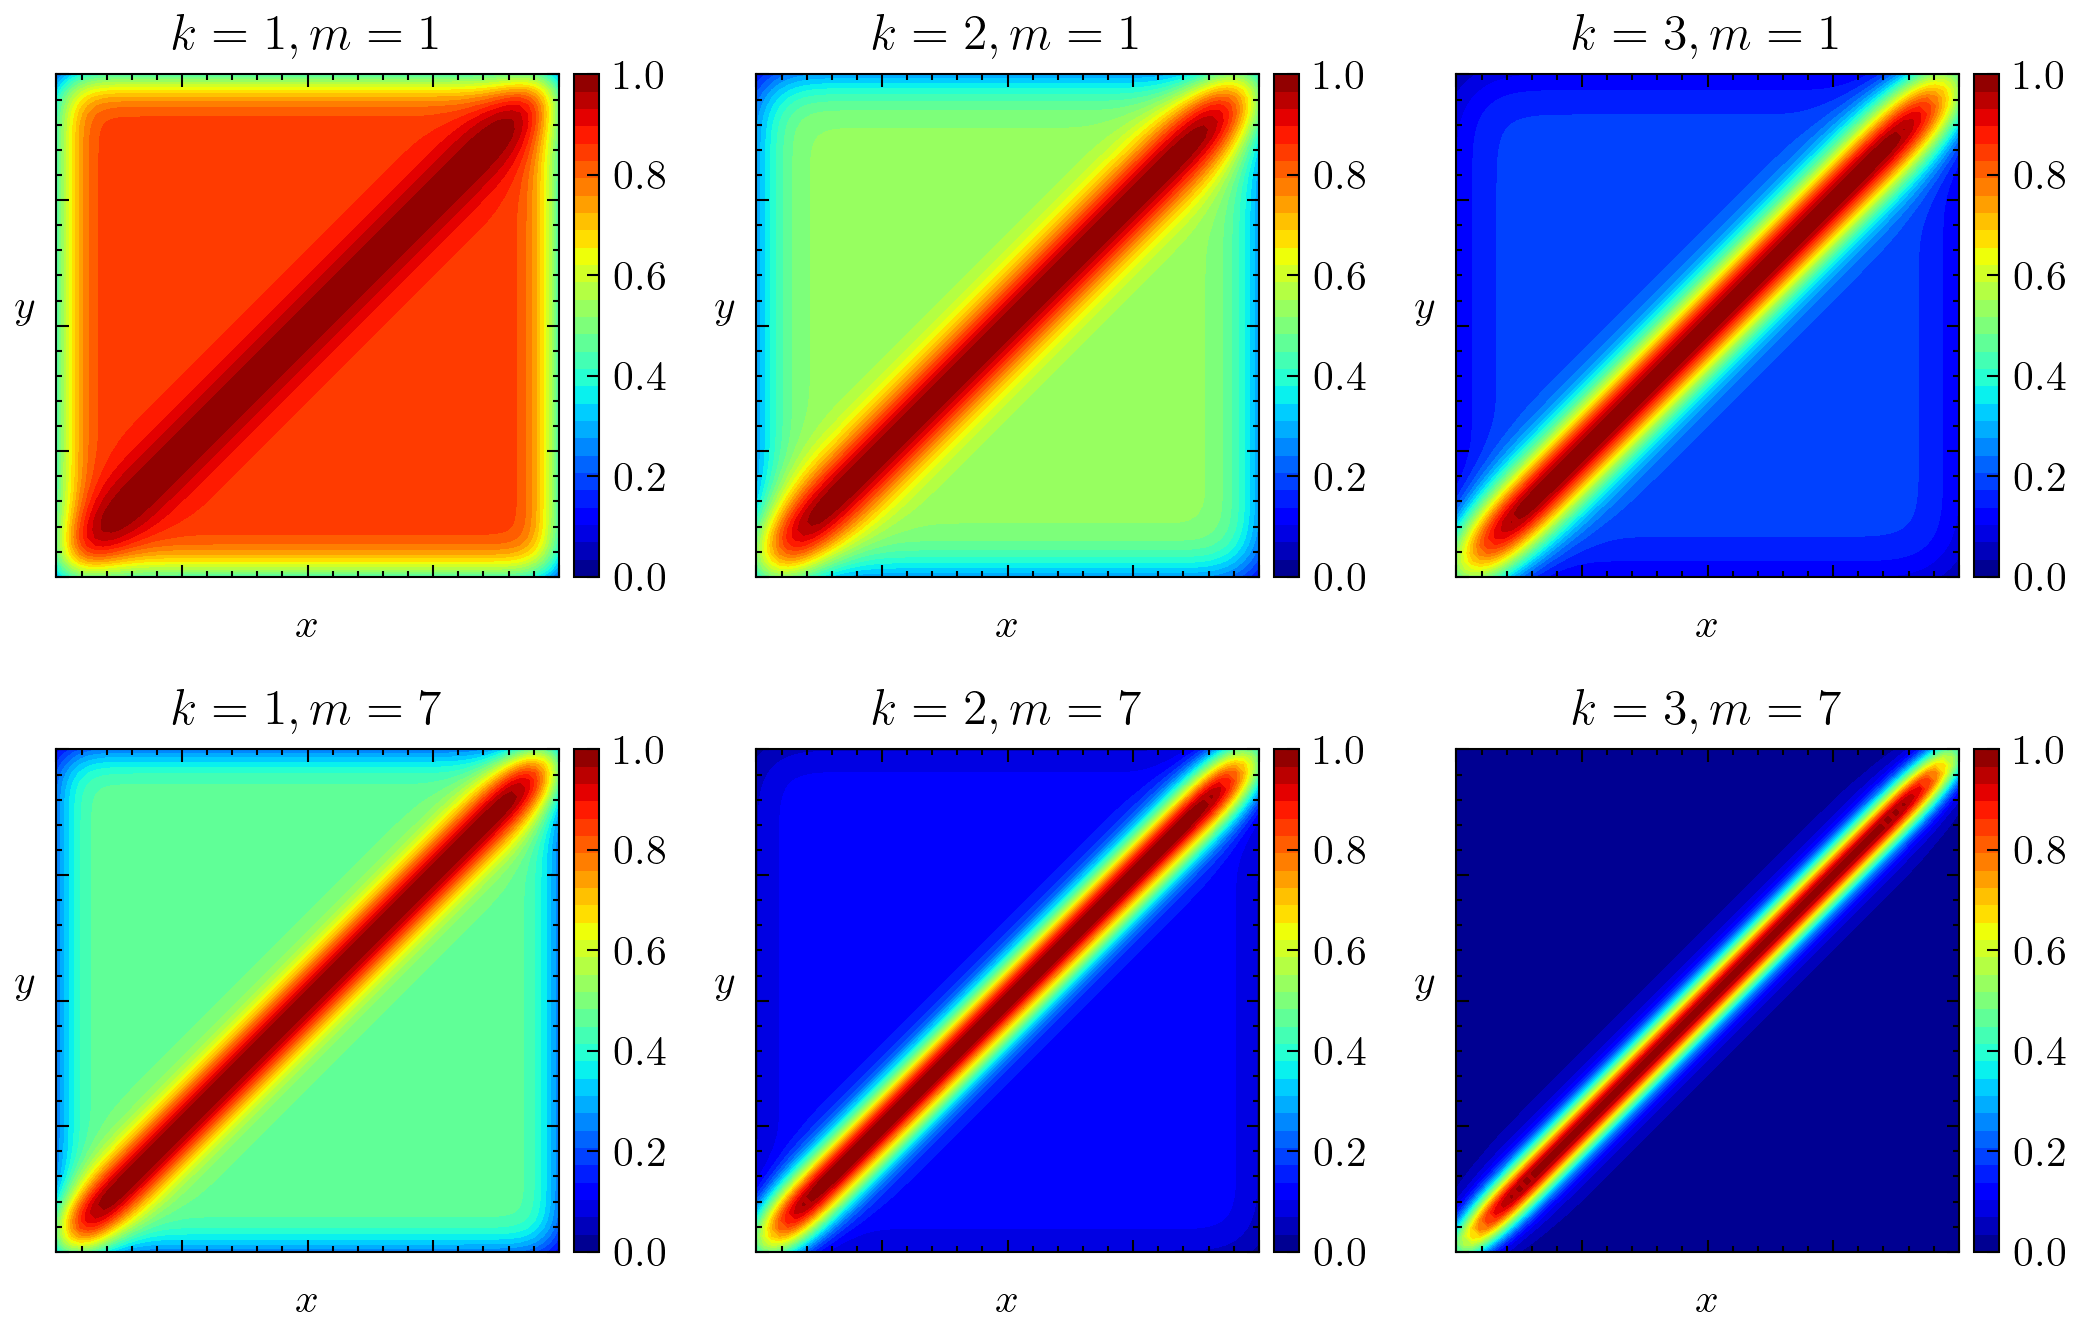

In [20]:
f = plt.figure(figsize=(7,4.5))
subfigs = f.subfigures(2,3).flatten()

for i, m in enumerate([1, 7]):
    for j, k in enumerate([1, 2, 3]):
        dd_gmg = DD_GMG1D(n,m,k,poisson_kernel,device)

        coarest_pts = dd_gmg.coarest_pts
        local_pts = []
        for l in range(k):
            x_2I_j_odd, _, mask_2I_j_odd = dd_gmg.pts_local[l][0]
            x_i_odd_j, _, mask_i_odd_j = dd_gmg.pts_local[l][1]
            local_pts.append(x_2I_j_odd[mask_2I_j_odd])
            local_pts.append(x_i_odd_j[mask_i_odd_j])
        local_pts = torch.concat(local_pts)

        full_pts = torch.vstack((coarest_pts, local_pts))

        kernel = stats.gaussian_kde(full_pts.T)

        zi = kernel(np.vstack([xi.flatten(), yi.flatten()])).reshape(nh,nh)
        zi = zi/zi.max()

        ax = subfigs[i*3 + j].subplots()
        
        im = ax.contourf(
            xi, yi,
            zi, levels=np.linspace(0,zi.max(),30), cmap='jet')
        ax.set_aspect('equal')
        ax.set_title('$k={:}, m={:}$'.format(k,m))
        ax.set_xlabel('$x$')
        ax.set_ylabel('$y$', rotation=0)
        divider = make_axes_locatable(ax)
        cax = divider.append_axes('right', size='5%', pad=0.05)
        cbar = f.colorbar(im, cax=cax, orientation='vertical')
        cbar.locator = ticker.MaxNLocator(nbins=5)
        cbar.formatter.set_powerlimits((0, 0))
        cbar.formatter.set_useMathText(True)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        label_b = Text(0.01, 0.99, '(b)', fontsize=12, transform=subfigs[1].transSubfigure, ha="left", va="top")
        subfigs[1].add_artist(label_b)

# plt.tight_layout()
outnm = './gmgn_distribution.pdf'
plt.savefig(outnm)

# coarest pts :  1089
# correction :  222
ratio 1311/4225 = 31.03% 



saved :  ./gmg_m1_k1.png
# coarest pts :  289
# correction :  332
ratio 621/4225 = 14.70% 

saved :  ./gmg_m1_k2.png
# coarest pts :  81
# correction :  386
ratio 467/4225 = 11.05% 

saved :  ./gmg_m1_k3.png
# coarest pts :  1089
# correction :  584
ratio 1673/4225 = 39.60% 

saved :  ./gmg_m3_k1.png
# coarest pts :  289
# correction :  864
ratio 1153/4225 = 27.29% 

saved :  ./gmg_m3_k2.png
# coarest pts :  81
# correction :  992
ratio 1073/4225 = 25.40% 

saved :  ./gmg_m3_k3.png
# coarest pts :  1089
# correction :  1236
ratio 2325/4225 = 55.03% 

saved :  ./gmg_m7_k1.png
# coarest pts :  289
# correction :  1784
ratio 2073/4225 = 49.07% 

saved :  ./gmg_m7_k2.png
# coarest pts :  81
# correction :  1988
ratio 2069/4225 = 48.97% 

saved :  ./gmg_m7_k3.png
# coarest pts :  1089
# correction :  2252
ratio 3341/4225 = 79.08% 

saved :  ./gmg_m15_k1.png
# coarest pts :  289
# correction :  3048
ratio 3337/4225 = 78.98% 

saved :  ./gmg_m15_k2.png
# coarest pts :  81
# correction :  3256

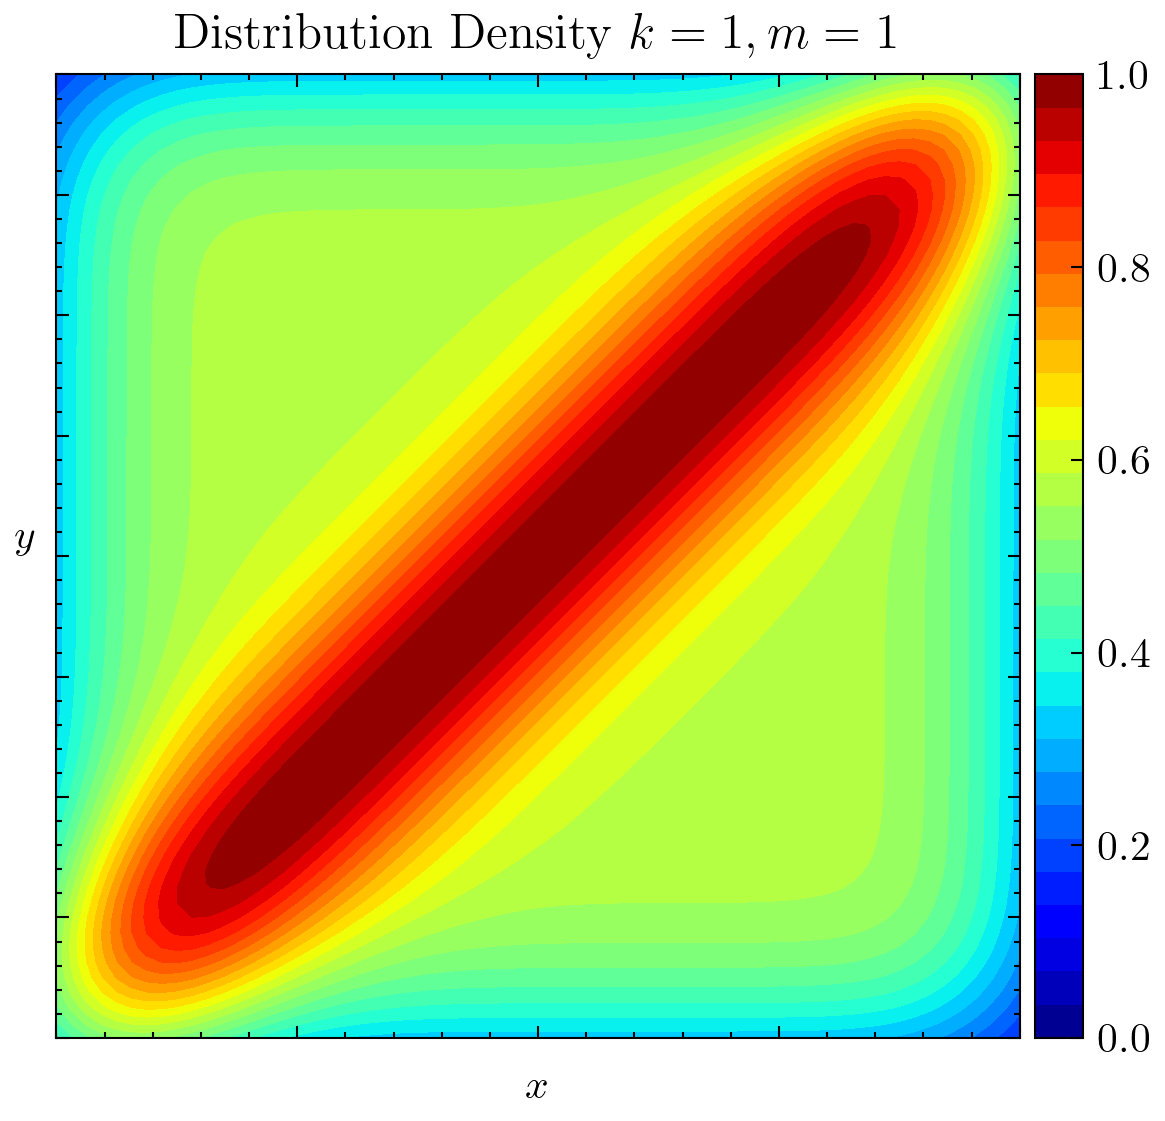

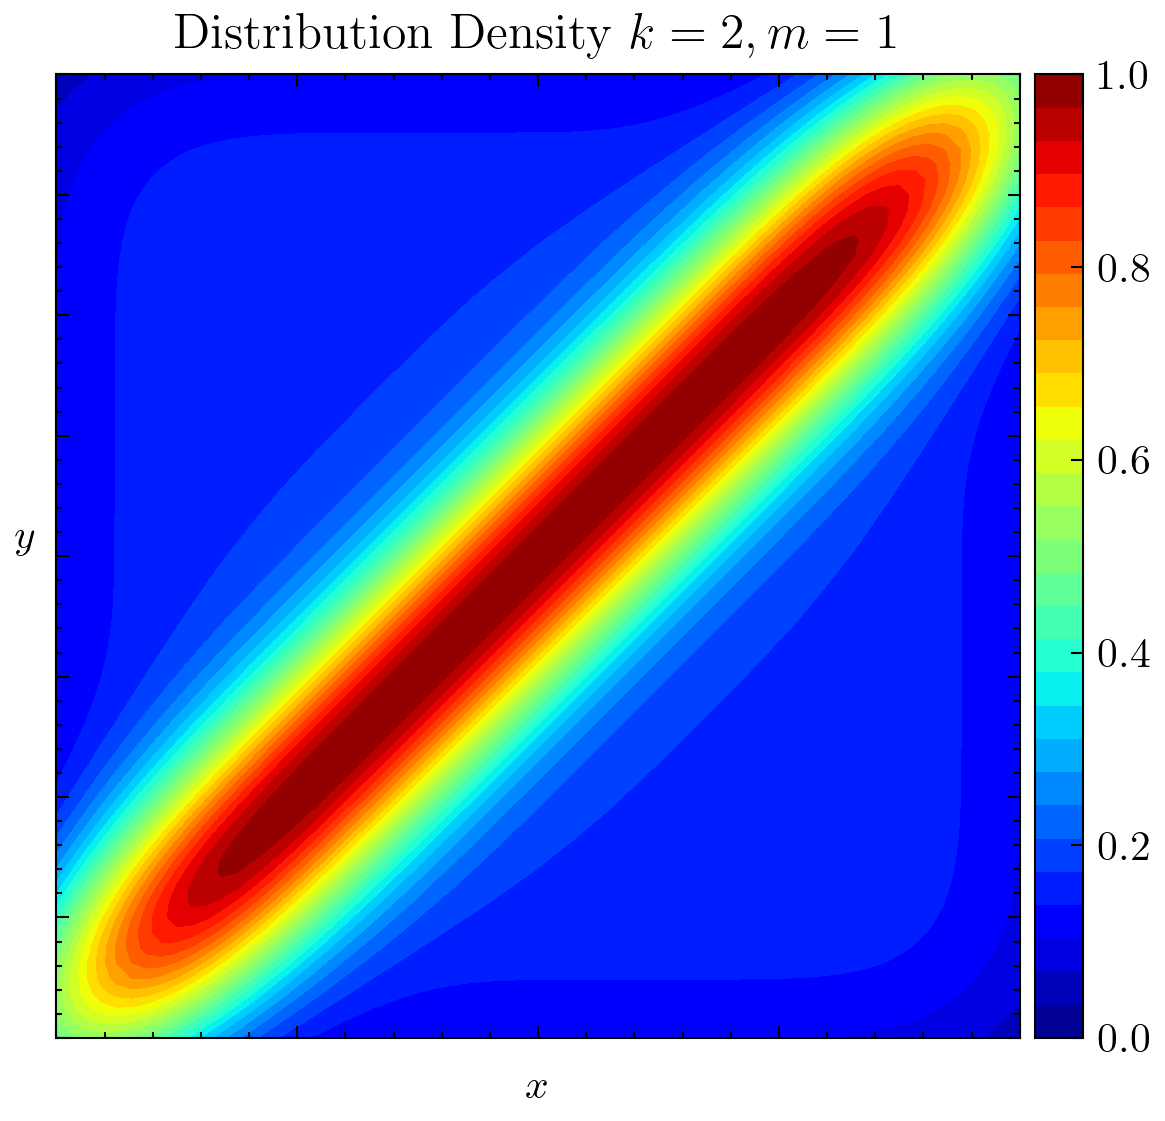

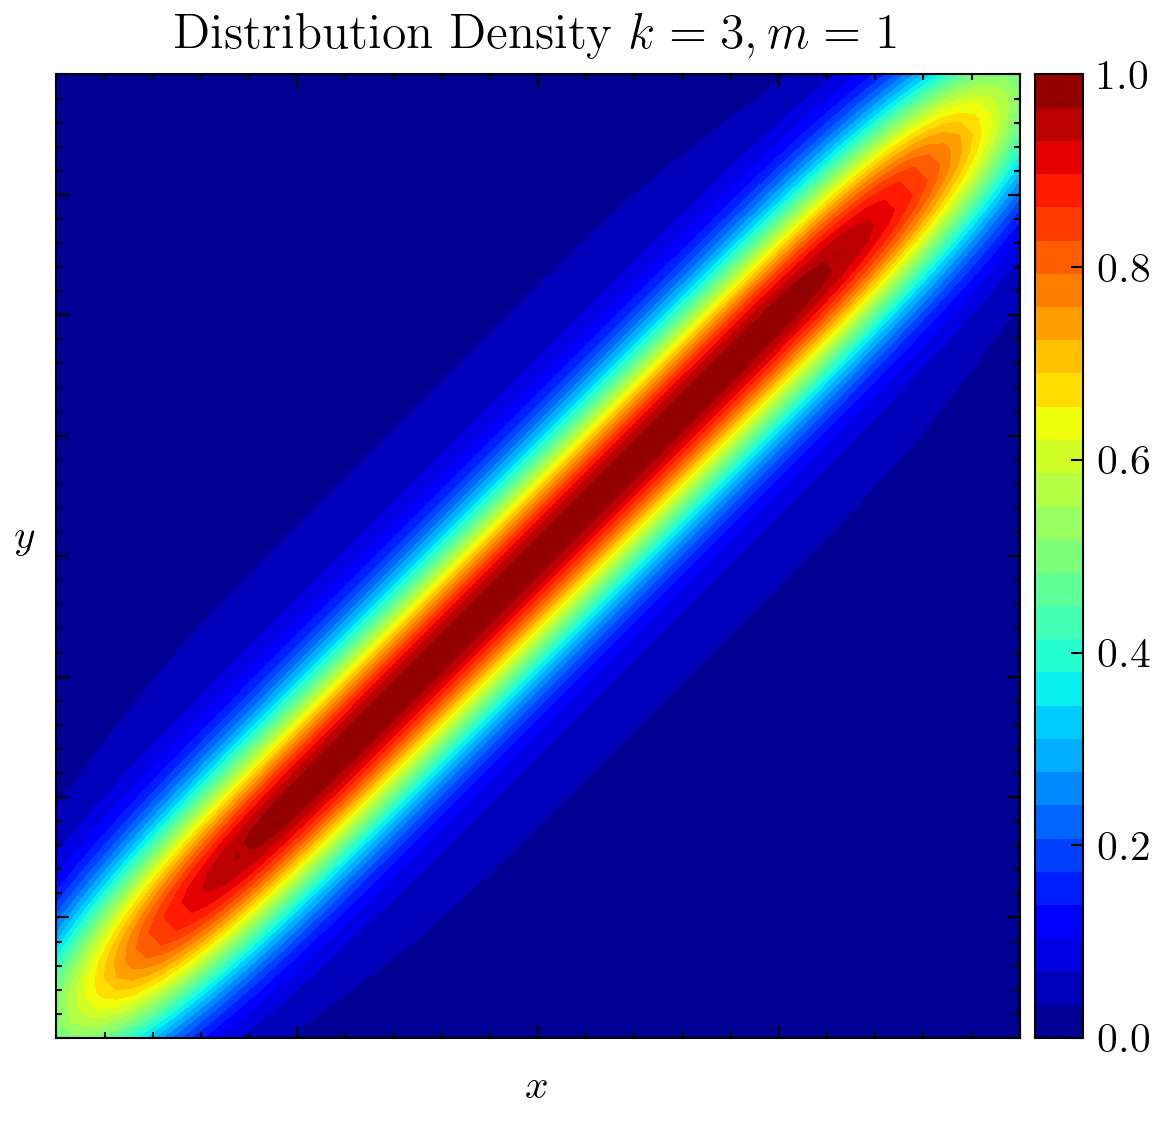

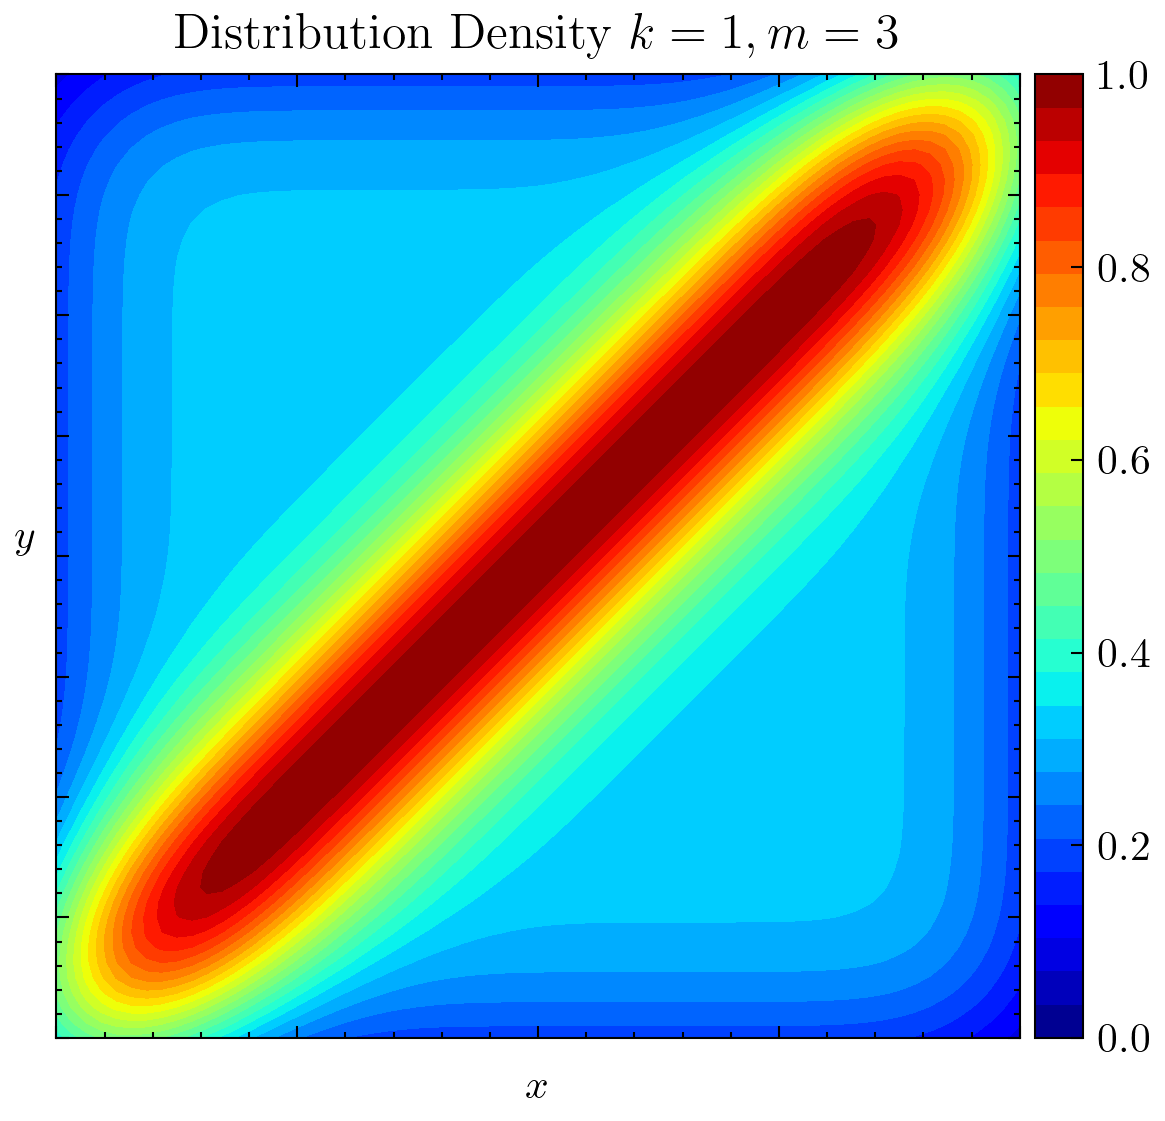

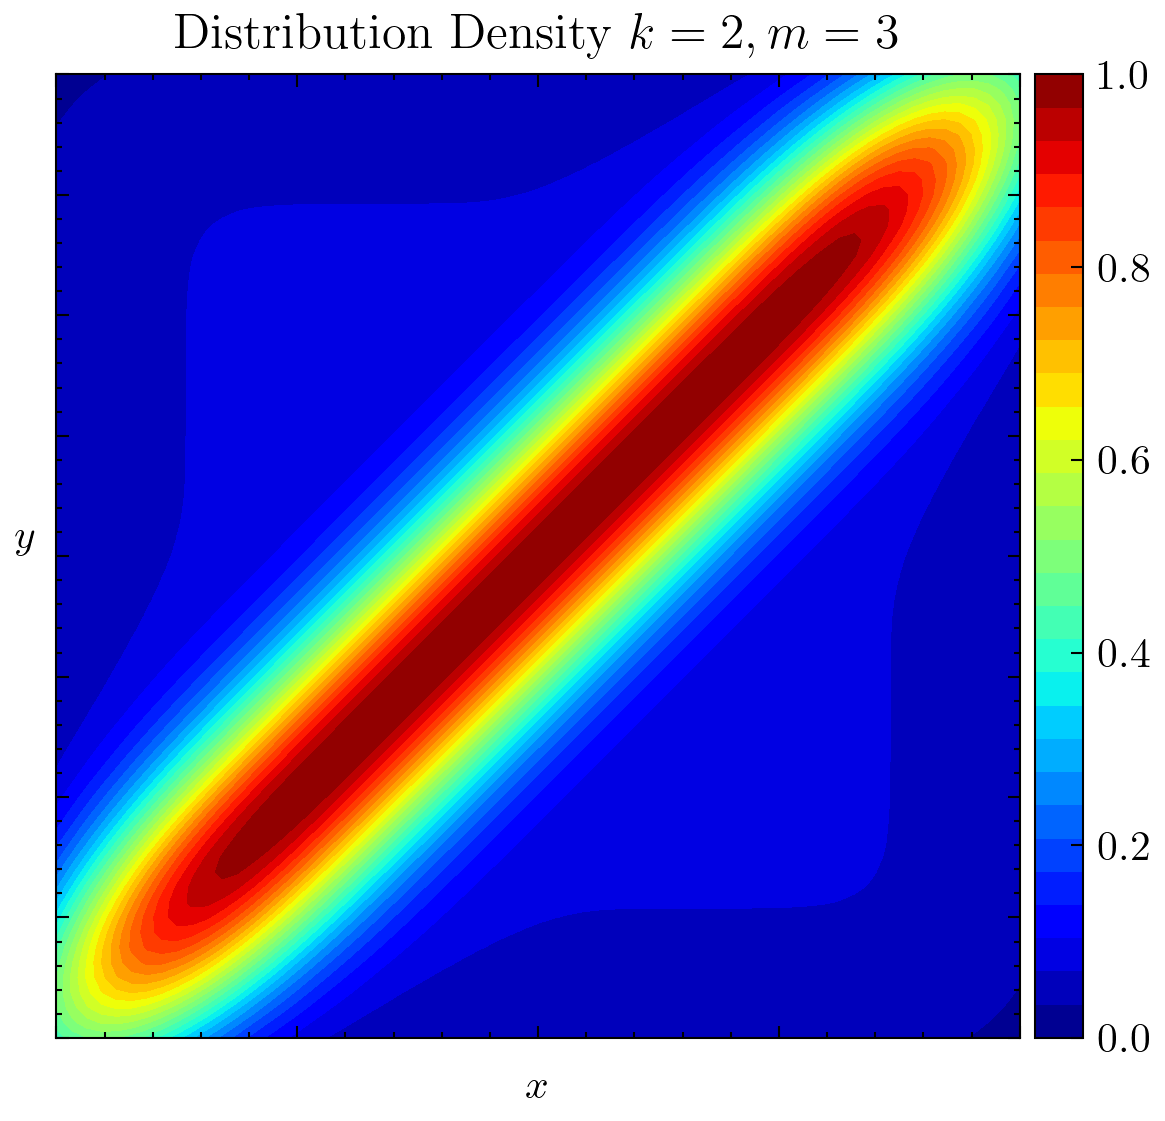

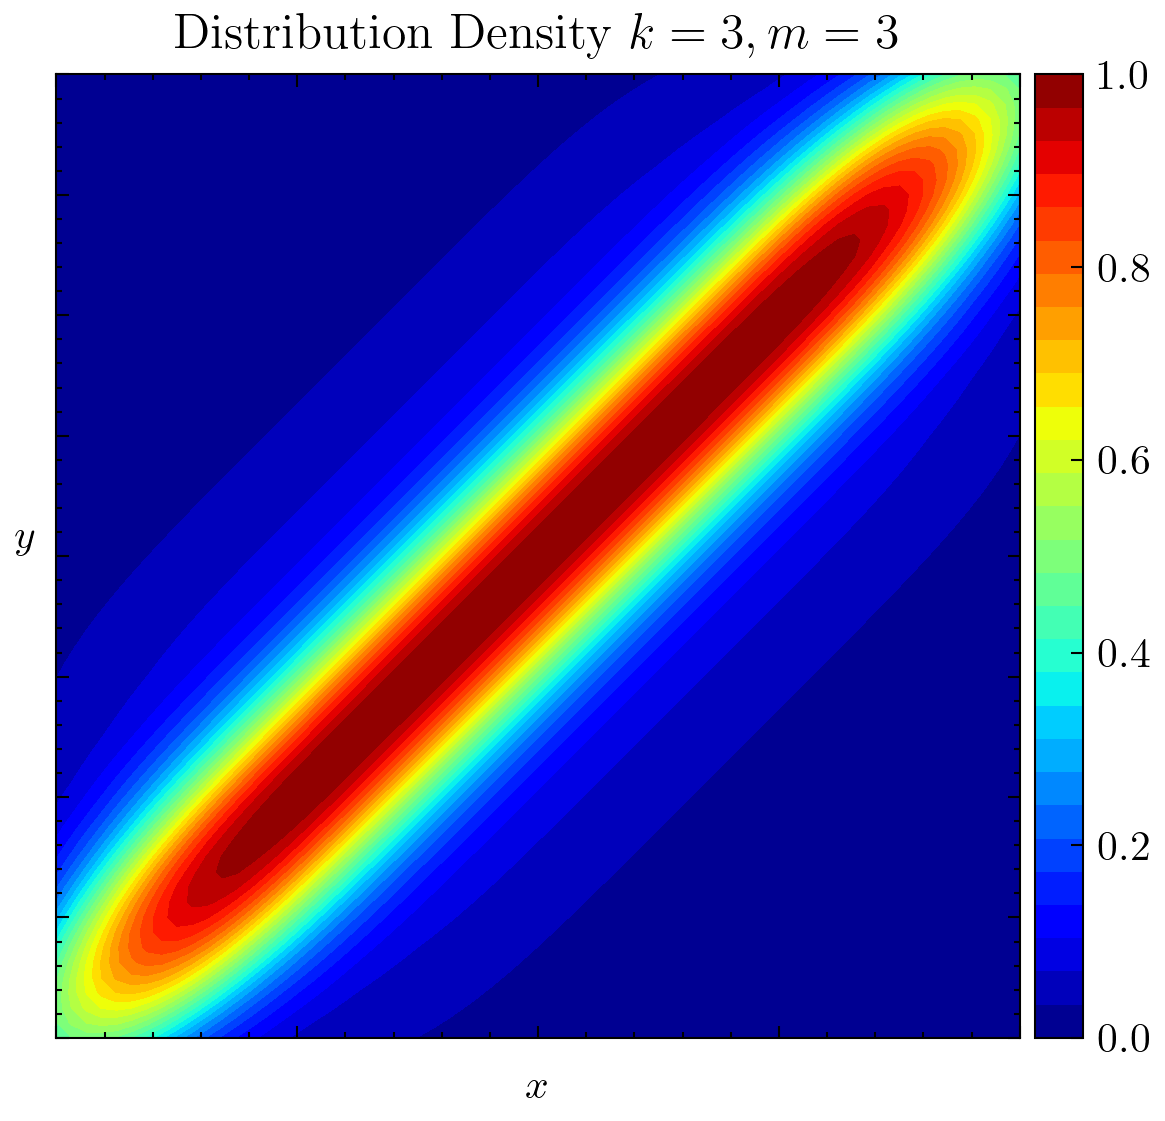

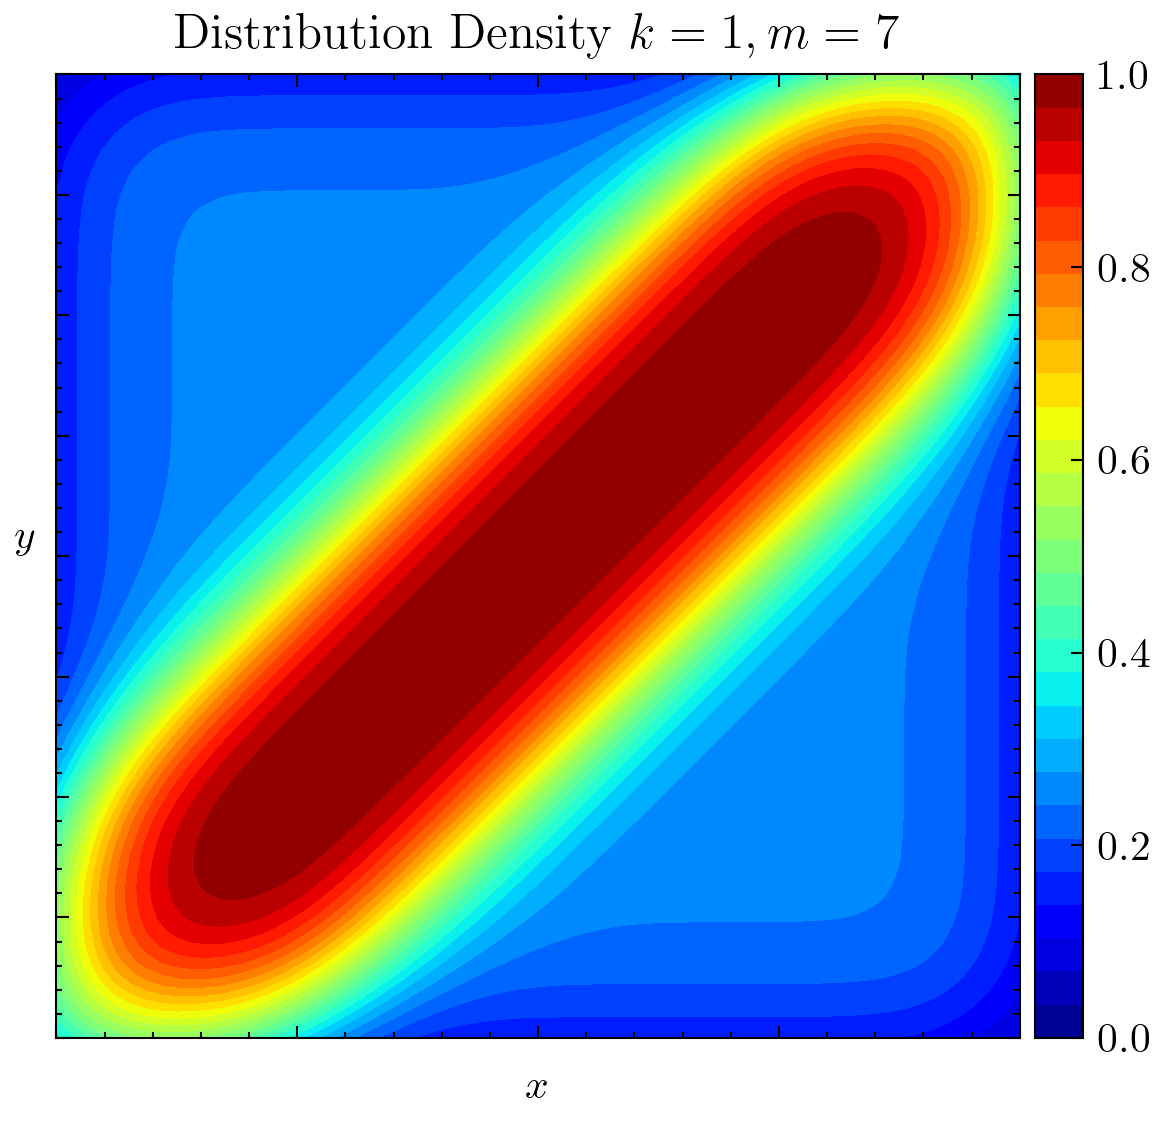

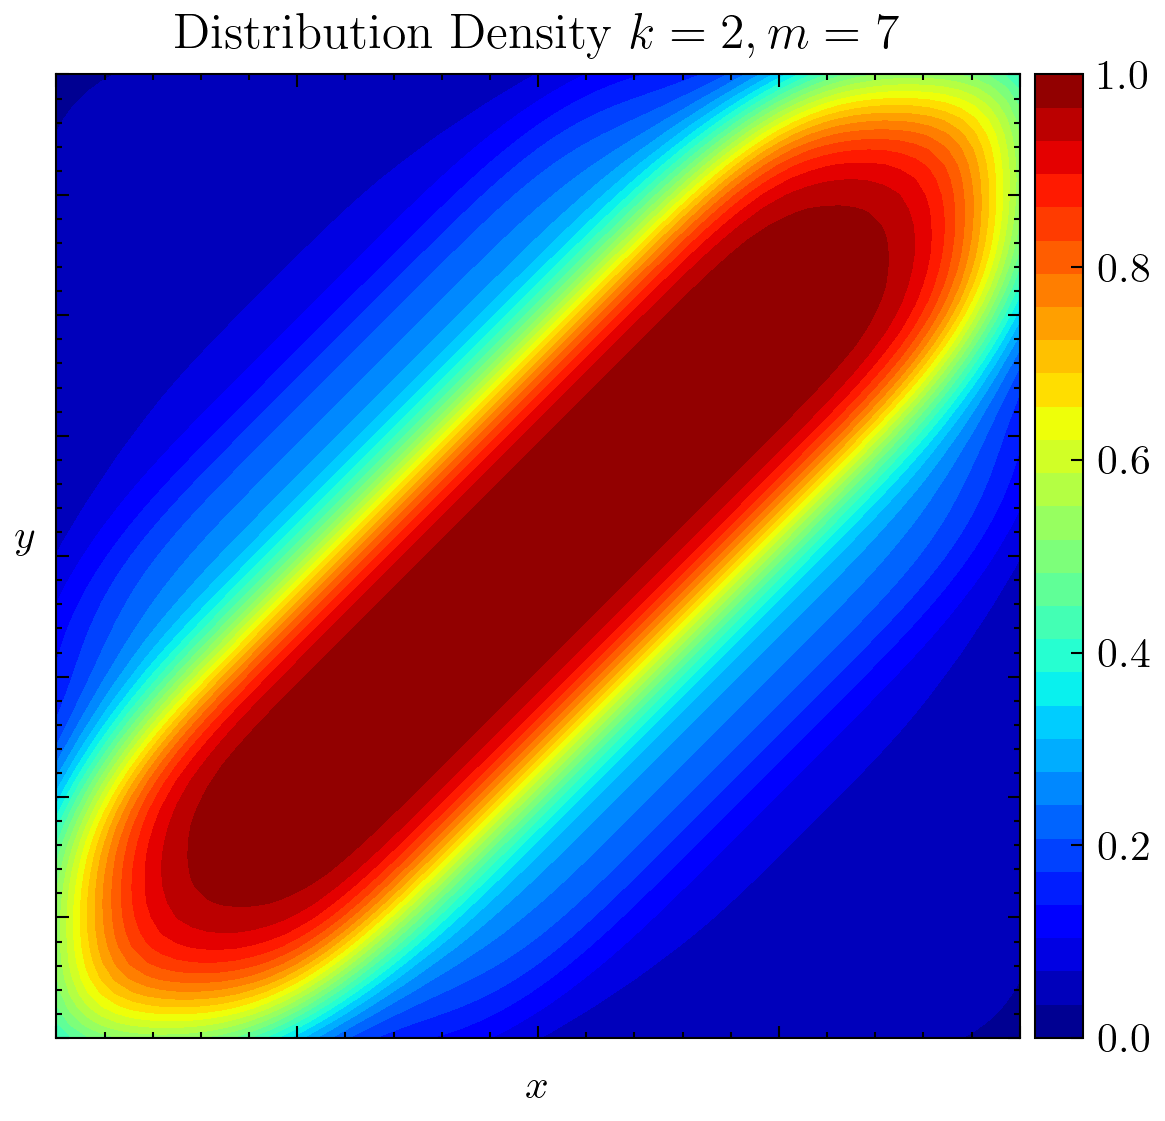

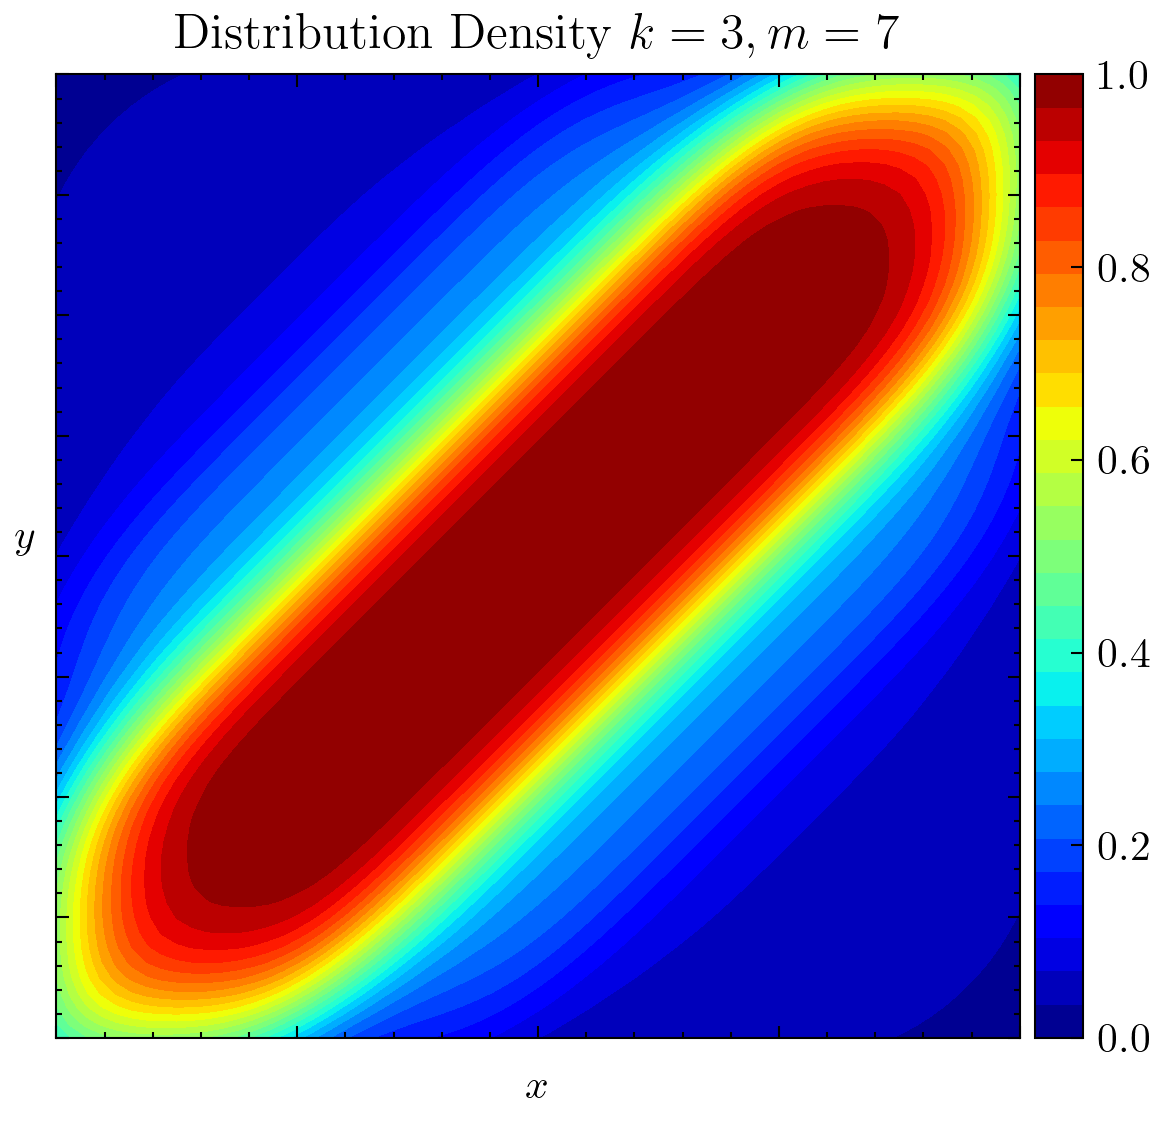

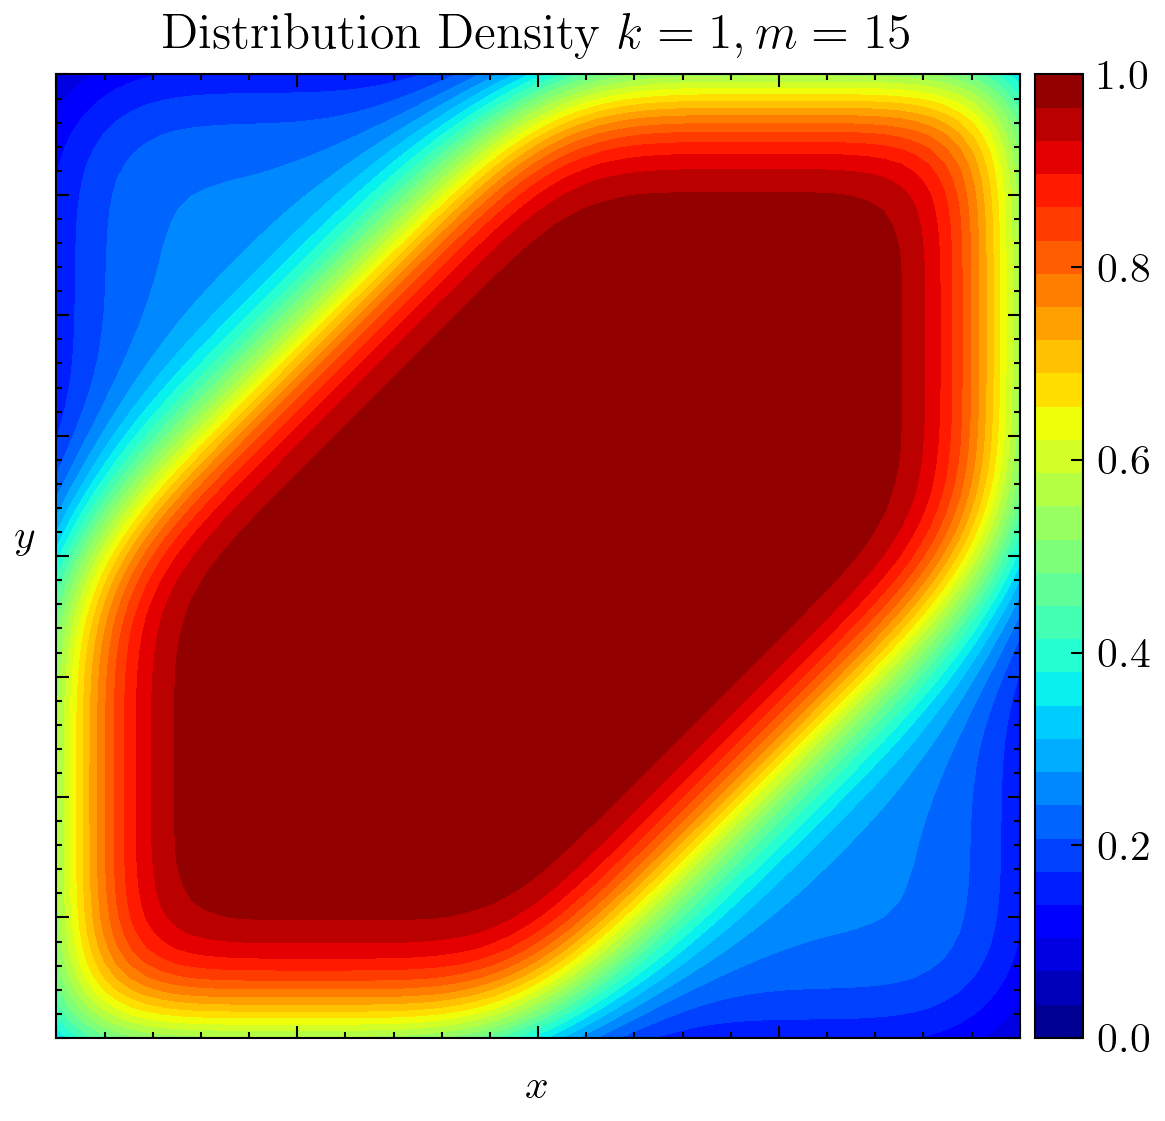

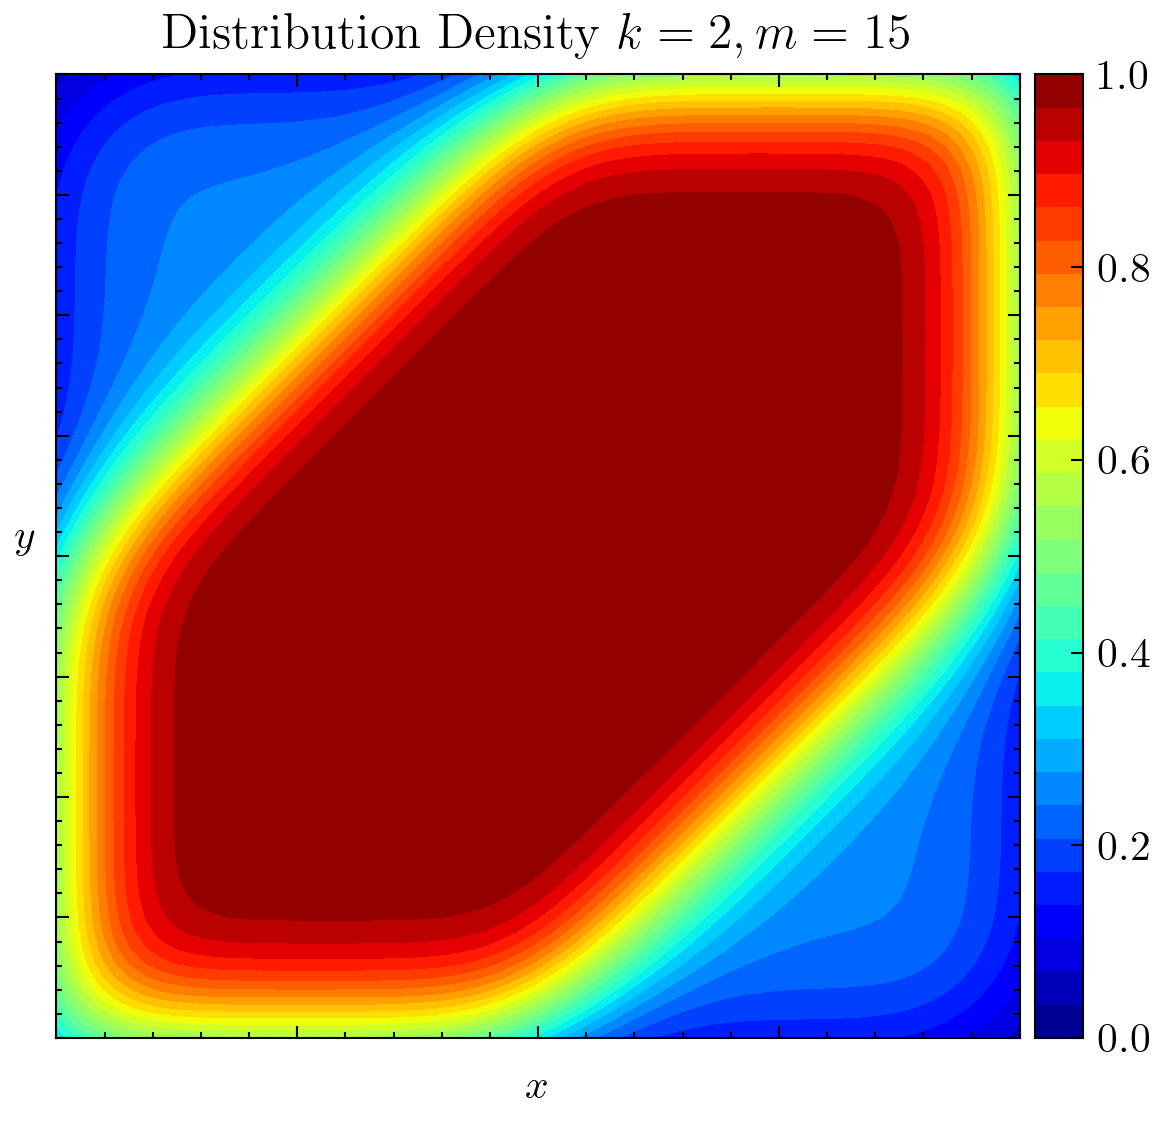

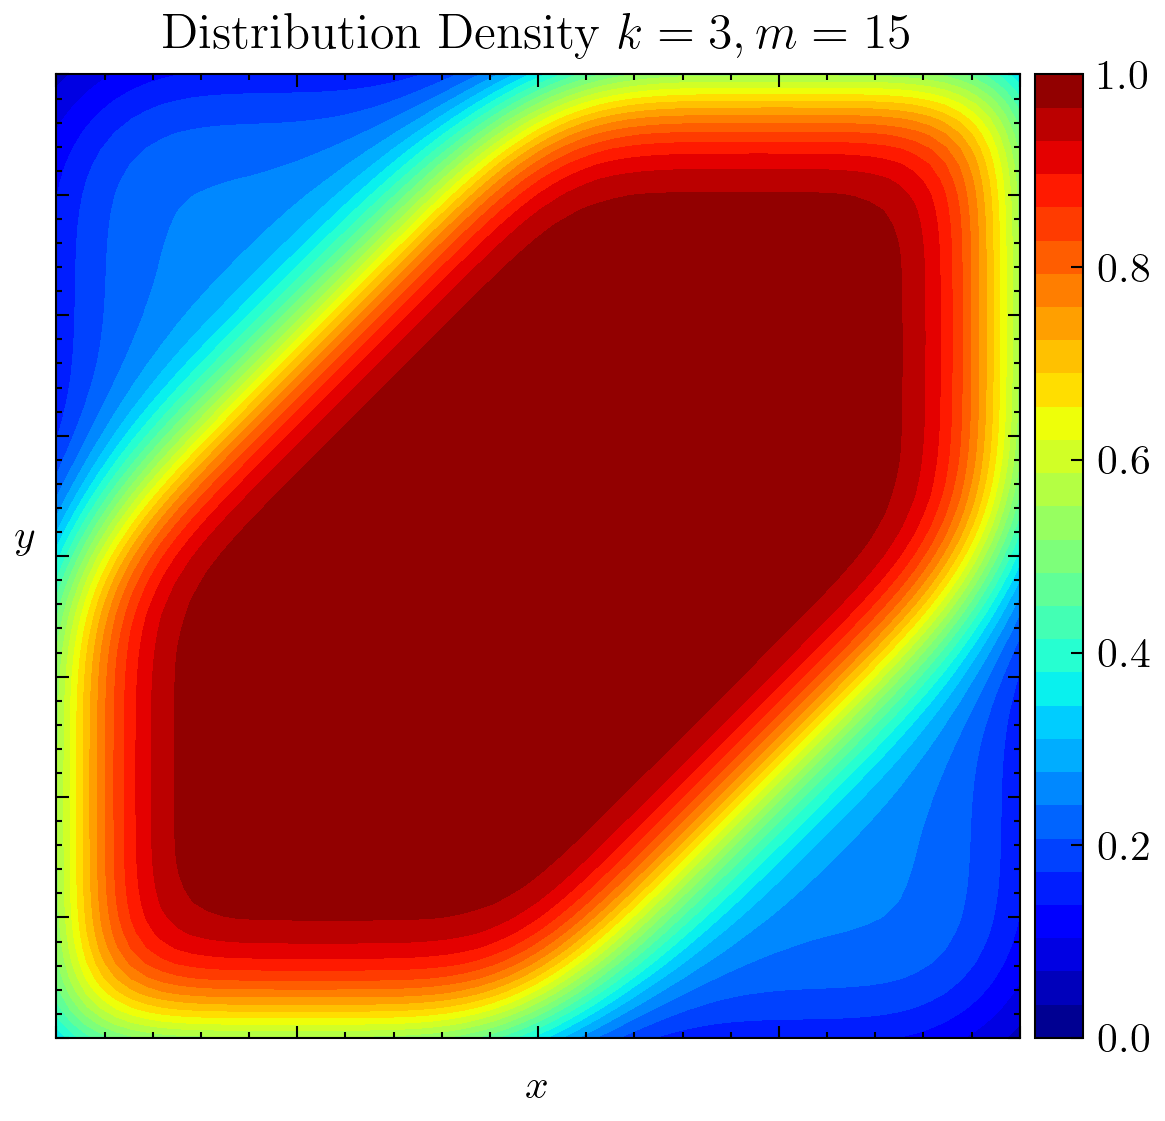

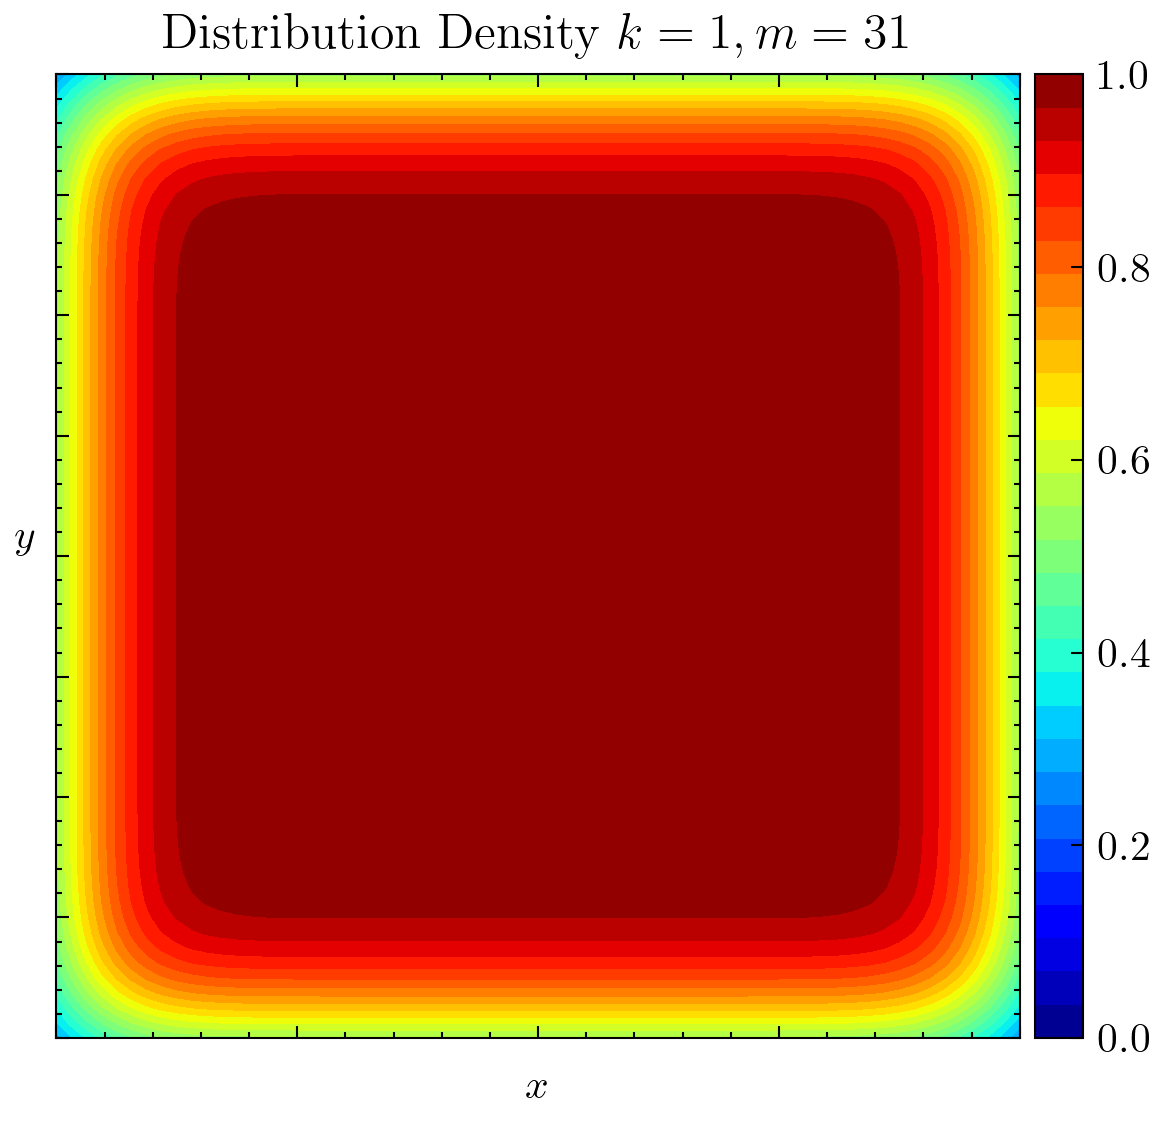

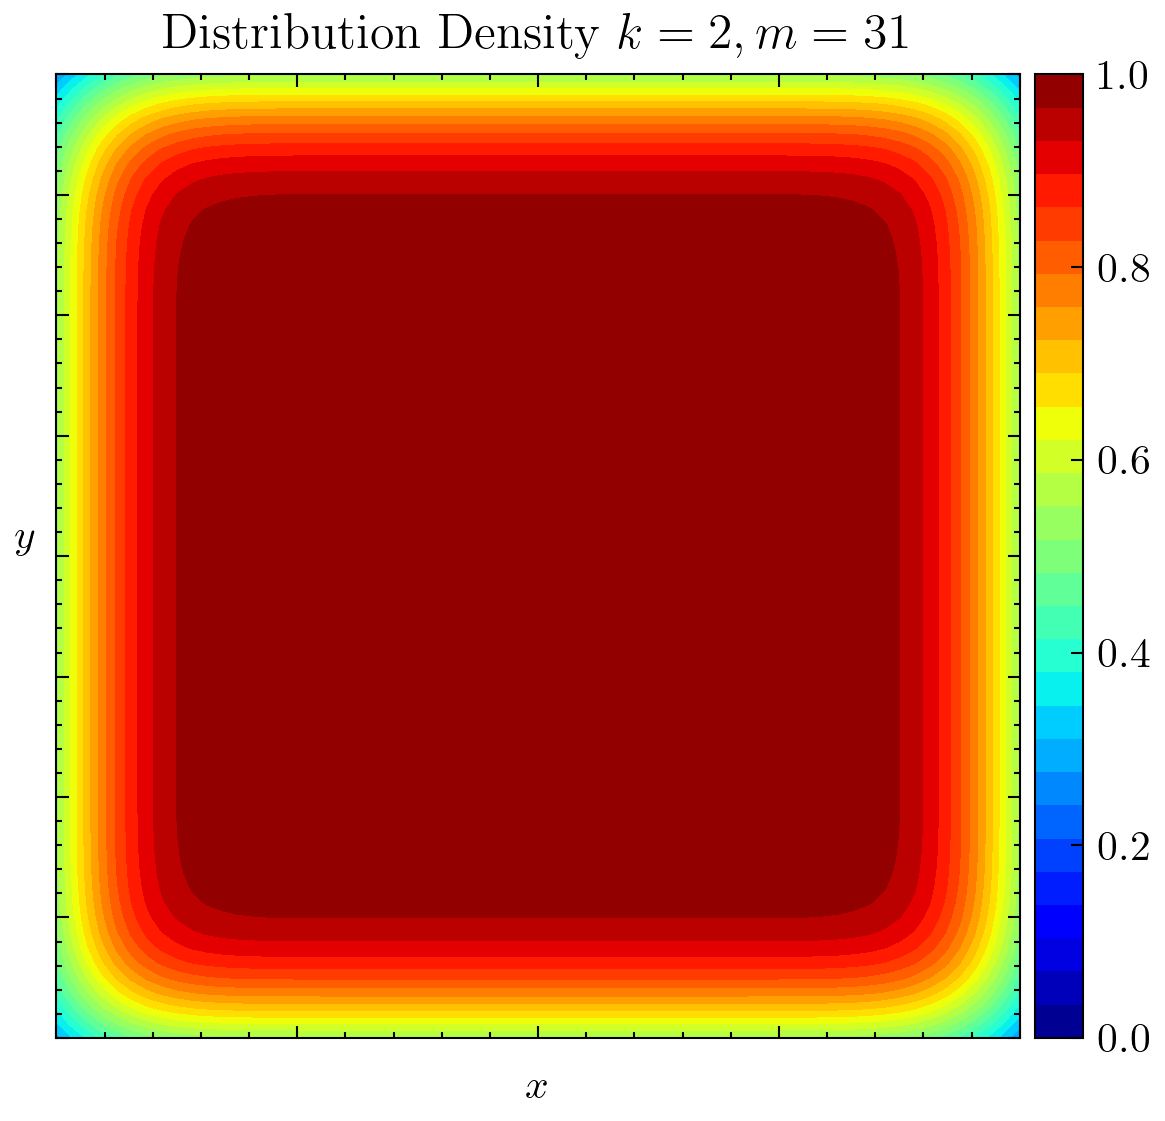

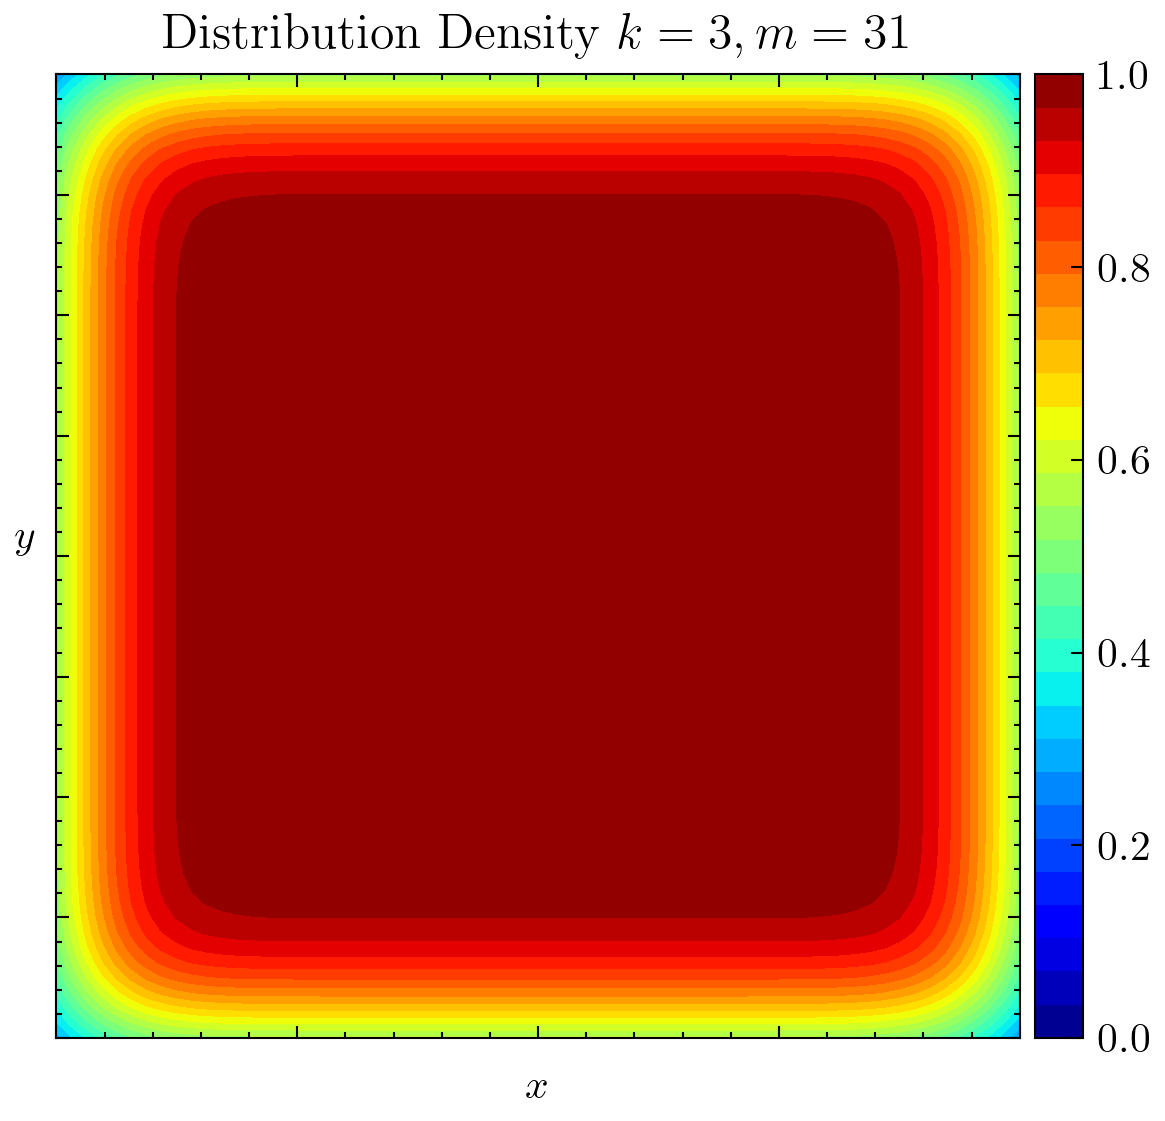

In [35]:
for m in [1, 3, 7, 15, 31]:
    for k in [1, 2, 3]:
        dd_gmg = DD_GMG1D(n,m,k,poisson_kernel,device)

        coarest_pts = dd_gmg.coarest_pts
        local_pts = []
        for l in range(k):
            x_2I_j_odd, _, mask_2I_j_odd = dd_gmg.pts_local[l][0]
            x_i_odd_j, _, mask_i_odd_j = dd_gmg.pts_local[l][1]
            local_pts.append(x_2I_j_odd[mask_2I_j_odd])
            local_pts.append(x_i_odd_j[mask_i_odd_j])
        local_pts = torch.concat(local_pts)

        full_pts = torch.vstack((coarest_pts, local_pts))

        kernel = stats.gaussian_kde(full_pts.T)

        zi = kernel(np.vstack([xi.flatten(), yi.flatten()])).reshape(nh,nh)
        zi = zi/zi.max()

        cm = 1/2.54
        # visualize kernel slice
        f = plt.figure(figsize=(20*cm,10*cm))
        ax1 = f.add_subplot(111)

        im = ax1.contourf(
            xi, yi,
            zi, levels=np.linspace(0,1,30), cmap='jet')
        ax1.set_aspect('equal')
        ax1.set_title('Distribution Density $k={:}, m={:}$'.format(k,m))
        ax1.set_xlabel('$x$')
        ax1.set_ylabel('$y$', rotation=0)
        divider = make_axes_locatable(ax1)
        cax = divider.append_axes('right', size='5%', pad=0.05)
        cbar = f.colorbar(im, cax=cax, orientation='vertical')
        cbar.locator = ticker.MaxNLocator(nbins=5)
        cbar.formatter.set_powerlimits((0, 0))
        cbar.formatter.set_useMathText(True)
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])

        plt.tight_layout()
        outnm = './gmg_m{:}_k{:}.png'.format(m, k)
        plt.savefig(outnm)
        print("saved : ", outnm)

# coarest pts :  1089
# correction :  222
ratio 1311/4225 = 31.03% 



saved :  ./gmg_dist_m1_k1.png
# coarest pts :  289
# correction :  332
ratio 621/4225 = 14.70% 

saved :  ./gmg_dist_m1_k2.png
# coarest pts :  81
# correction :  386
ratio 467/4225 = 11.05% 

saved :  ./gmg_dist_m1_k3.png
# coarest pts :  1089
# correction :  584
ratio 1673/4225 = 39.60% 

saved :  ./gmg_dist_m3_k1.png
# coarest pts :  289
# correction :  864
ratio 1153/4225 = 27.29% 

saved :  ./gmg_dist_m3_k2.png
# coarest pts :  81
# correction :  992
ratio 1073/4225 = 25.40% 

saved :  ./gmg_dist_m3_k3.png
# coarest pts :  1089
# correction :  1236
ratio 2325/4225 = 55.03% 

saved :  ./gmg_dist_m7_k1.png
# coarest pts :  289
# correction :  1784
ratio 2073/4225 = 49.07% 

saved :  ./gmg_dist_m7_k2.png
# coarest pts :  81
# correction :  1988
ratio 2069/4225 = 48.97% 

saved :  ./gmg_dist_m7_k3.png
# coarest pts :  1089
# correction :  2252
ratio 3341/4225 = 79.08% 

saved :  ./gmg_dist_m15_k1.png
# coarest pts :  289
# correction :  3048
ratio 3337/4225 = 78.98% 

saved :  ./gmg_d

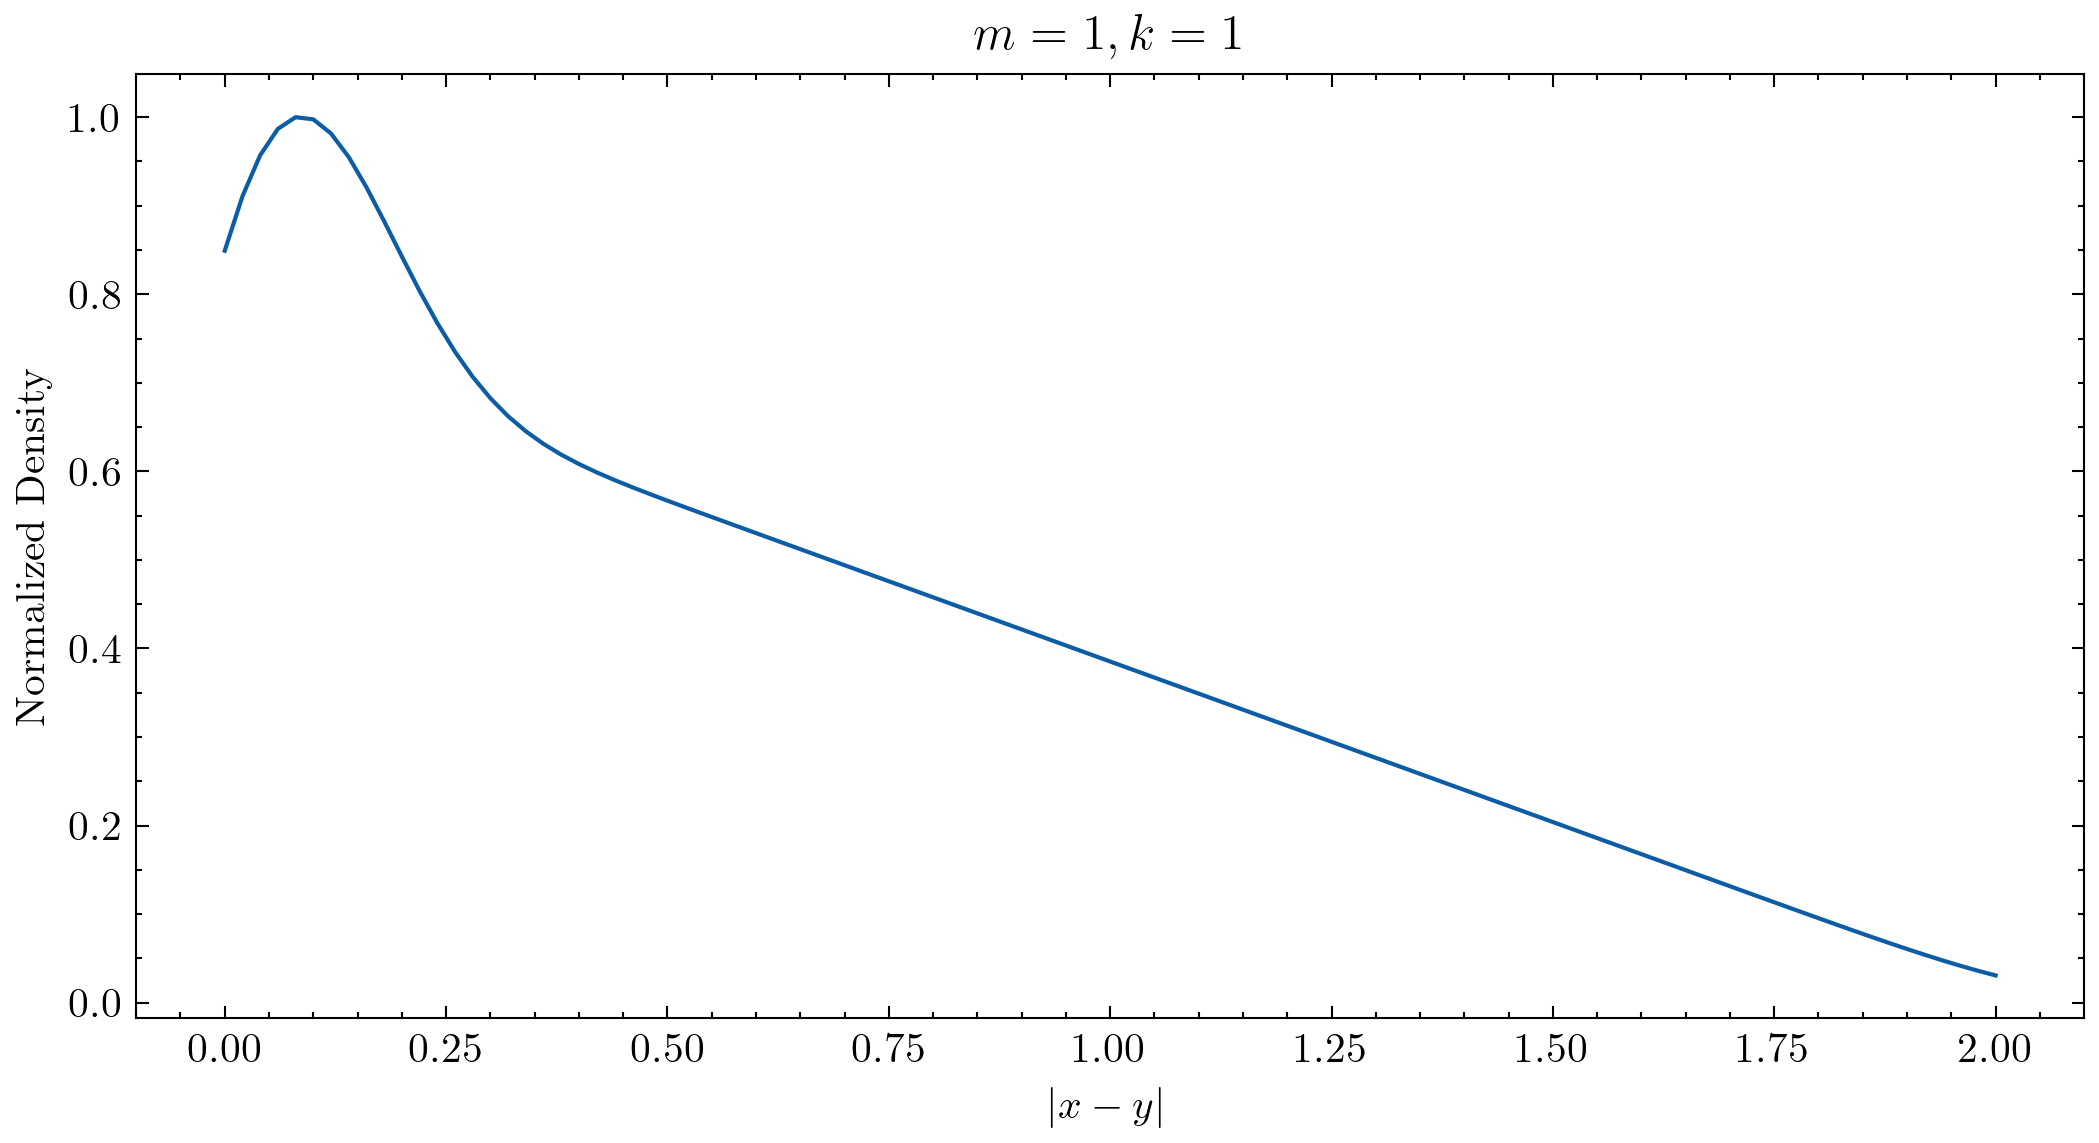

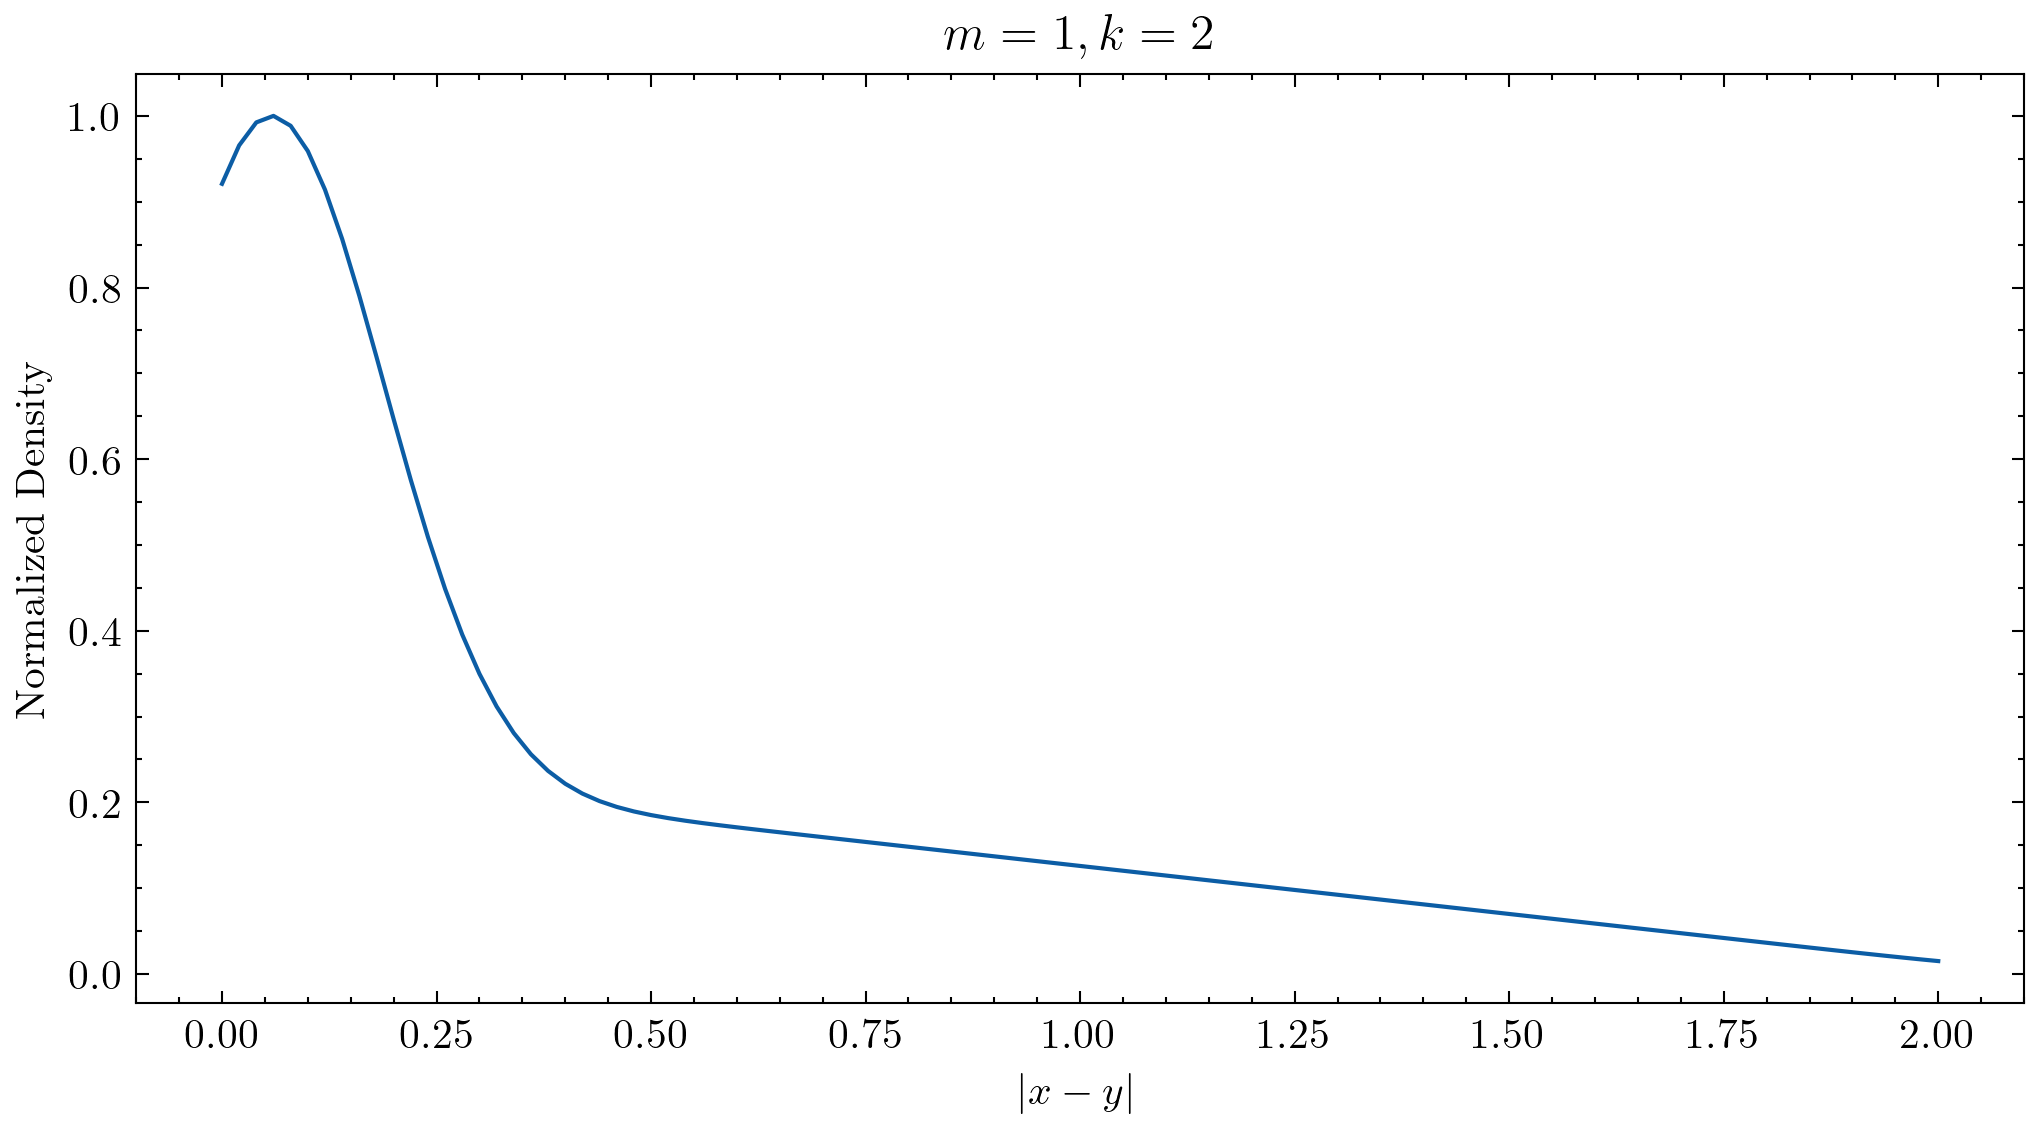

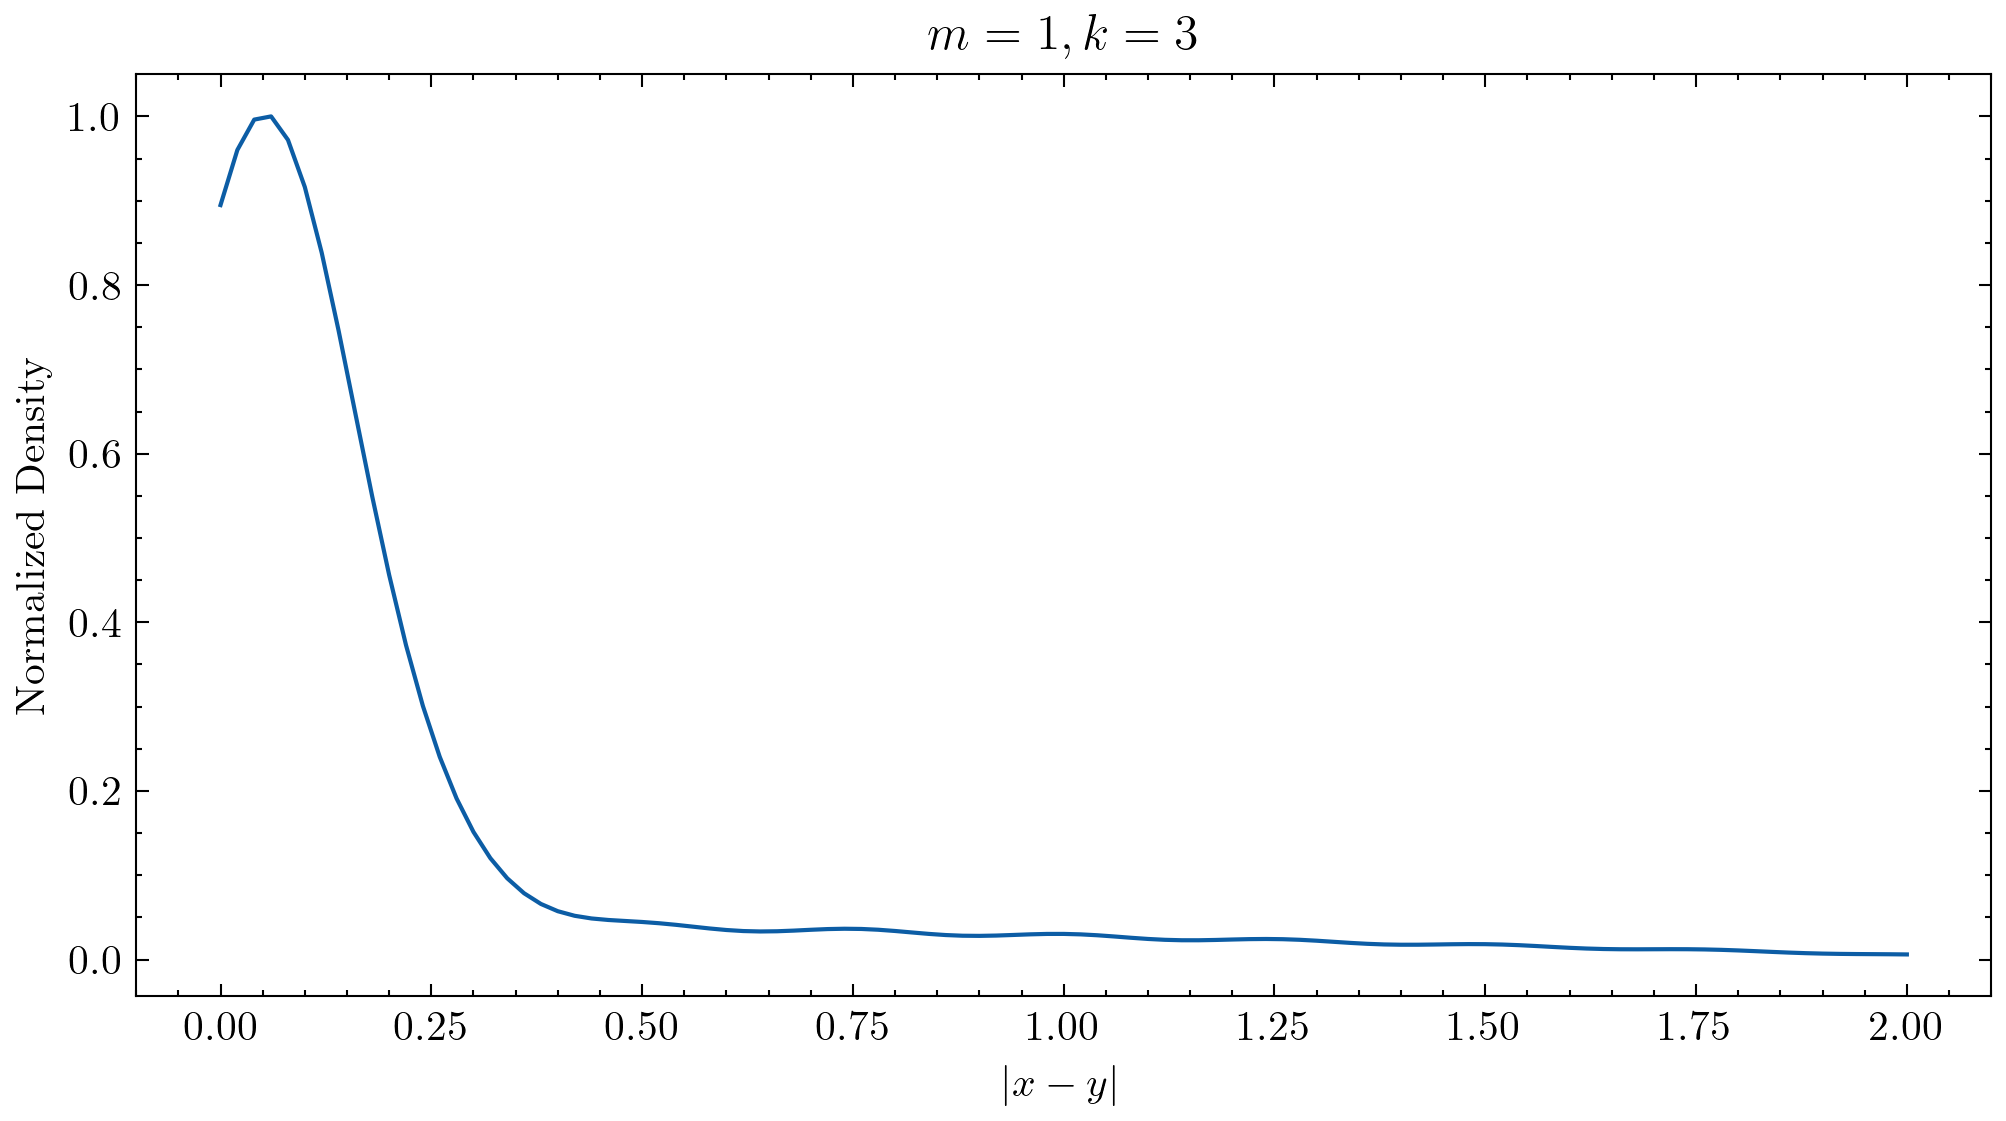

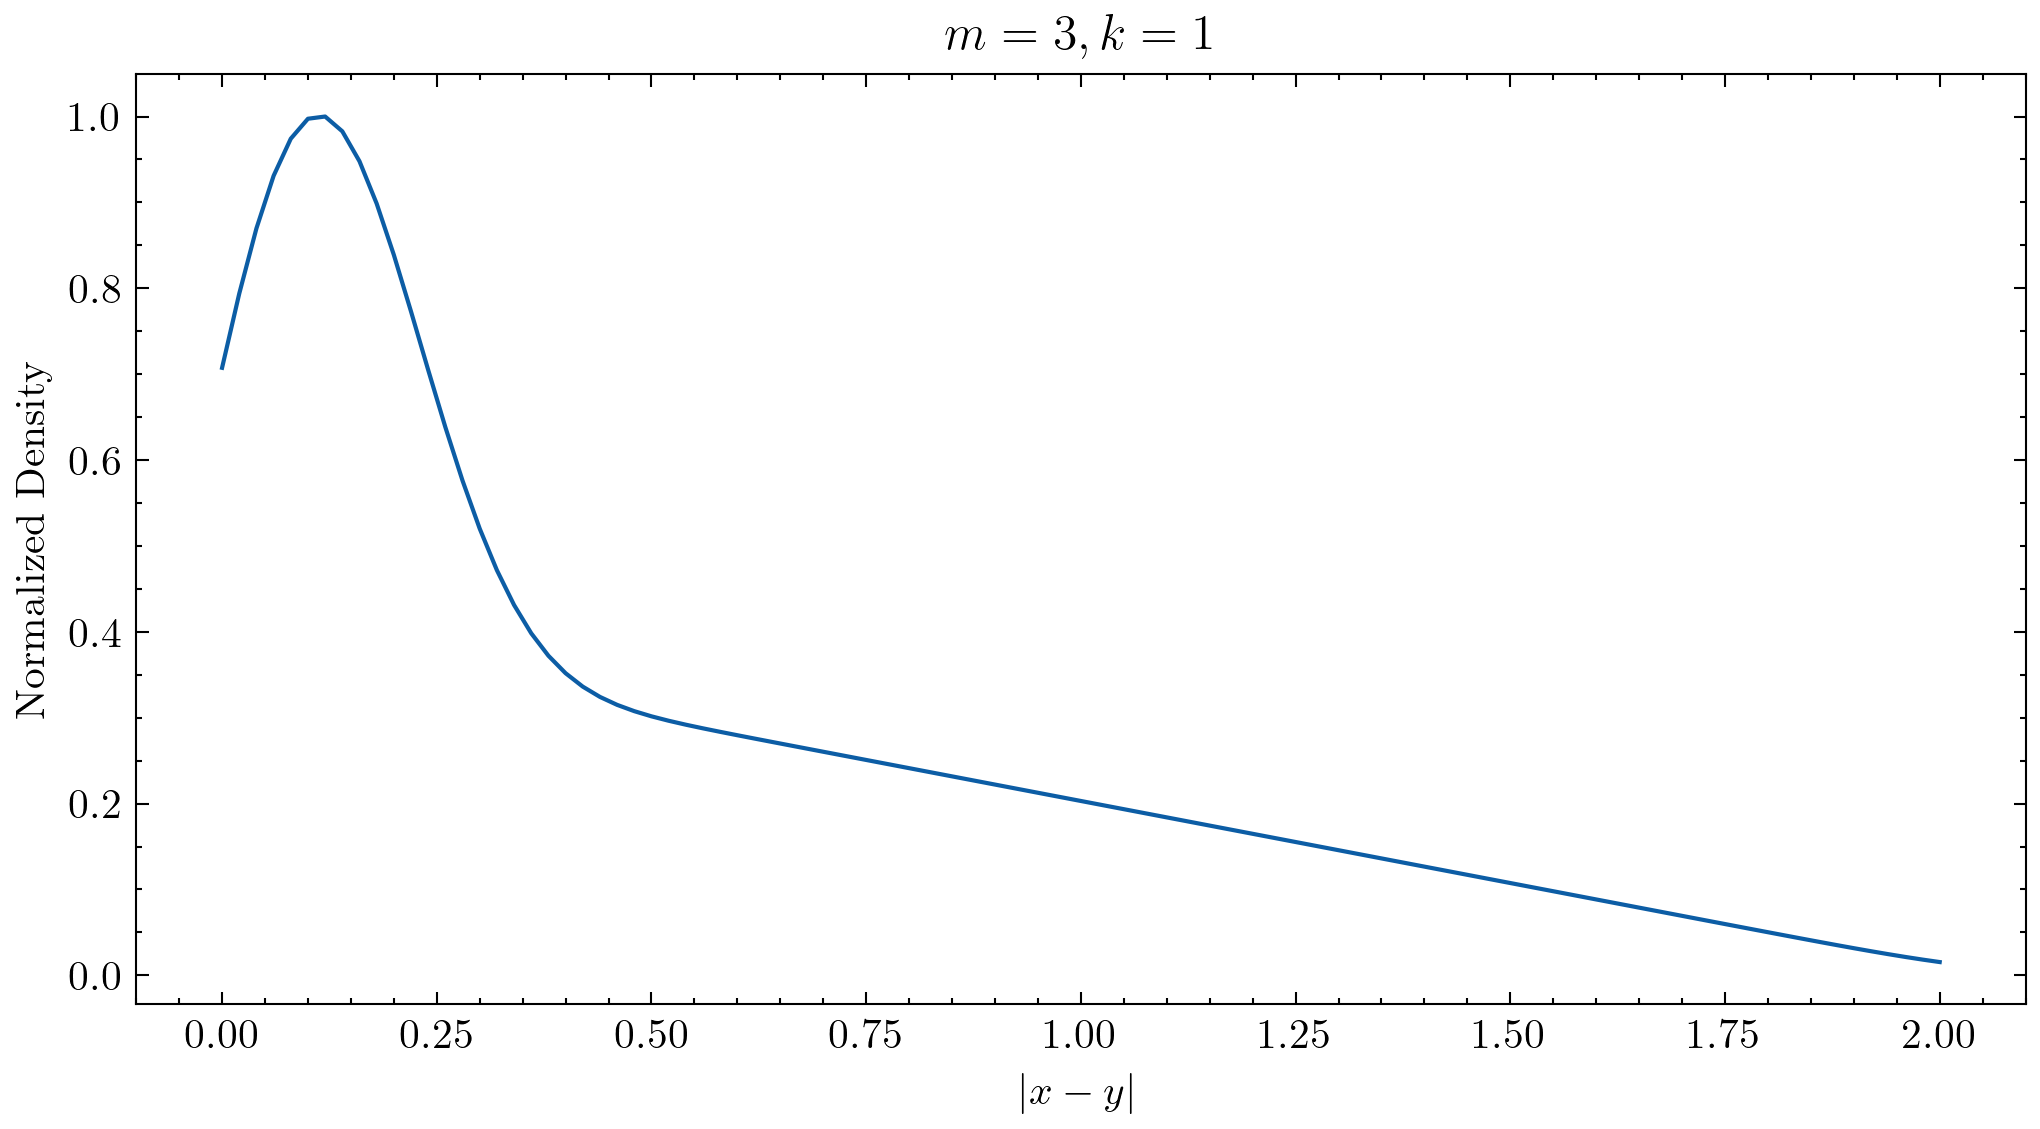

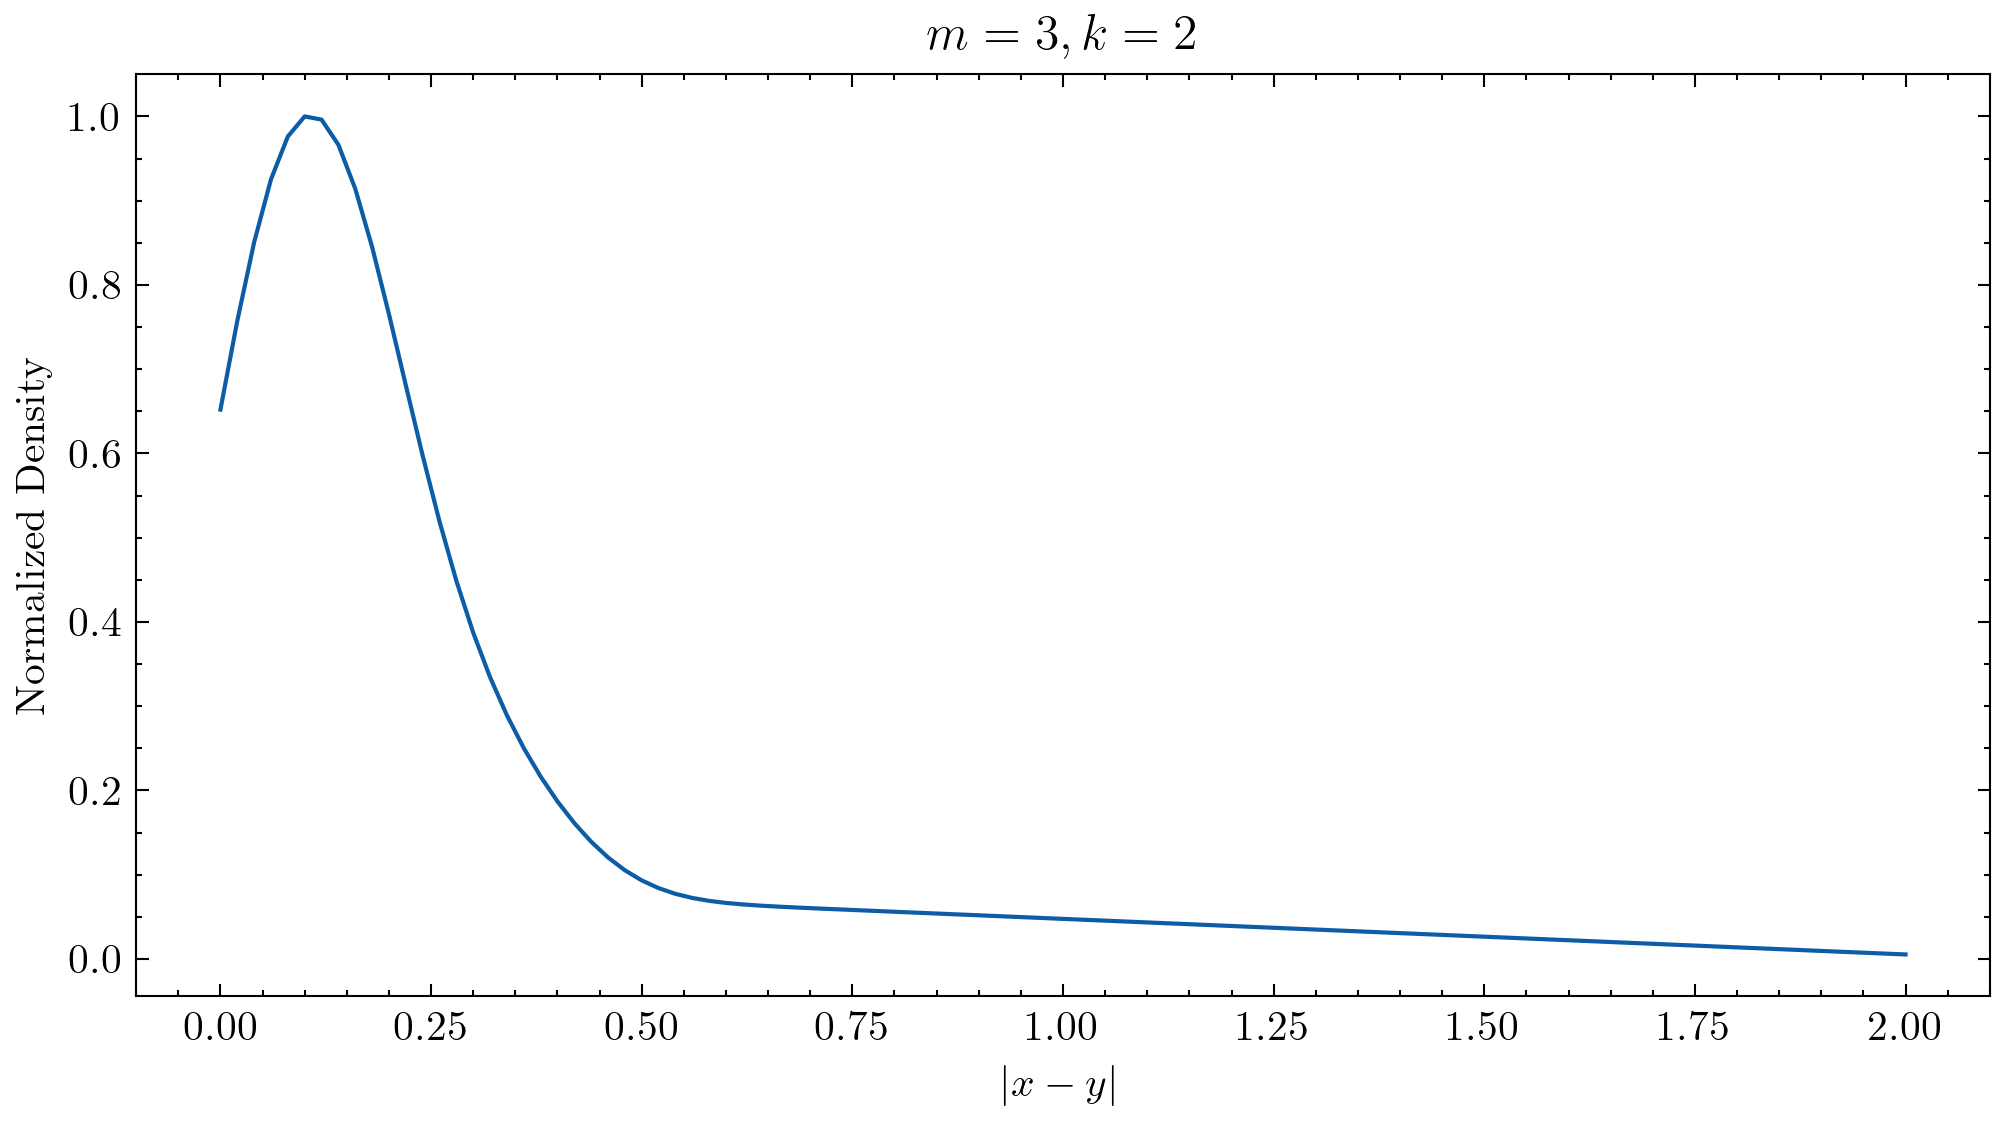

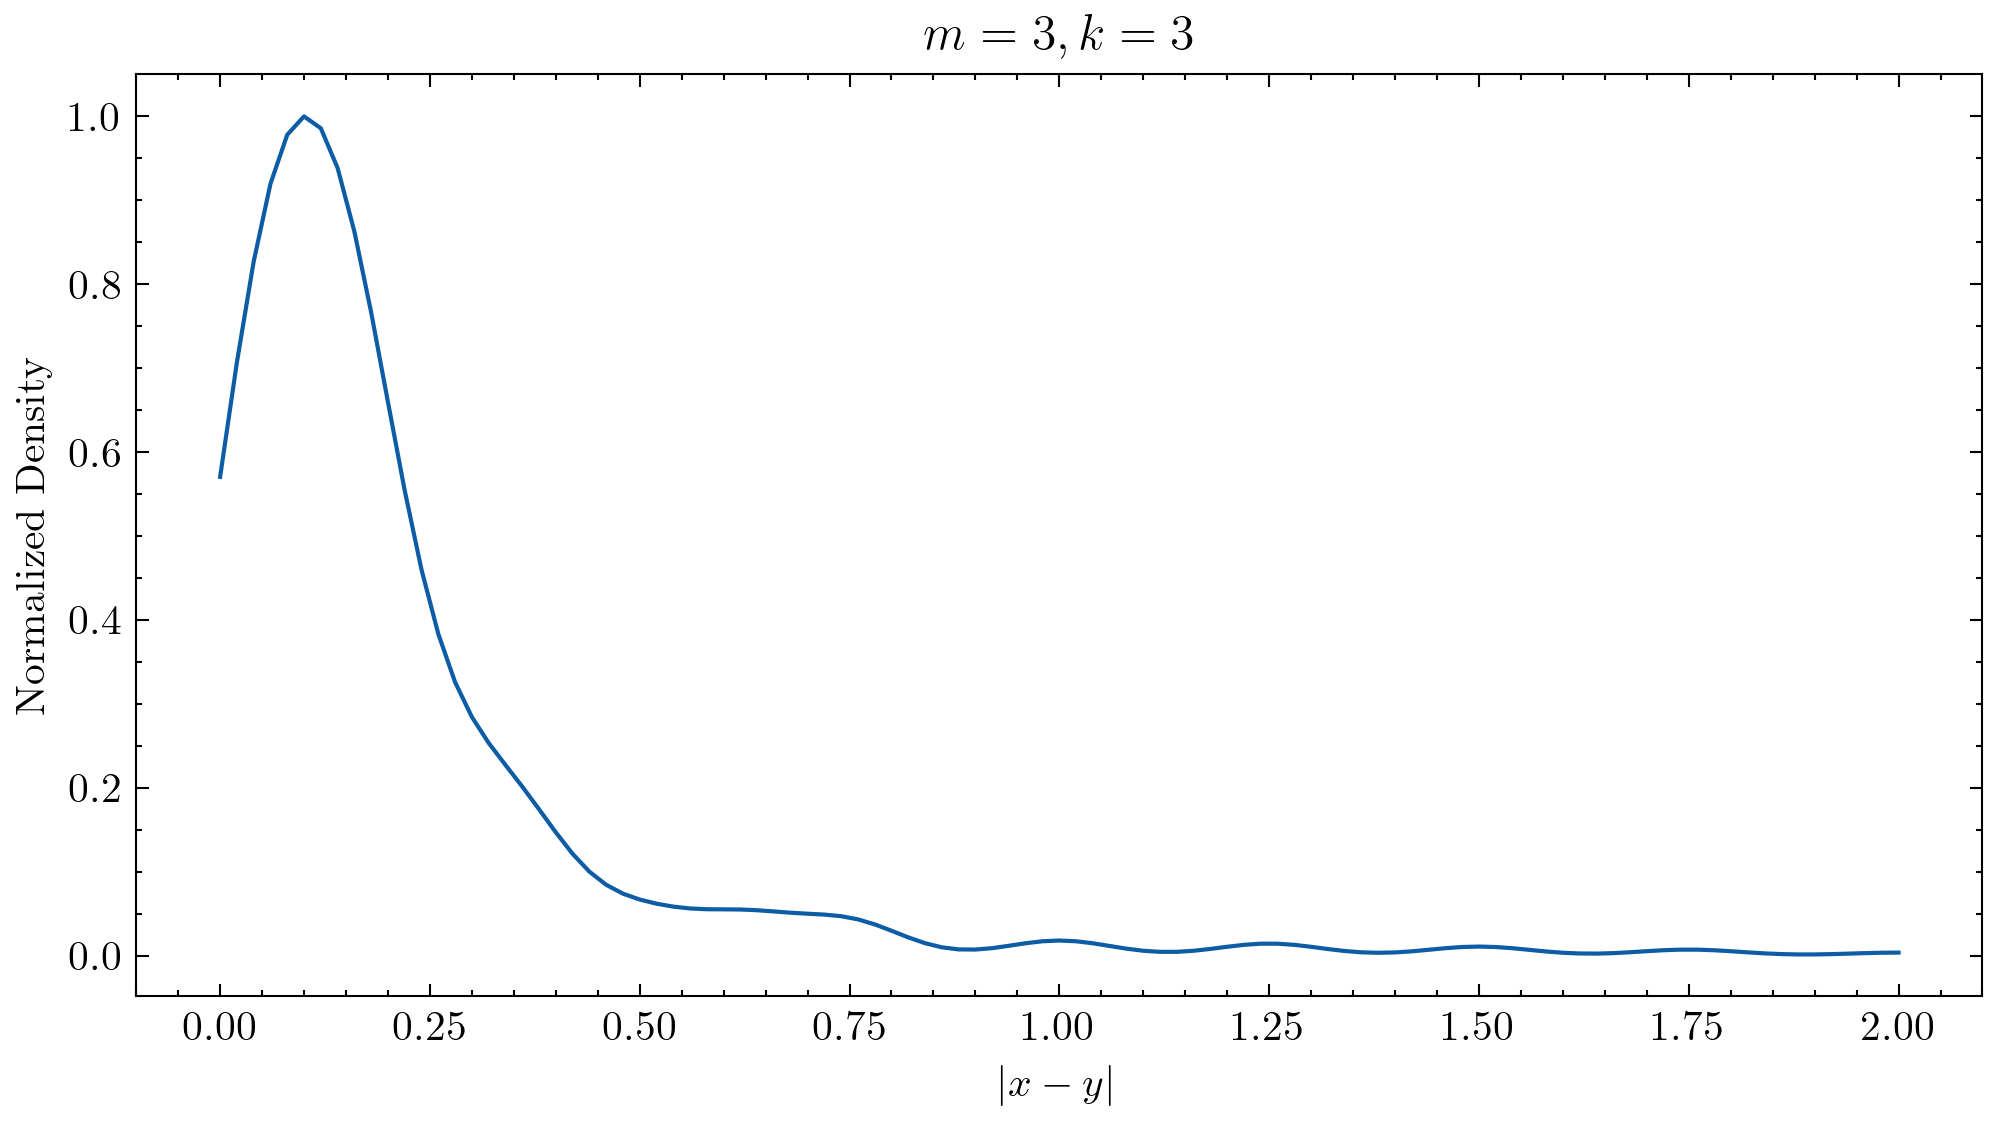

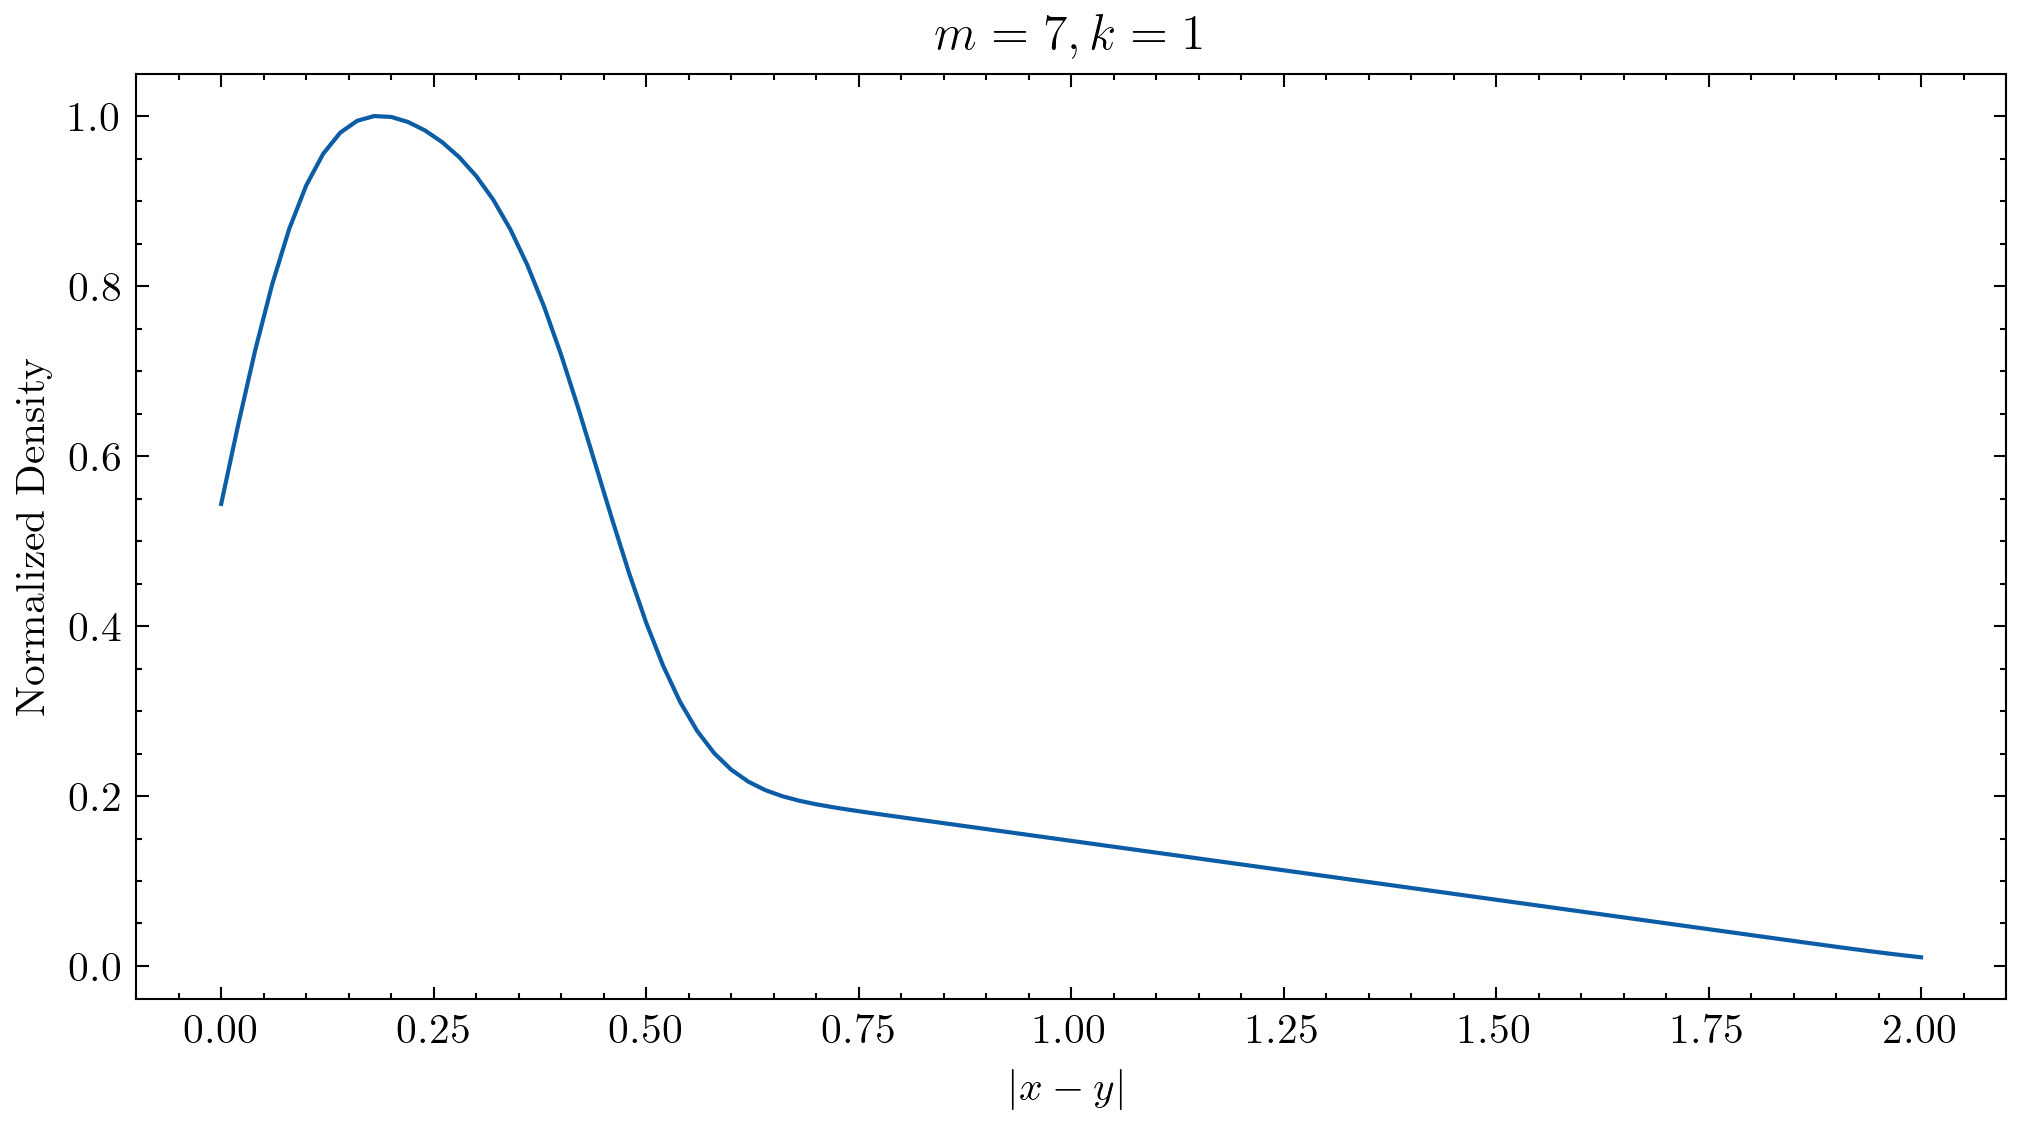

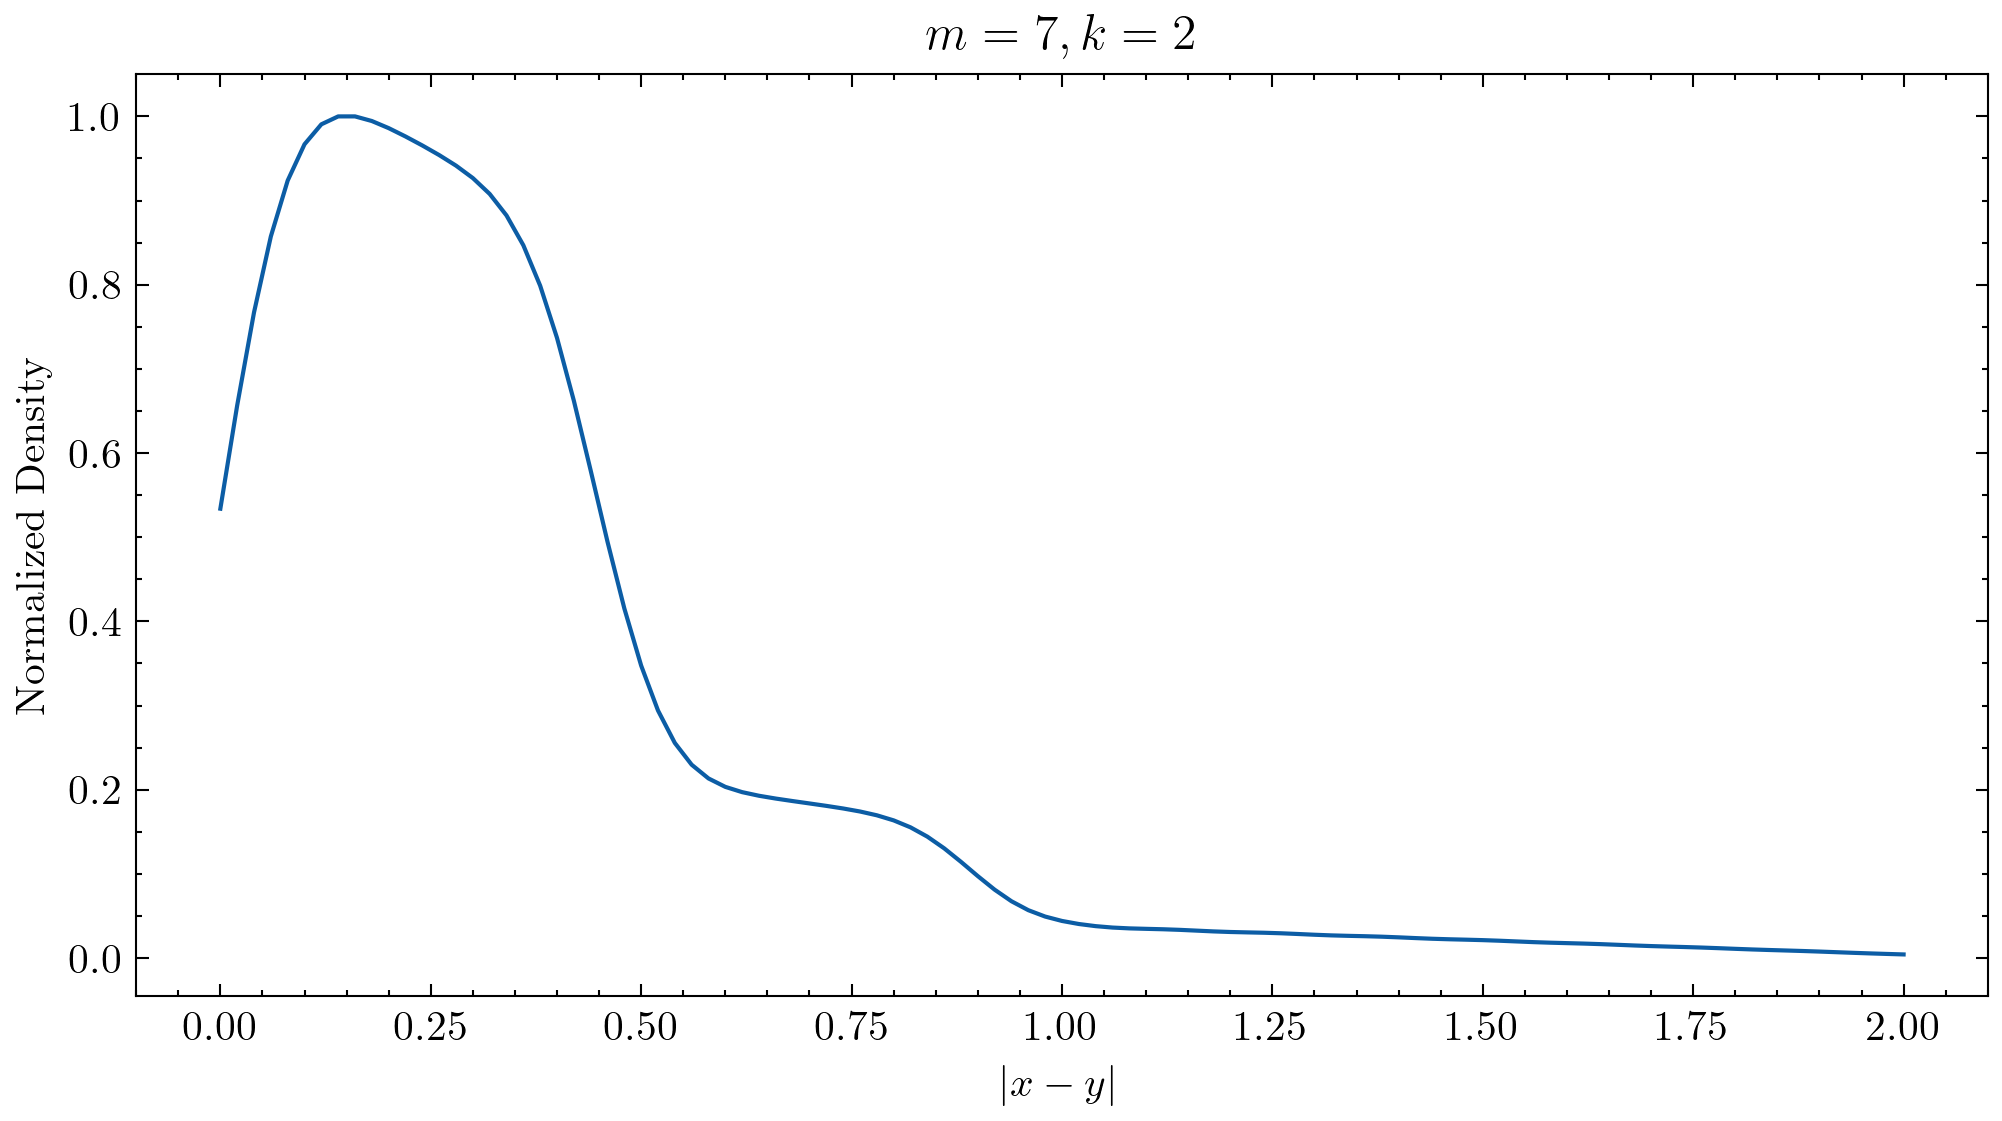

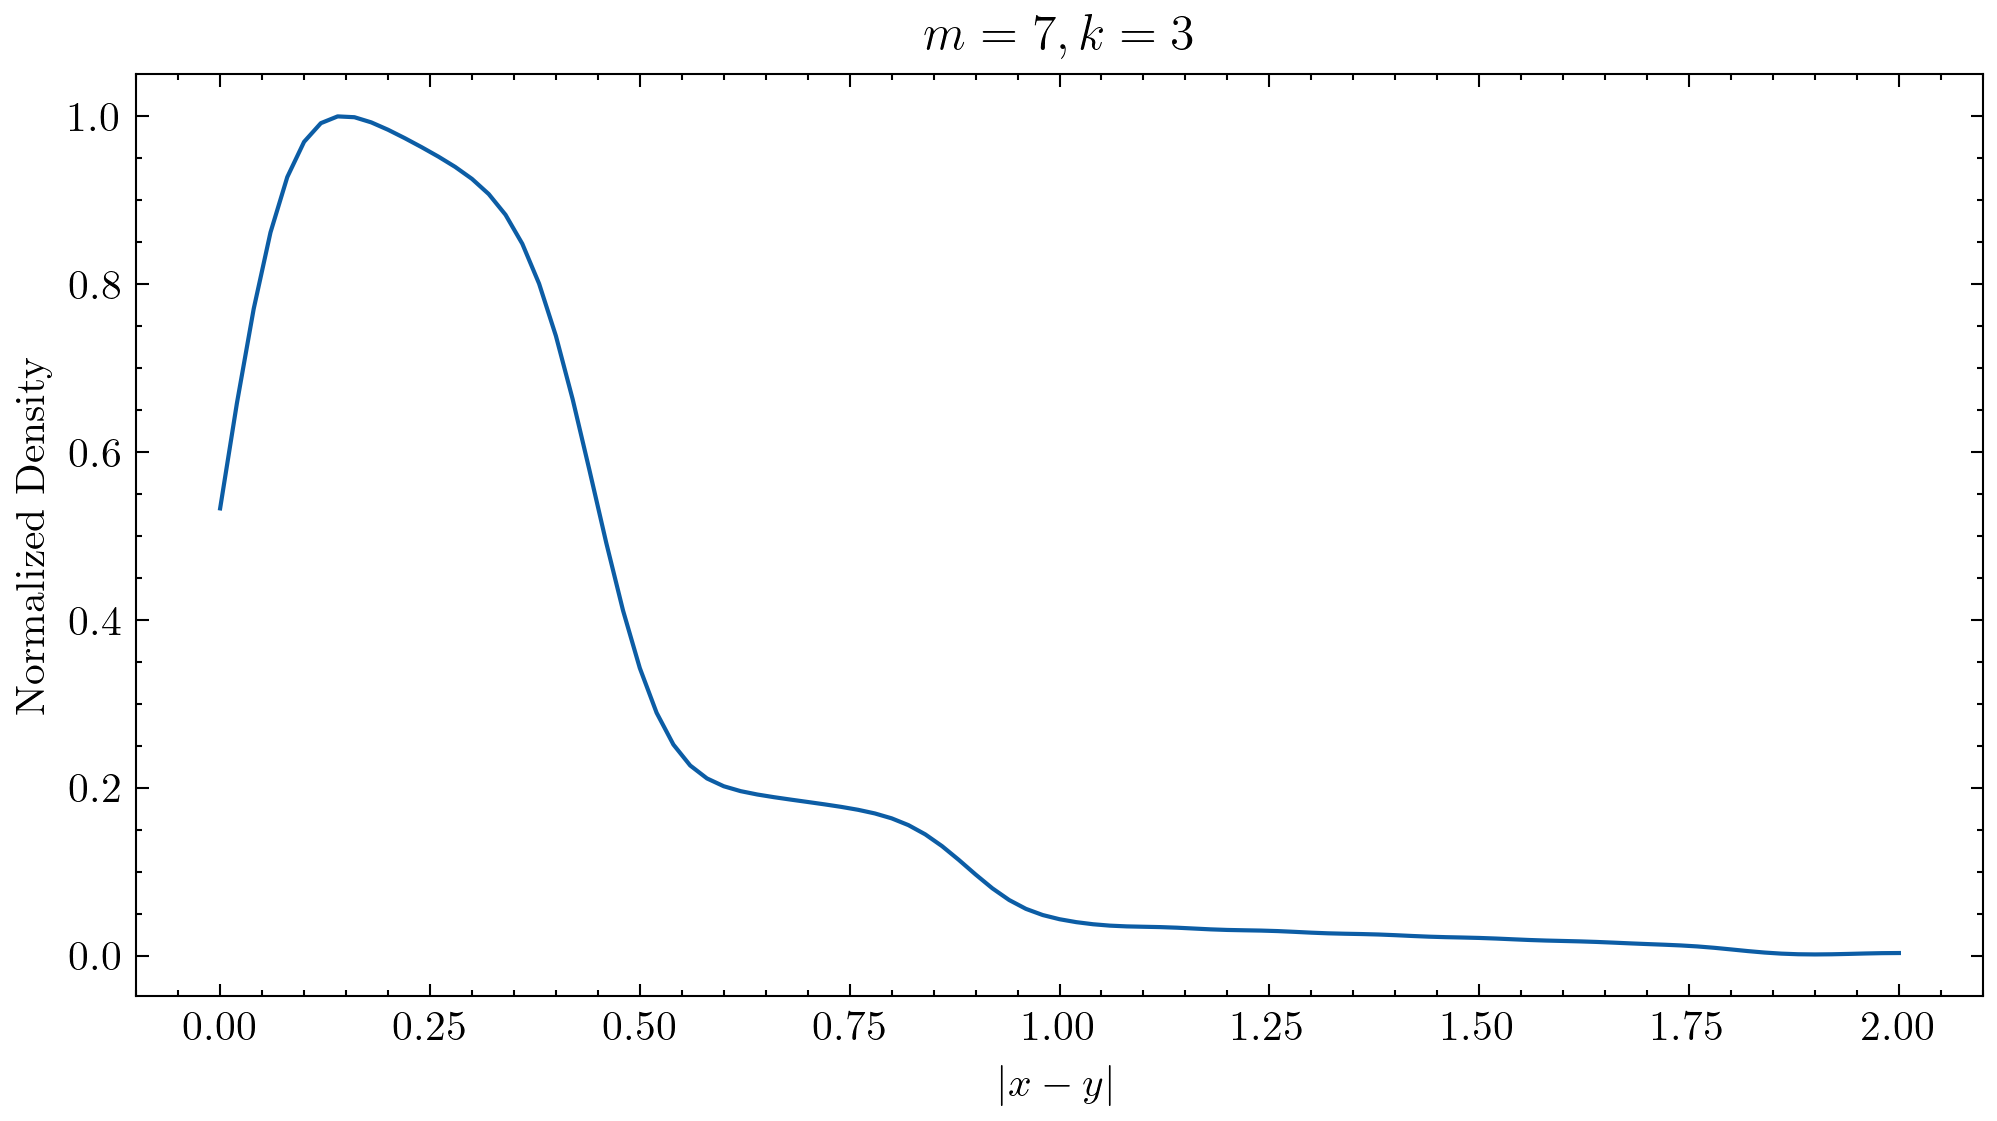

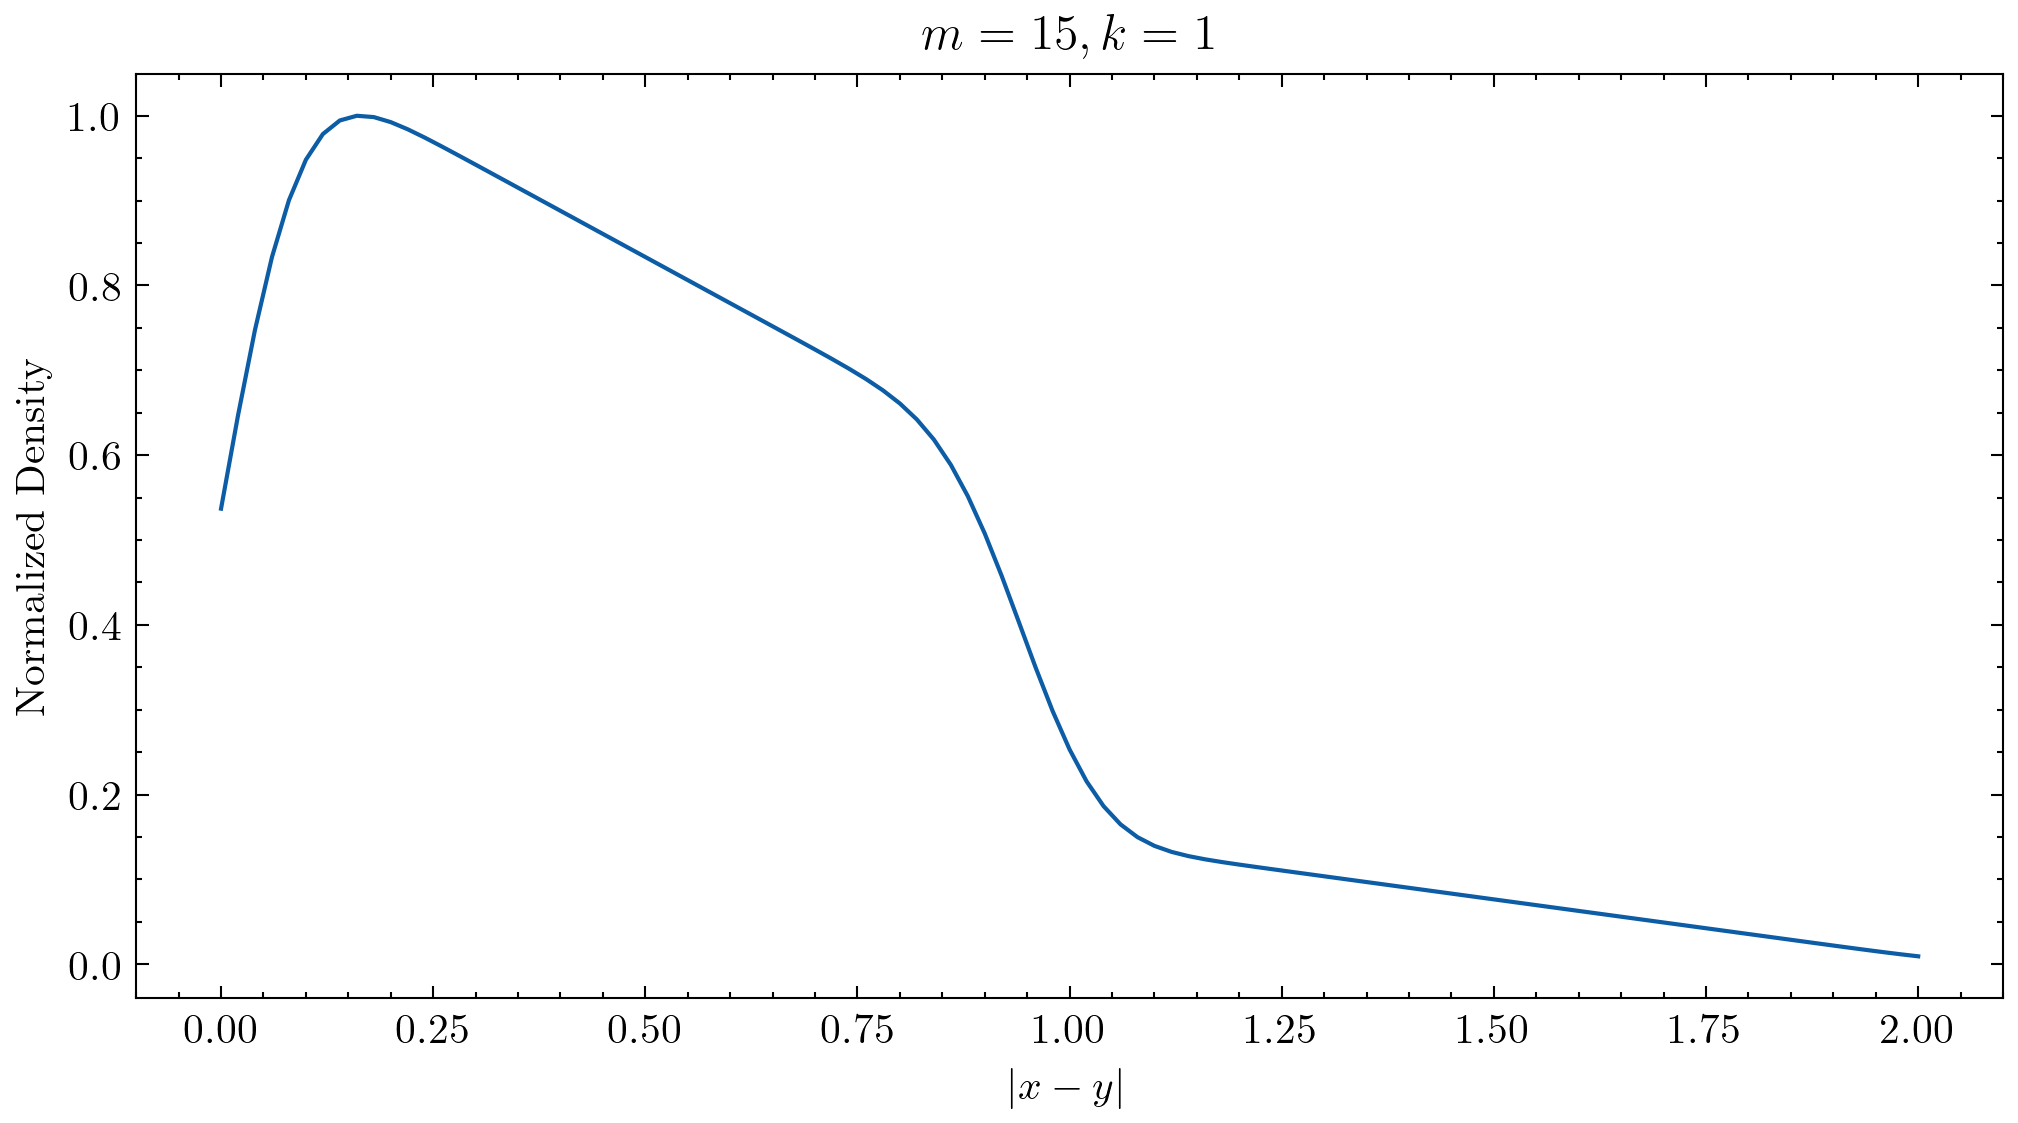

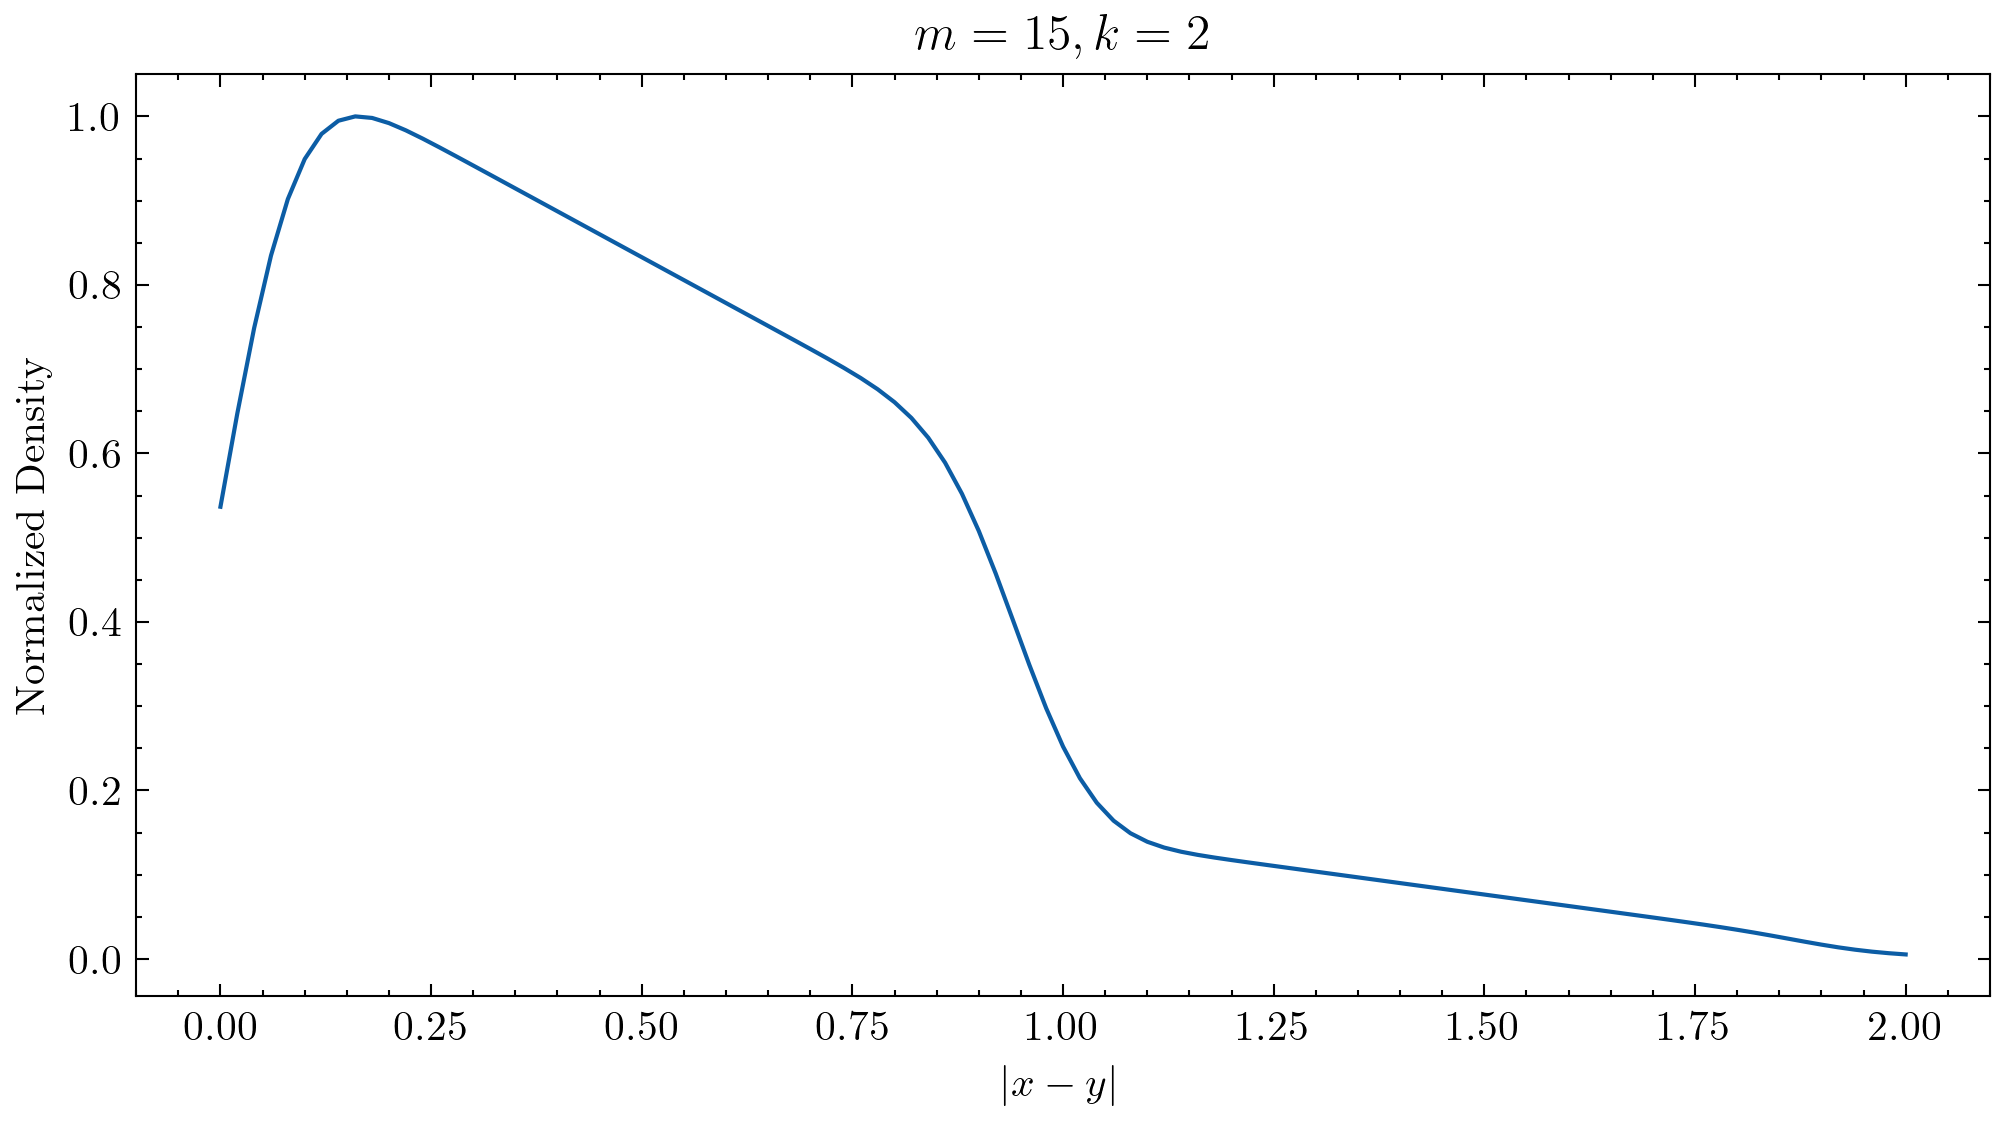

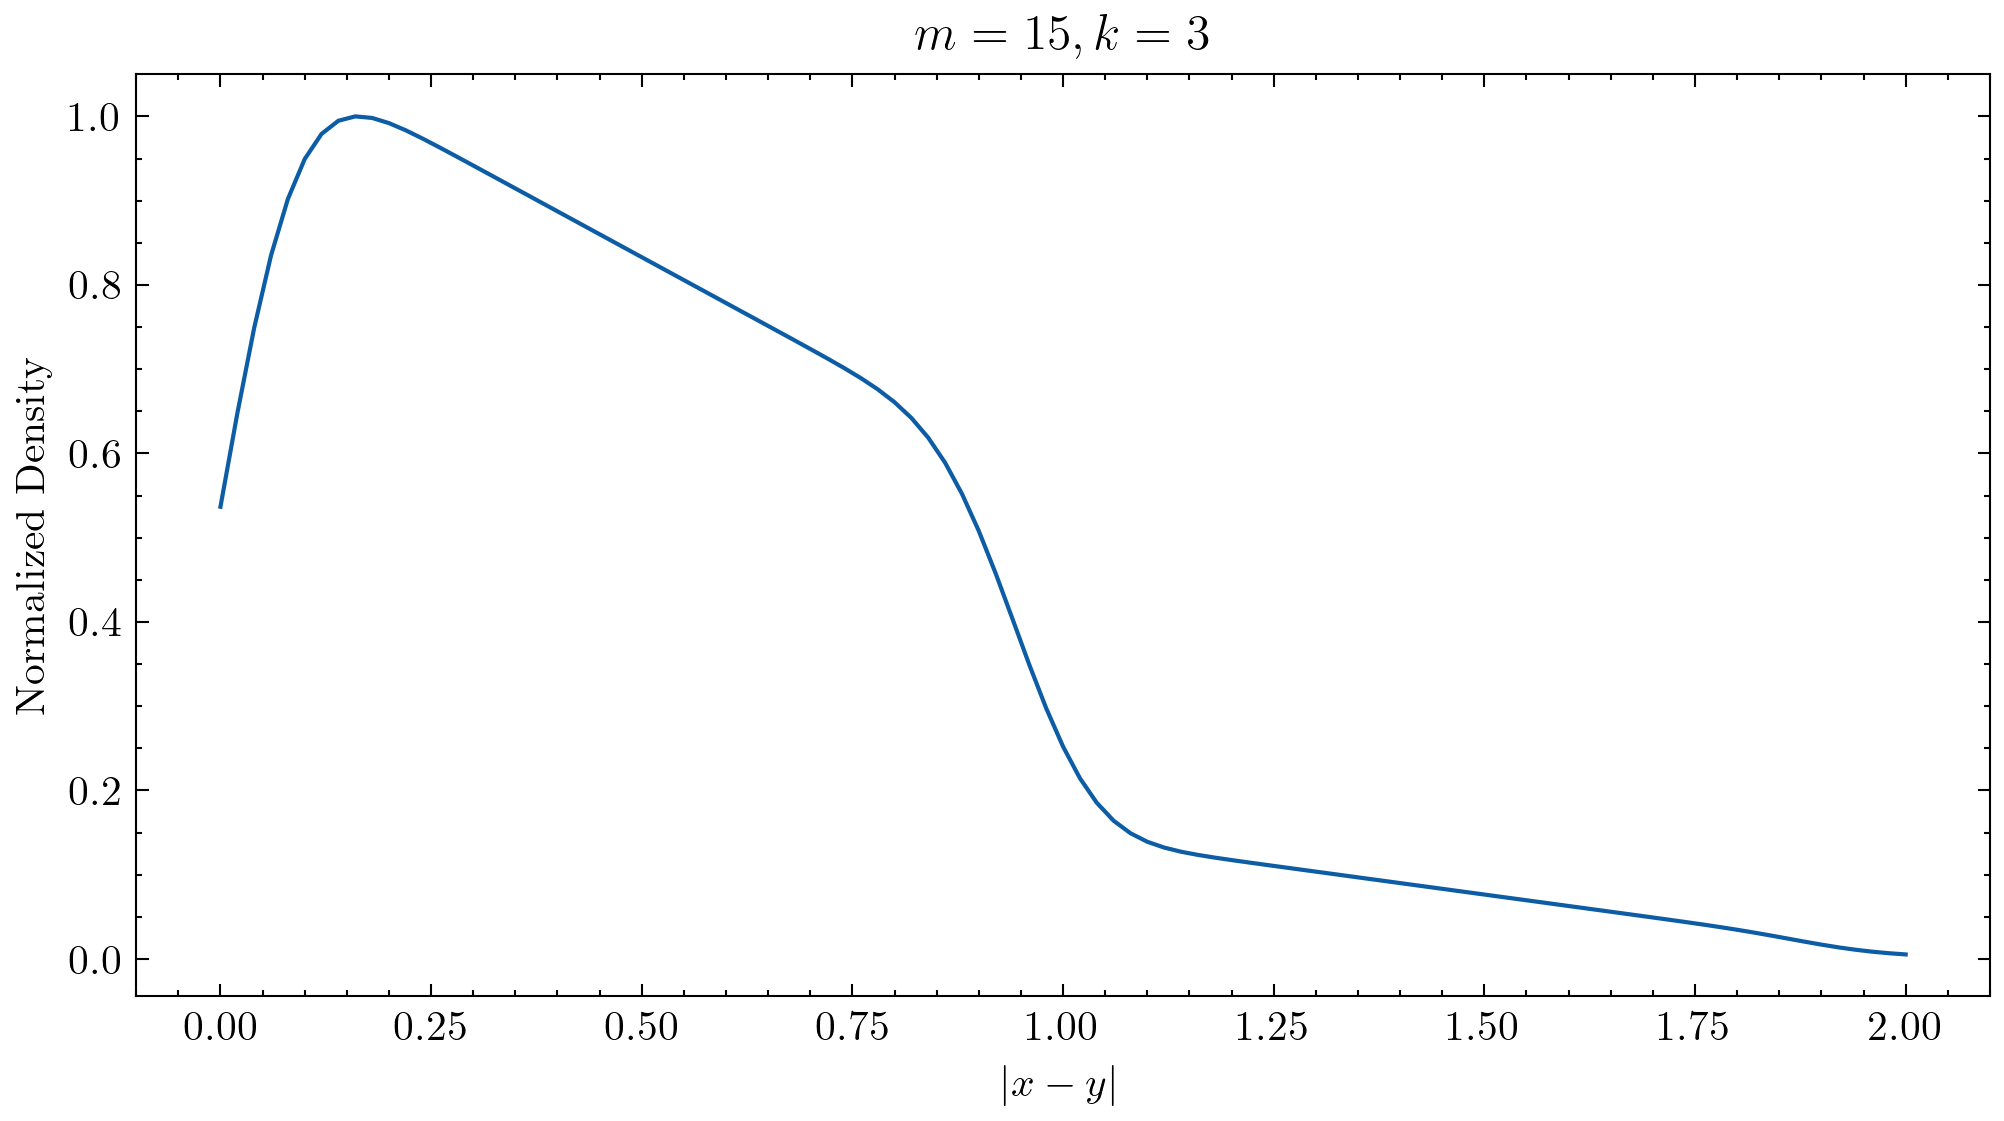

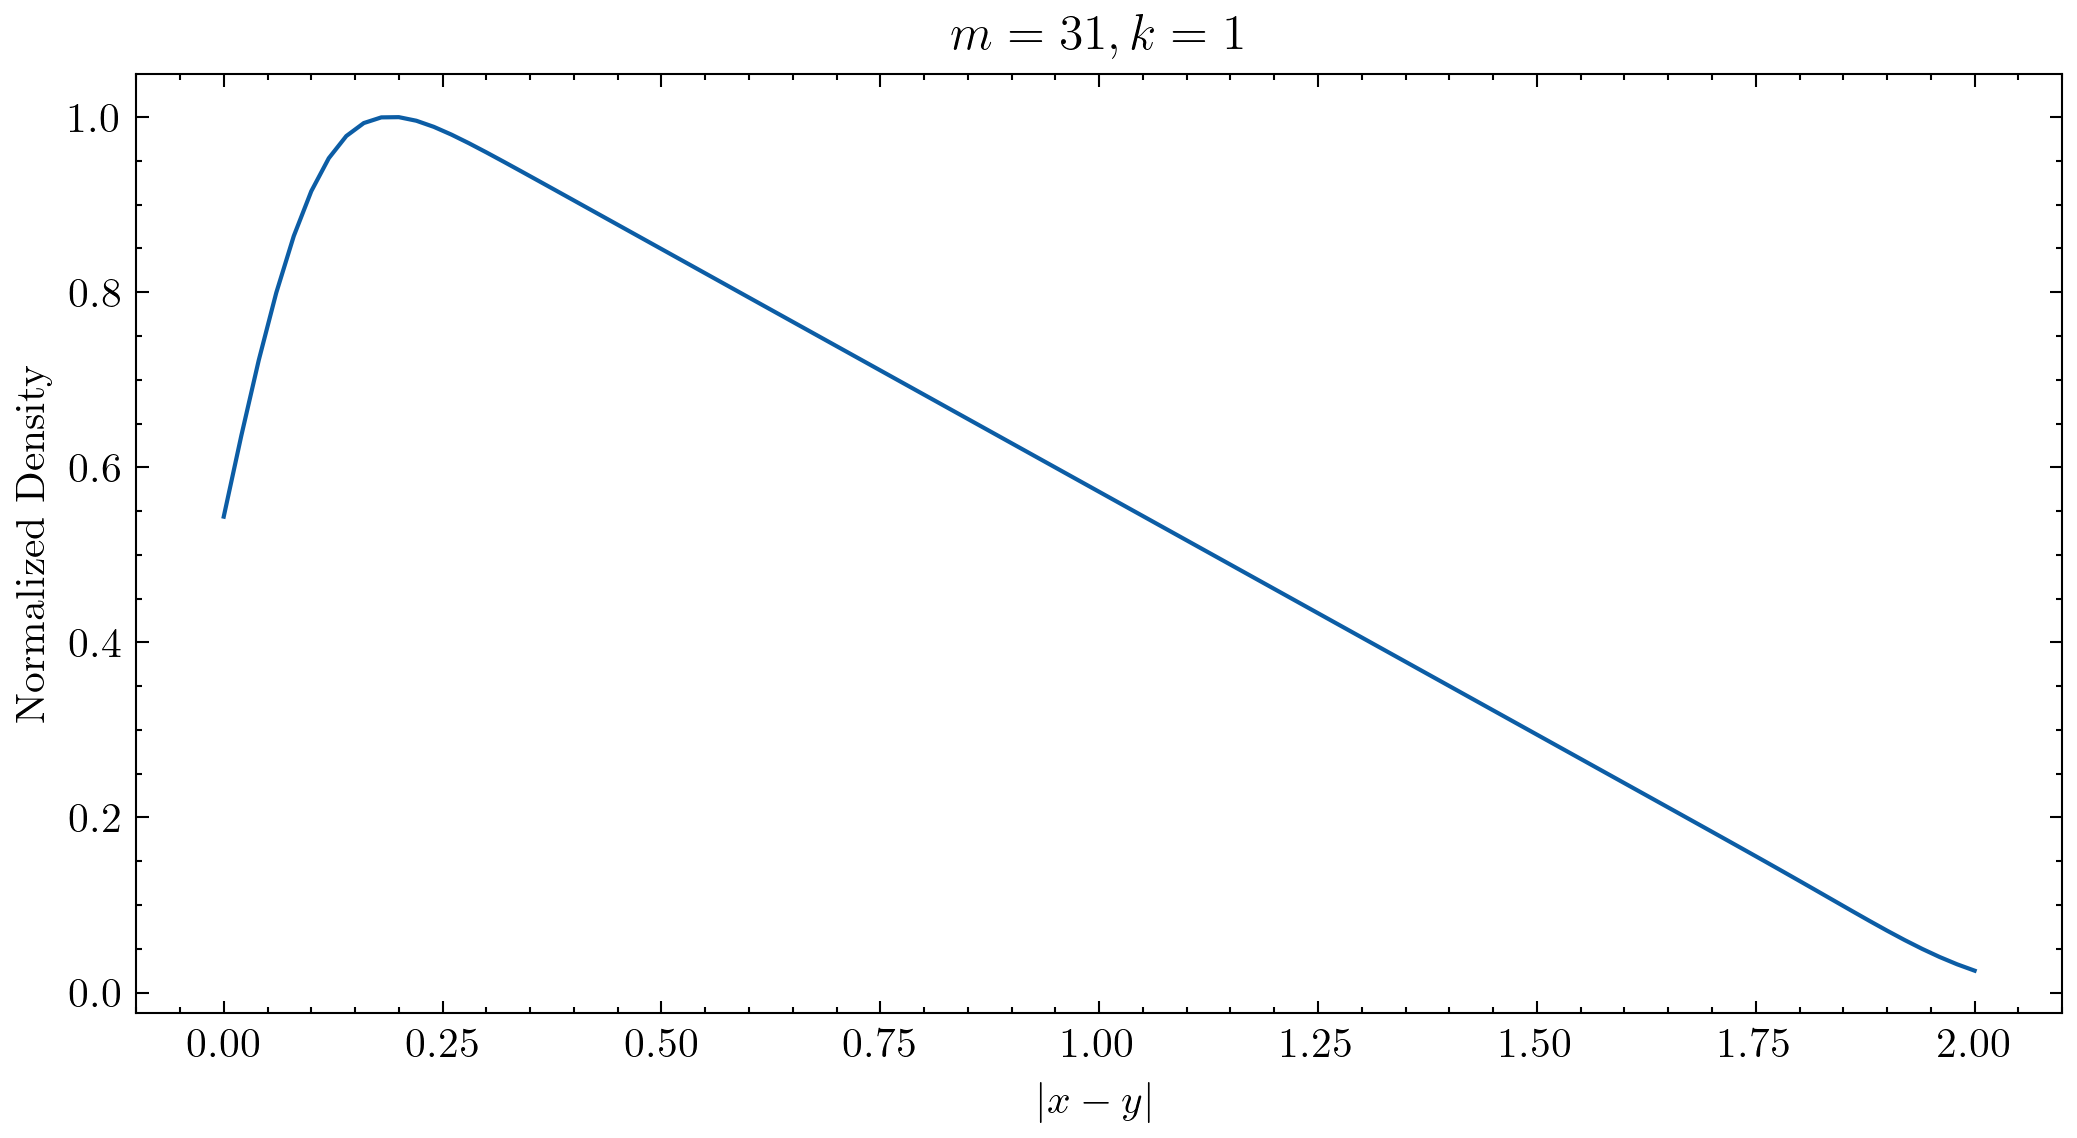

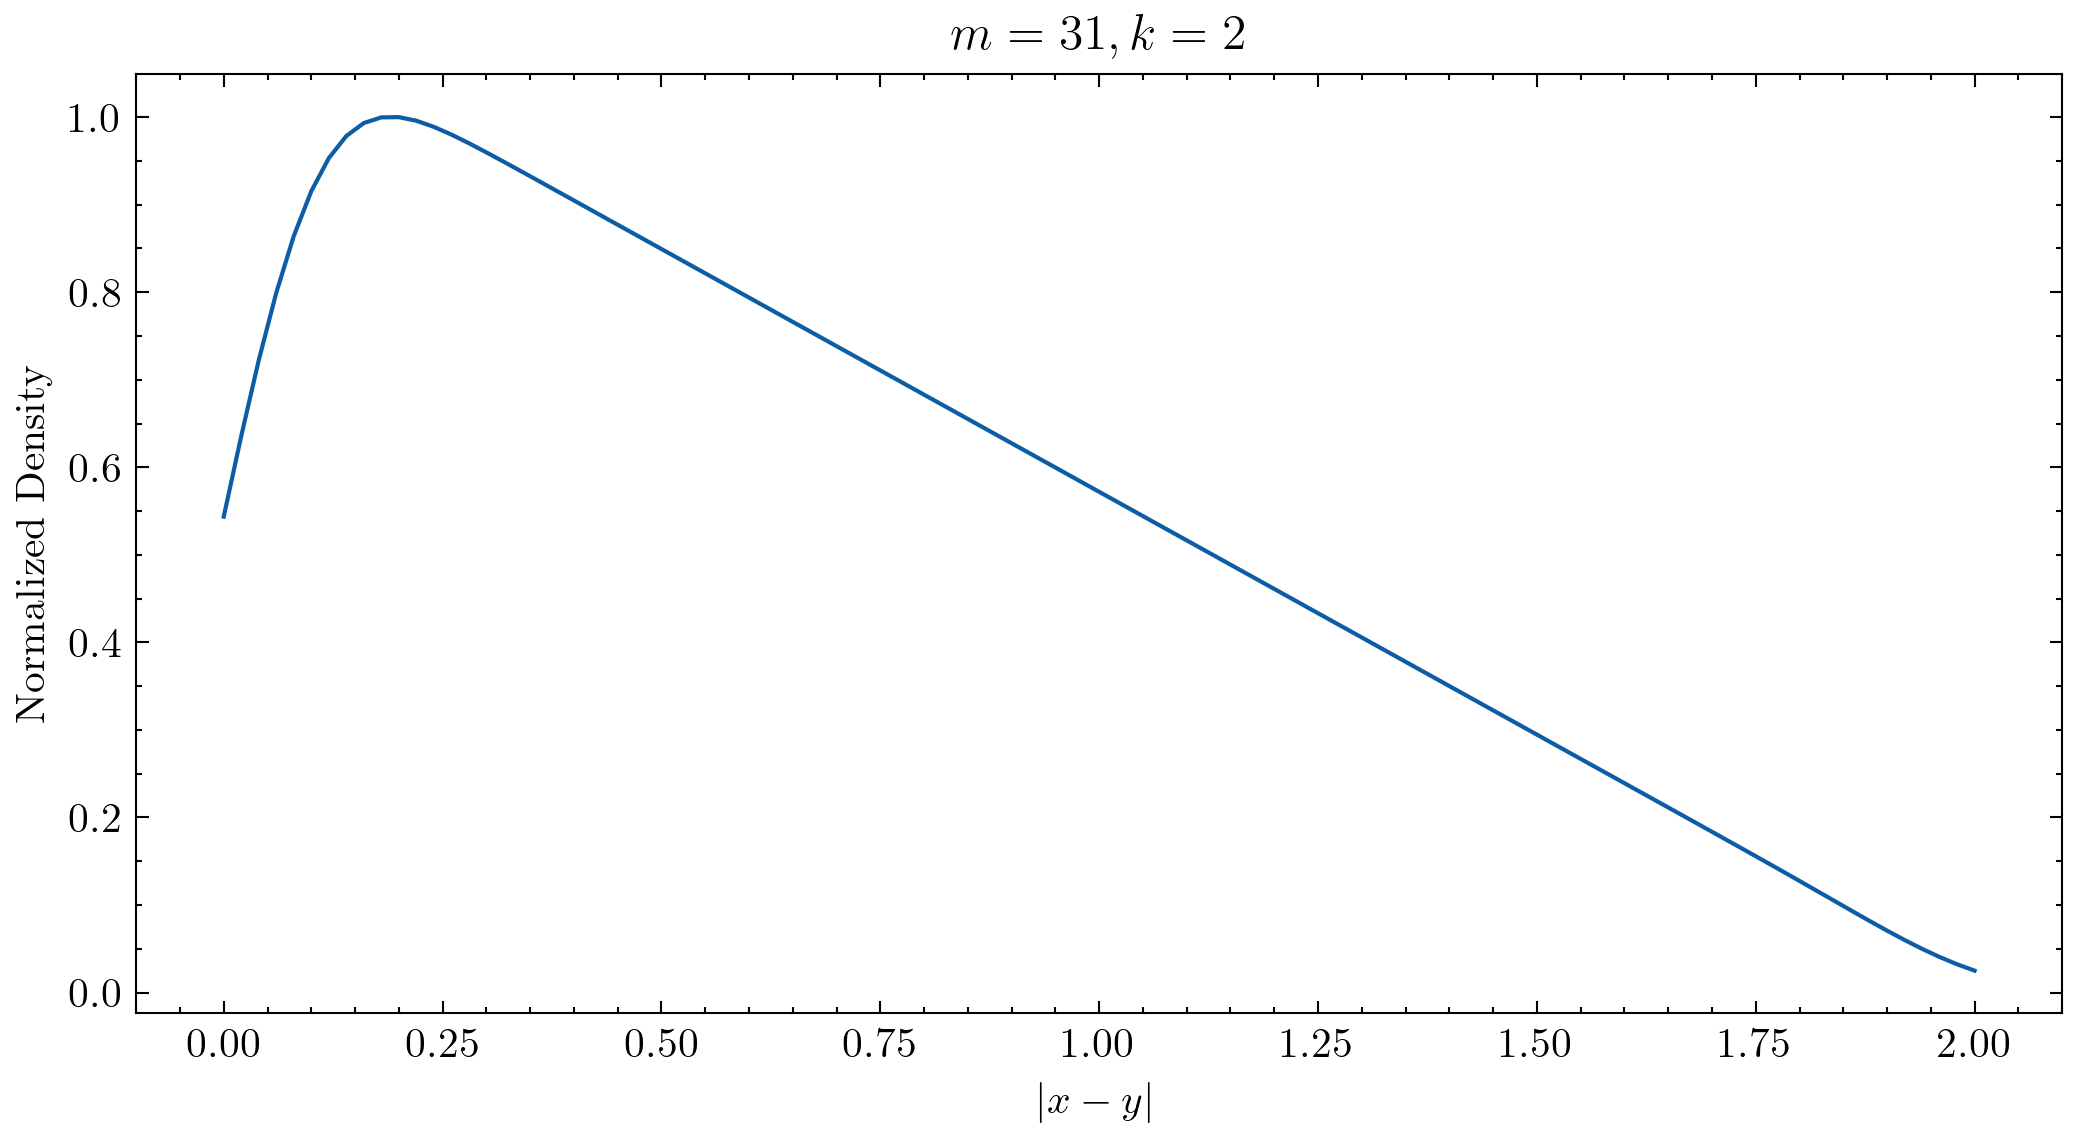

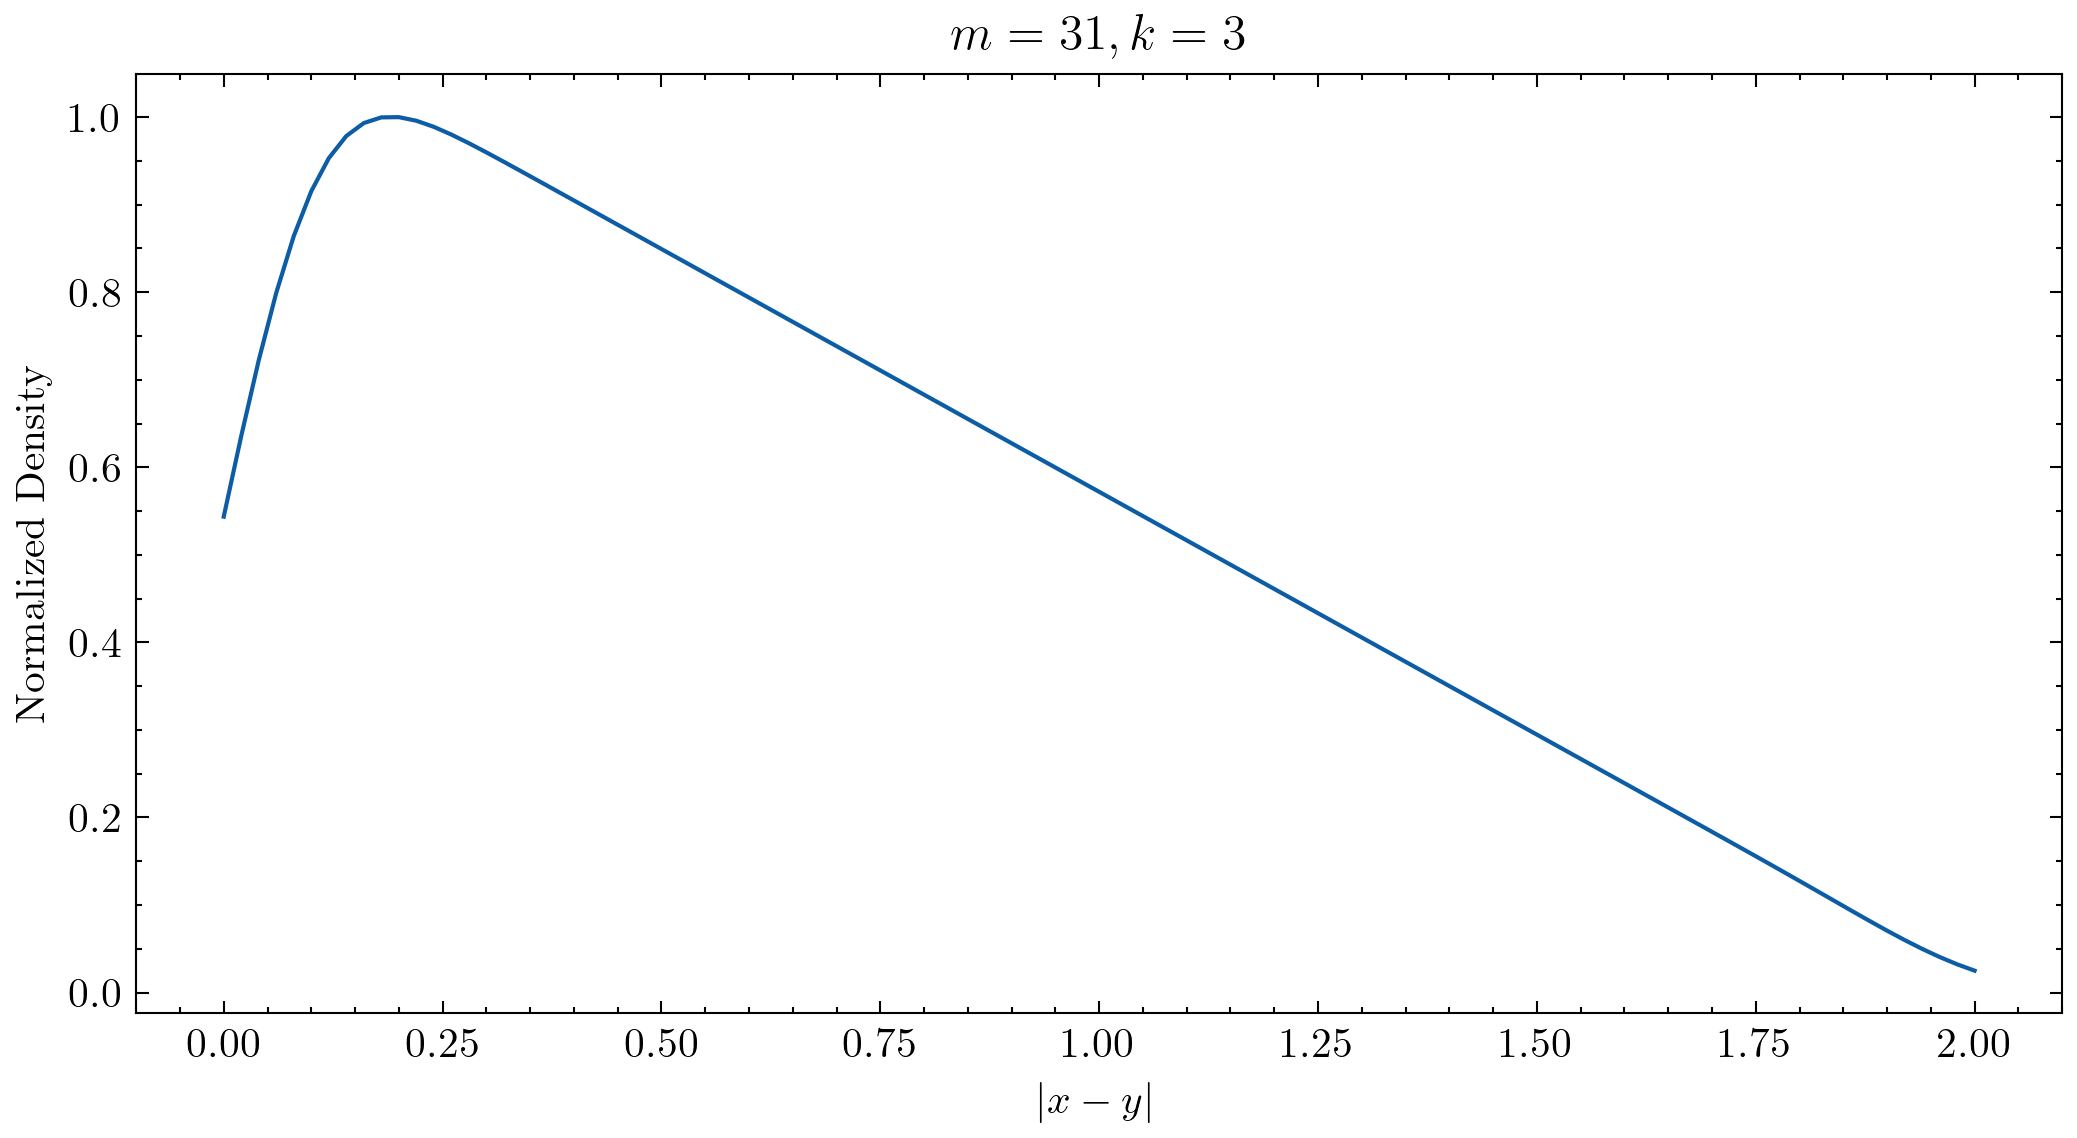

In [26]:
density_dict = {}

for m in [1, 3, 7, 15, 31]:
    for k in [1, 2, 3]:
        dd_gmg = DD_GMG1D(n,m,k,poisson_kernel,device)

        coarest_pts = dd_gmg.coarest_pts
        local_pts = []
        for l in range(k):
            x_2I_j_odd, _, mask_2I_j_odd = dd_gmg.pts_local[l][0]
            x_i_odd_j, _, mask_i_odd_j = dd_gmg.pts_local[l][1]
            local_pts.append(x_2I_j_odd[mask_2I_j_odd])
            local_pts.append(x_i_odd_j[mask_i_odd_j])
        local_pts = torch.concat(local_pts)

        full_pts = torch.vstack((coarest_pts, local_pts))

        pts_dist = (full_pts[:,0] - full_pts[:,1]).abs()
        kernel = stats.gaussian_kde(pts_dist)
        x = np.linspace(0,2,101)
        d = kernel(x)
        d = d/d.max()

        density_dict[(k,m)] = d

        cm = 1/2.54
        # visualize kernel slice
        f = plt.figure(figsize=(20*cm,10*cm))
        ax = f.add_subplot(111)
        ax.plot(x, d)
        ax.set_aspect('equal')
        ax.set_title('$m={:}, k={:}$'.format(m,k))
        ax.set_xlabel('$|x-y|$')
        ax.set_ylabel('Normalized Density')

        plt.tight_layout()
        outnm = './gmg_dist_m{:}_k{:}.png'.format(m, k)
        plt.savefig(outnm)
        print("saved : ", outnm)

KeyError: (2, 5)

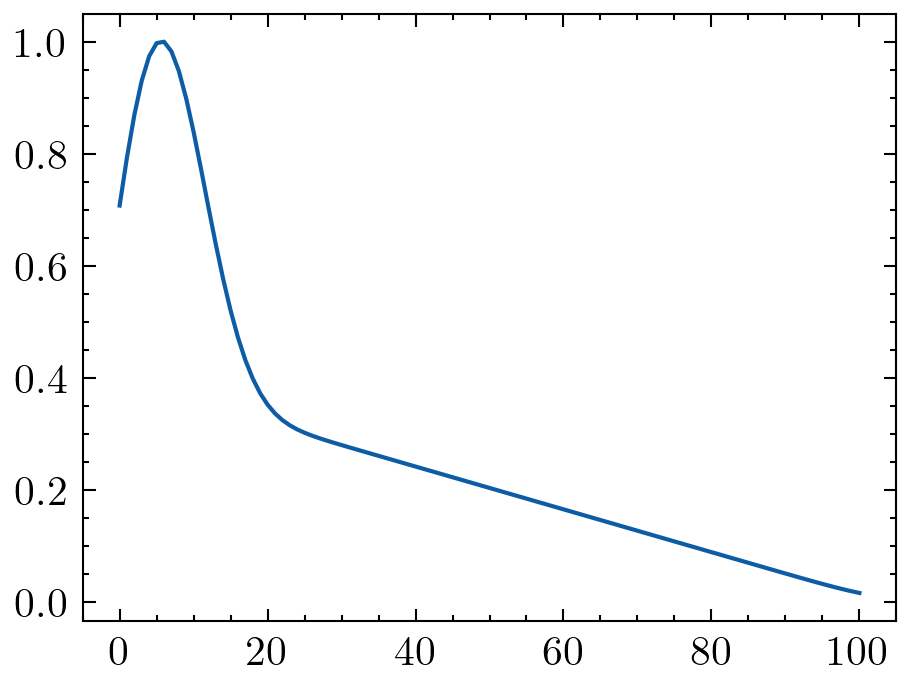

In [30]:
plt.plot(density_dict[(1,3)], label="$k=1,m=3$")
plt.plot(density_dict[(2,5)],label="$k=2,m=5$")
# plt.plot(density_dict[(3,15)],label="$k=3,m=15$")
plt.legend()

# coarest pts :  1185921
# correction :  56640
ratio 1242561/17850625 = 6.96% 

saved :  ./gmg2d_dist_m1_k1.png
# coarest pts :  1185921
# correction :  507064
ratio 1692985/17850625 = 9.48% 

saved :  ./gmg2d_dist_m3_k1.png
# coarest pts :  1185921
# correction :  1331512
ratio 2517433/17850625 = 14.10% 

saved :  ./gmg2d_dist_m5_k1.png
# coarest pts :  1185921
# correction :  2447904
ratio 3633825/17850625 = 20.36% 

saved :  ./gmg2d_dist_m7_k1.png
# coarest pts :  83521
# correction :  70880
ratio 154401/17850625 = 0.86% 

saved :  ./gmg2d_dist_m1_k2.png
# coarest pts :  83521
# correction :  625936
ratio 709457/17850625 = 3.97% 

saved :  ./gmg2d_dist_m3_k2.png
# coarest pts :  83521
# correction :  1621584
ratio 1705105/17850625 = 9.55% 

saved :  ./gmg2d_dist_m5_k2.png
# coarest pts :  83521
# correction :  2939744
ratio 3023265/17850625 = 16.94% 

saved :  ./gmg2d_dist_m7_k2.png
# coarest pts :  6561
# correction :  74480
ratio 81041/17850625 = 0.45% 

saved :  ./gmg2d_dist_m1_k

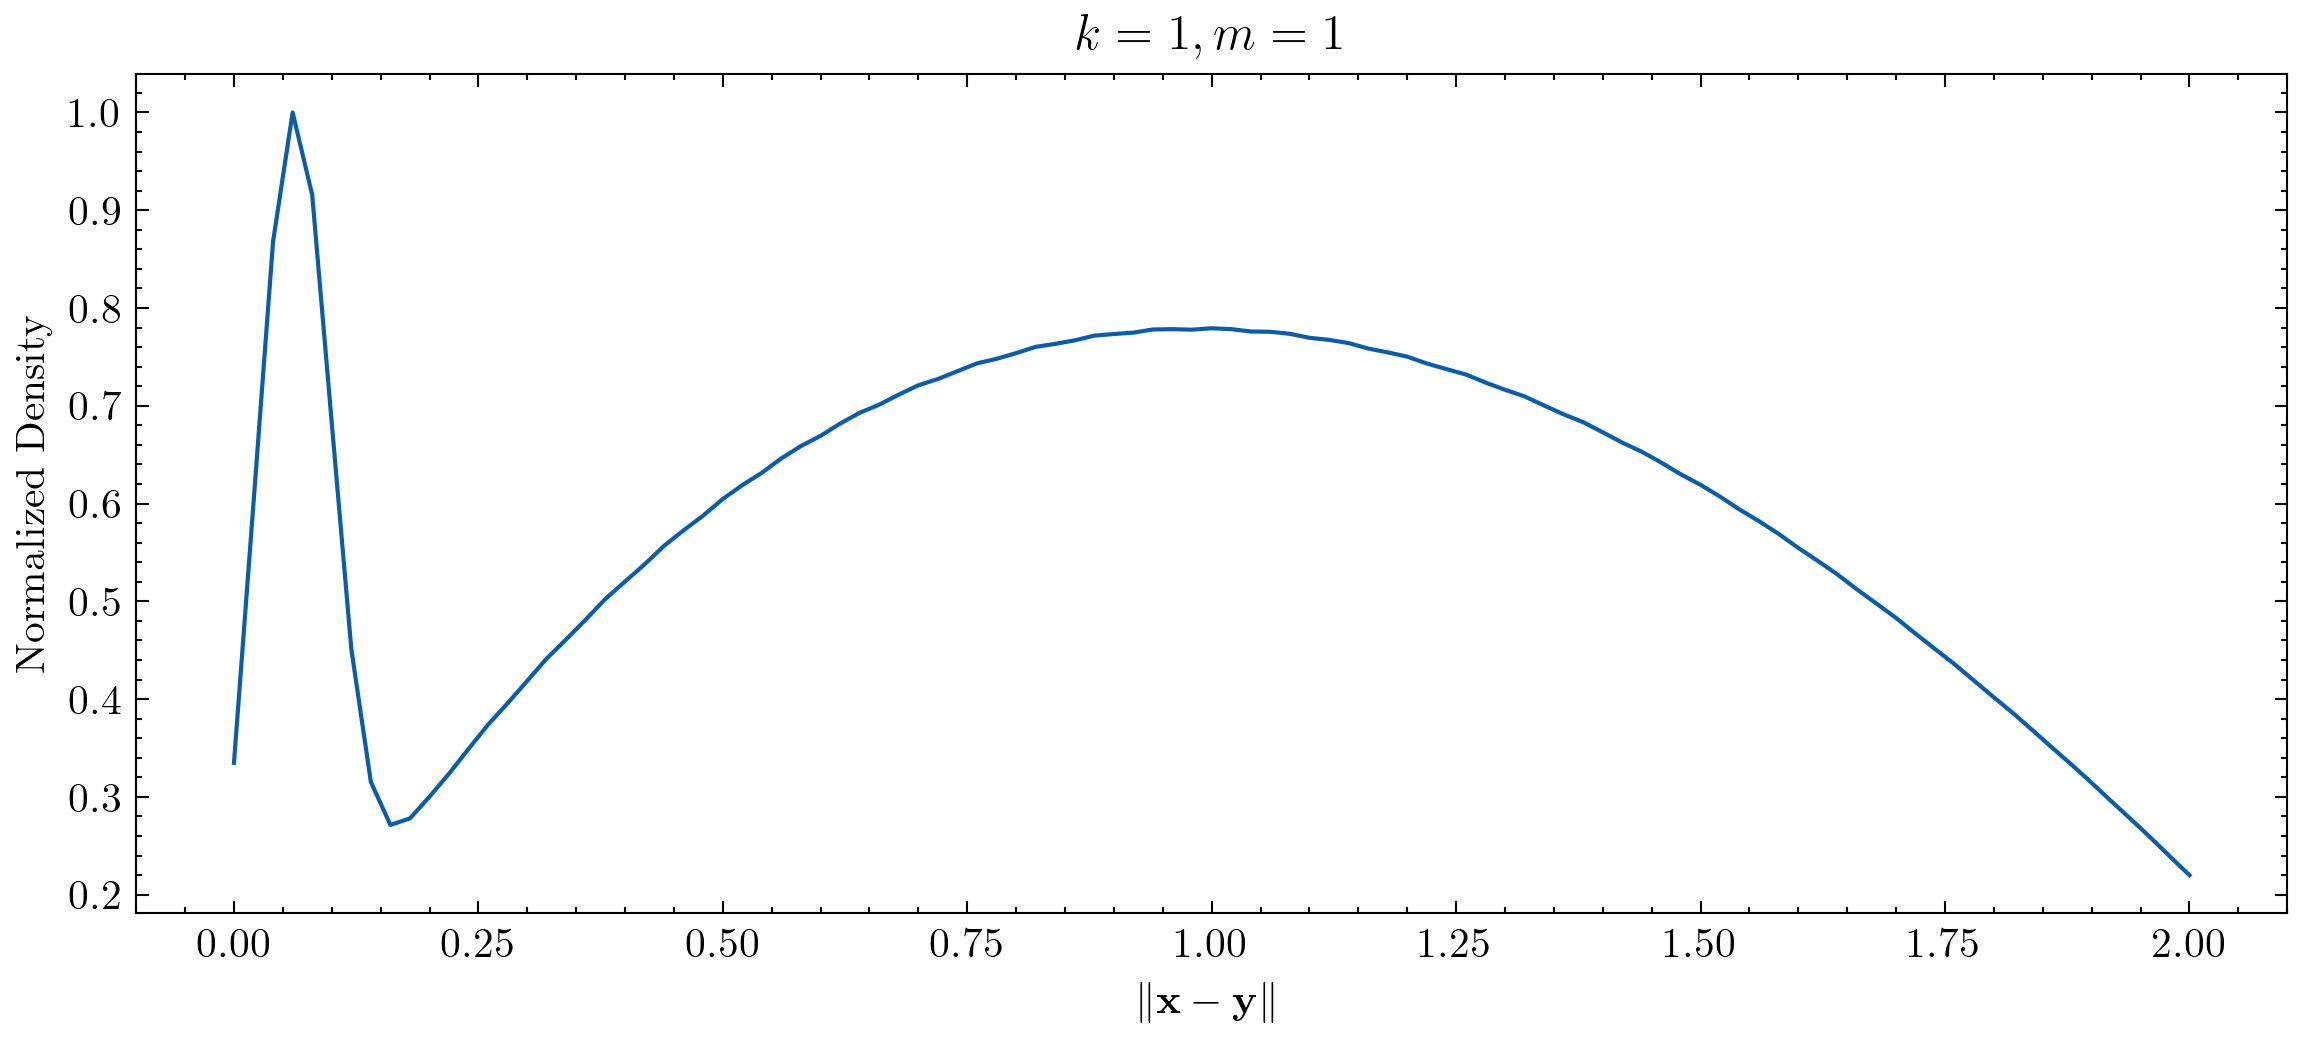

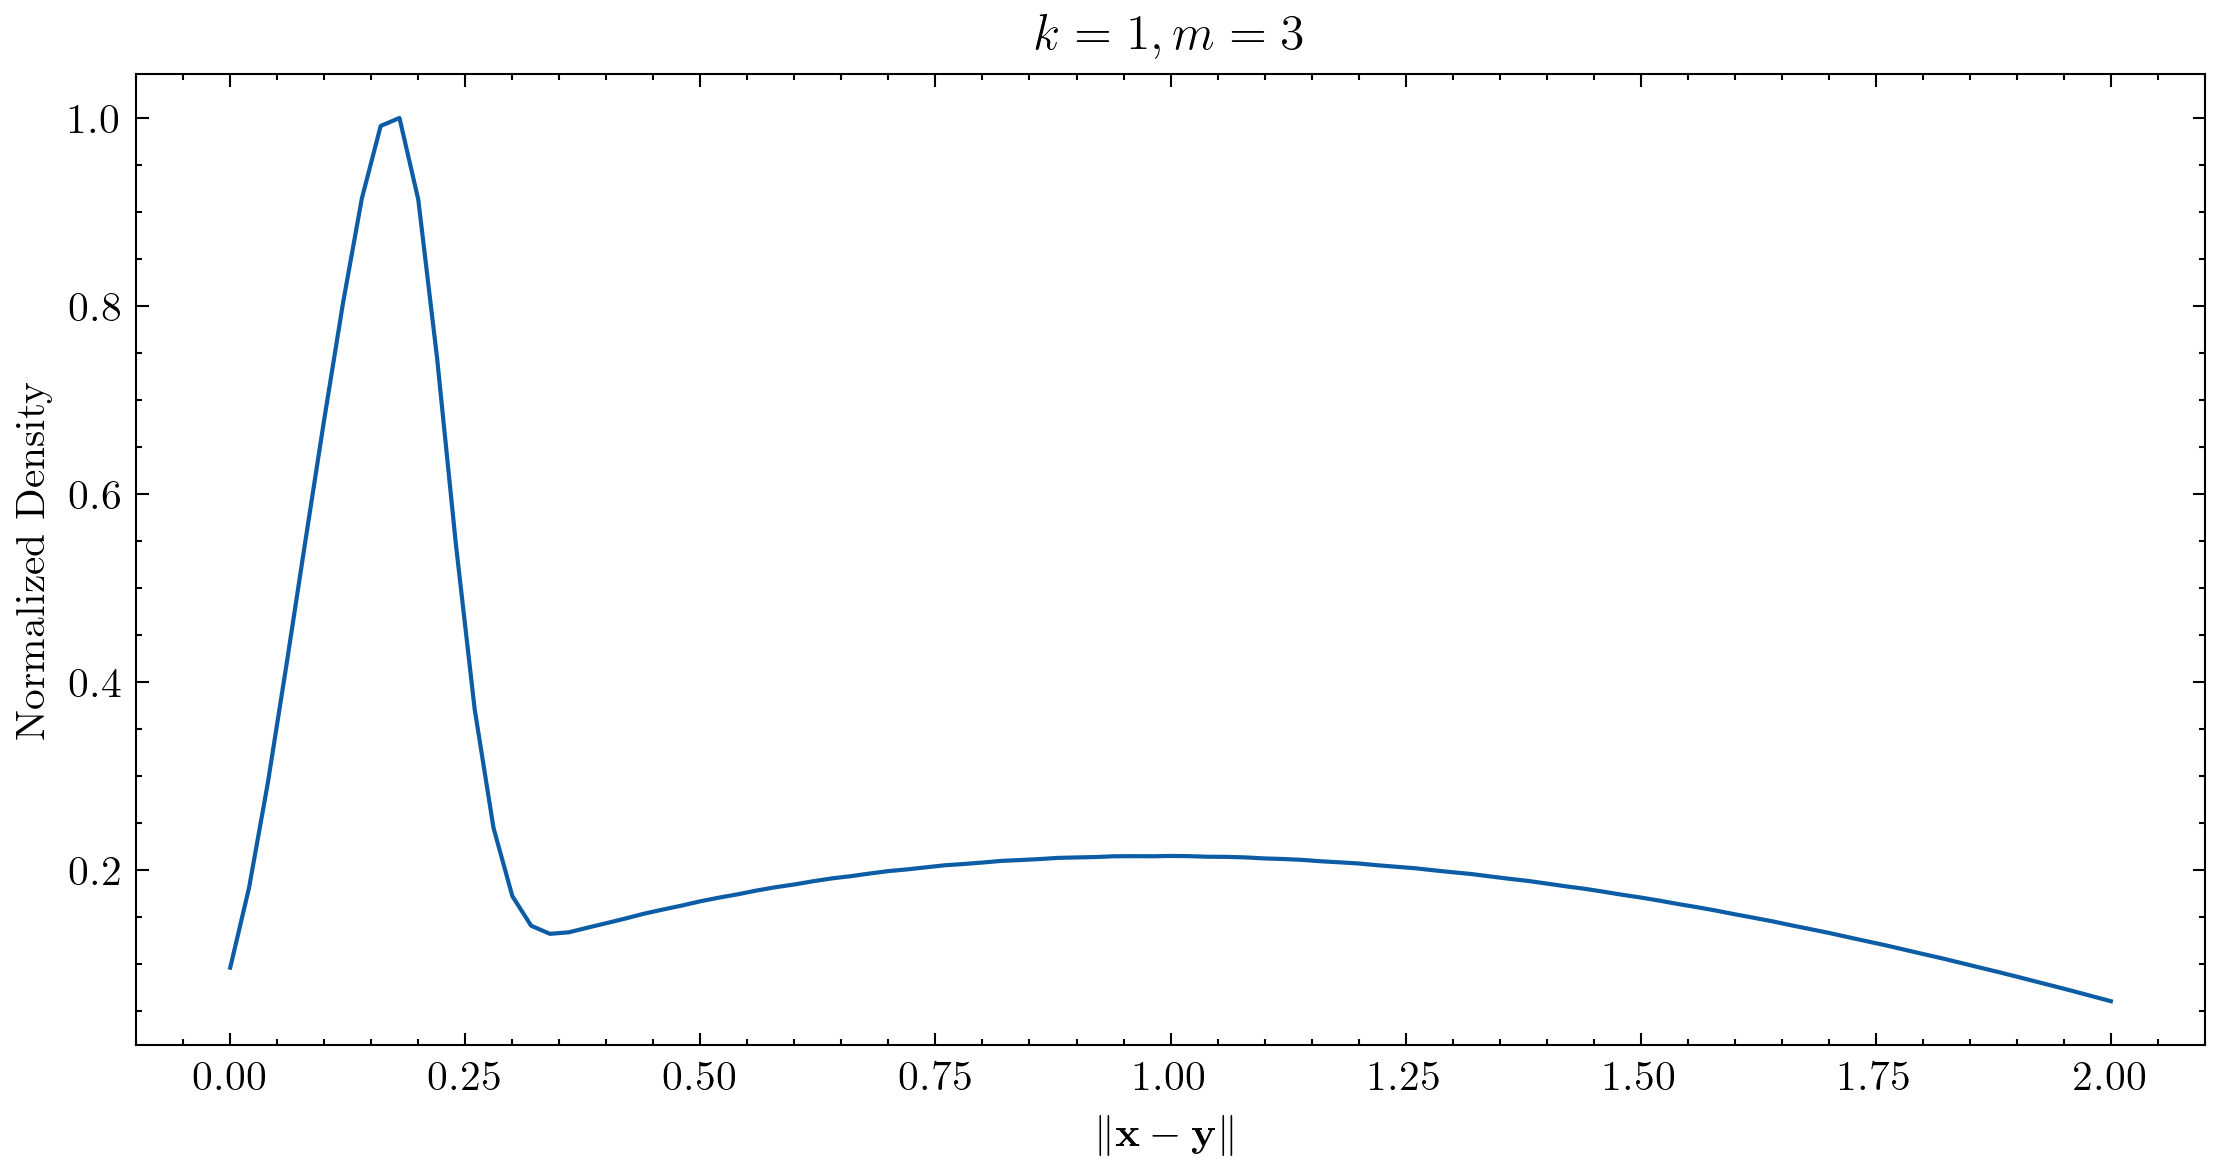

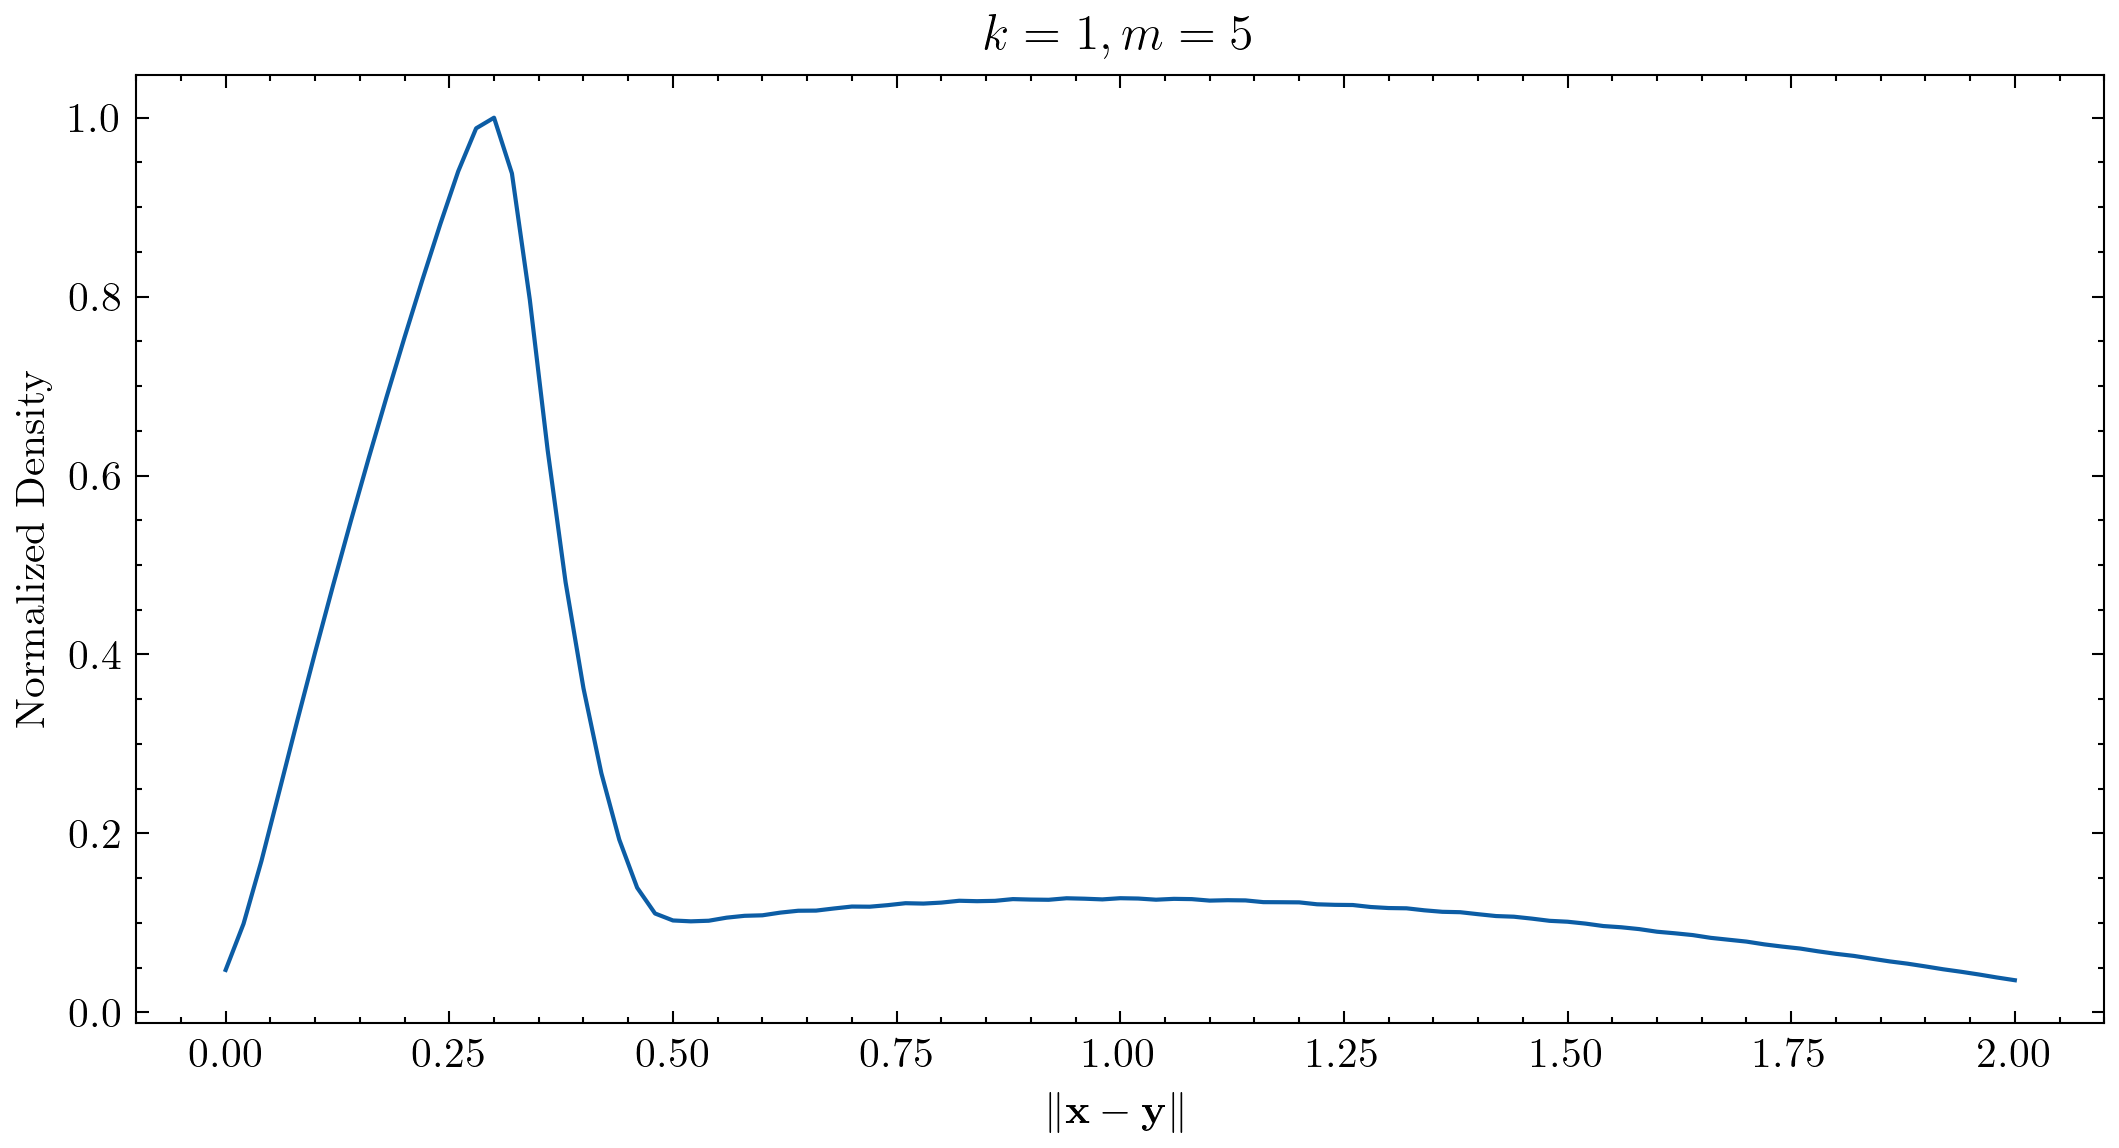

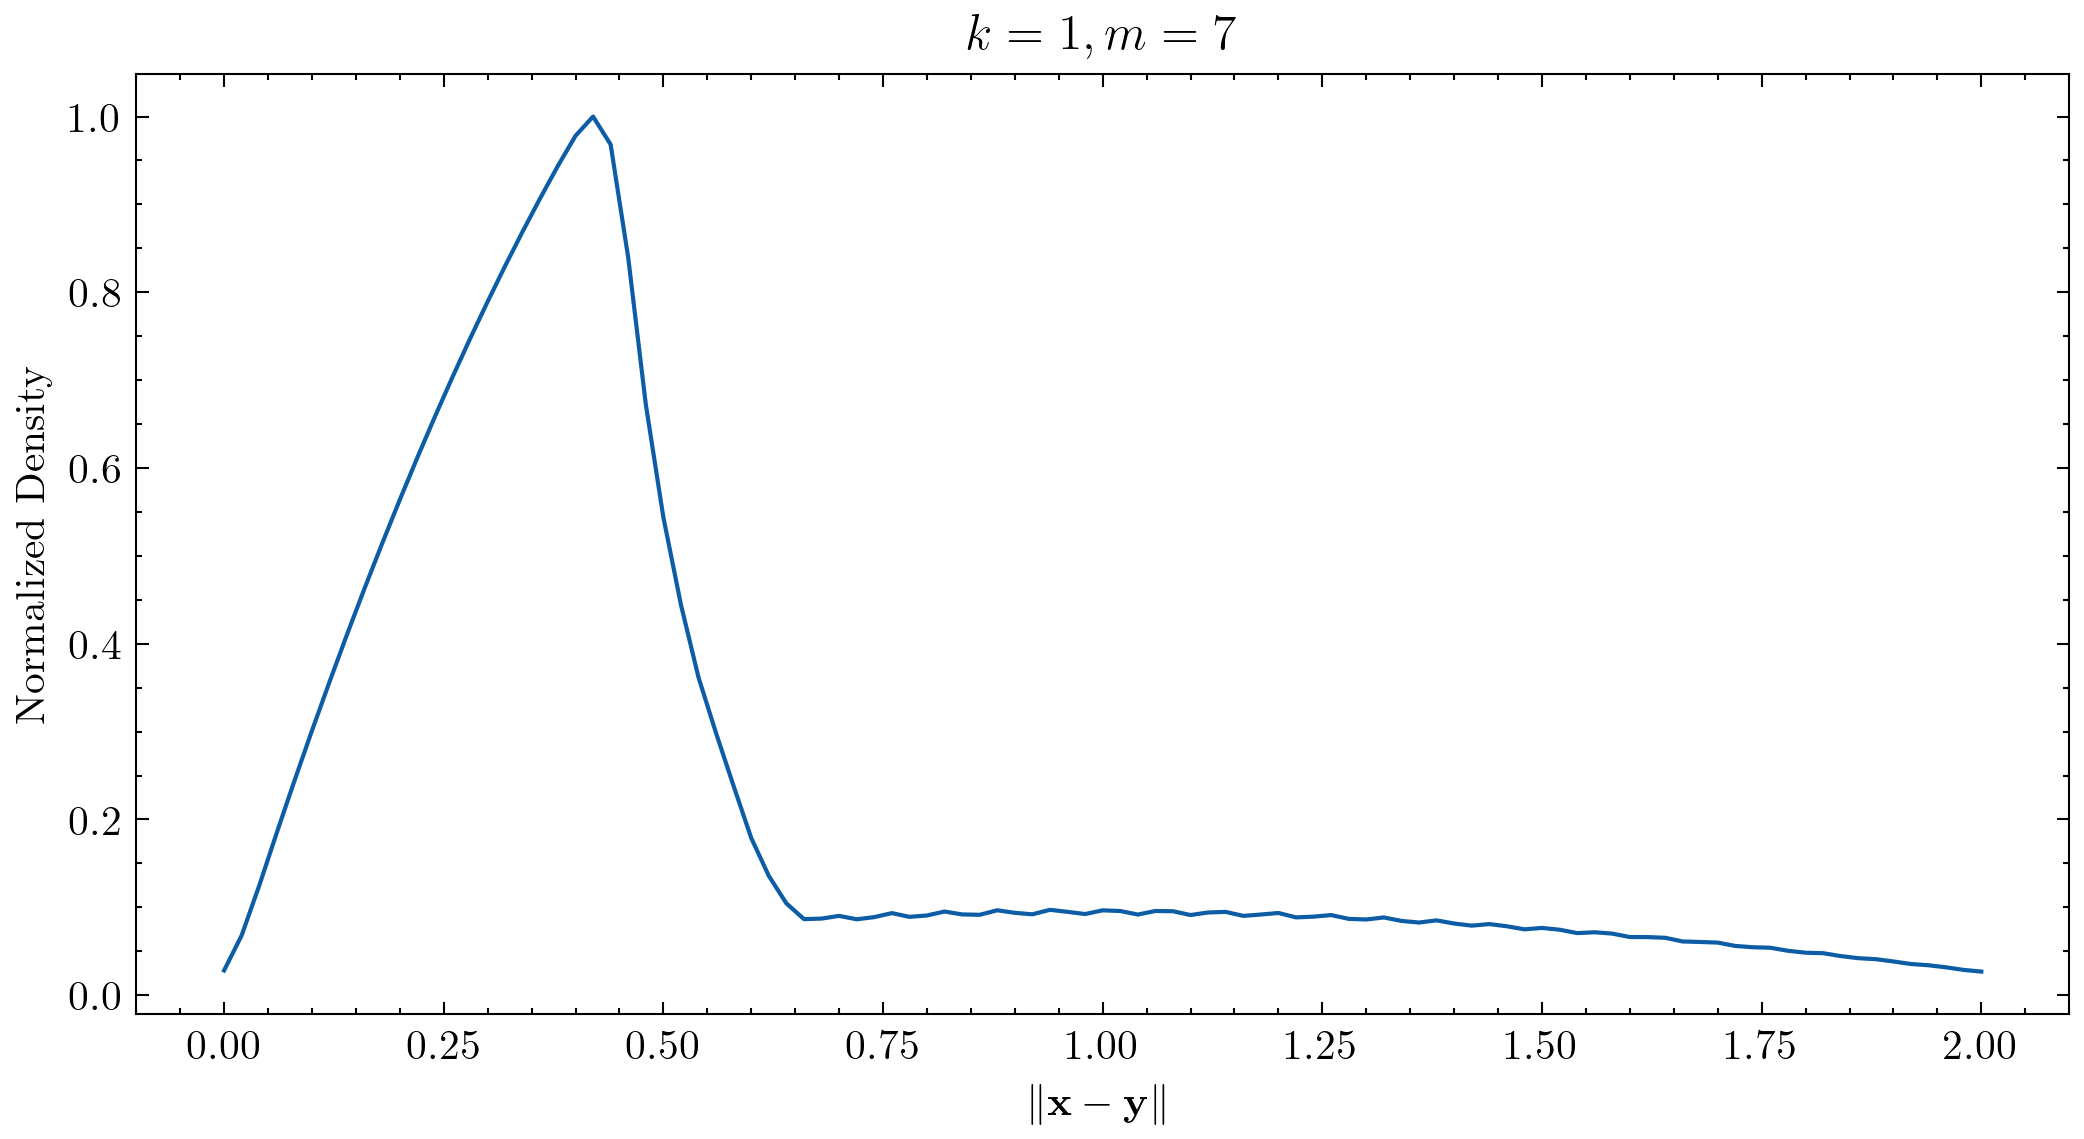

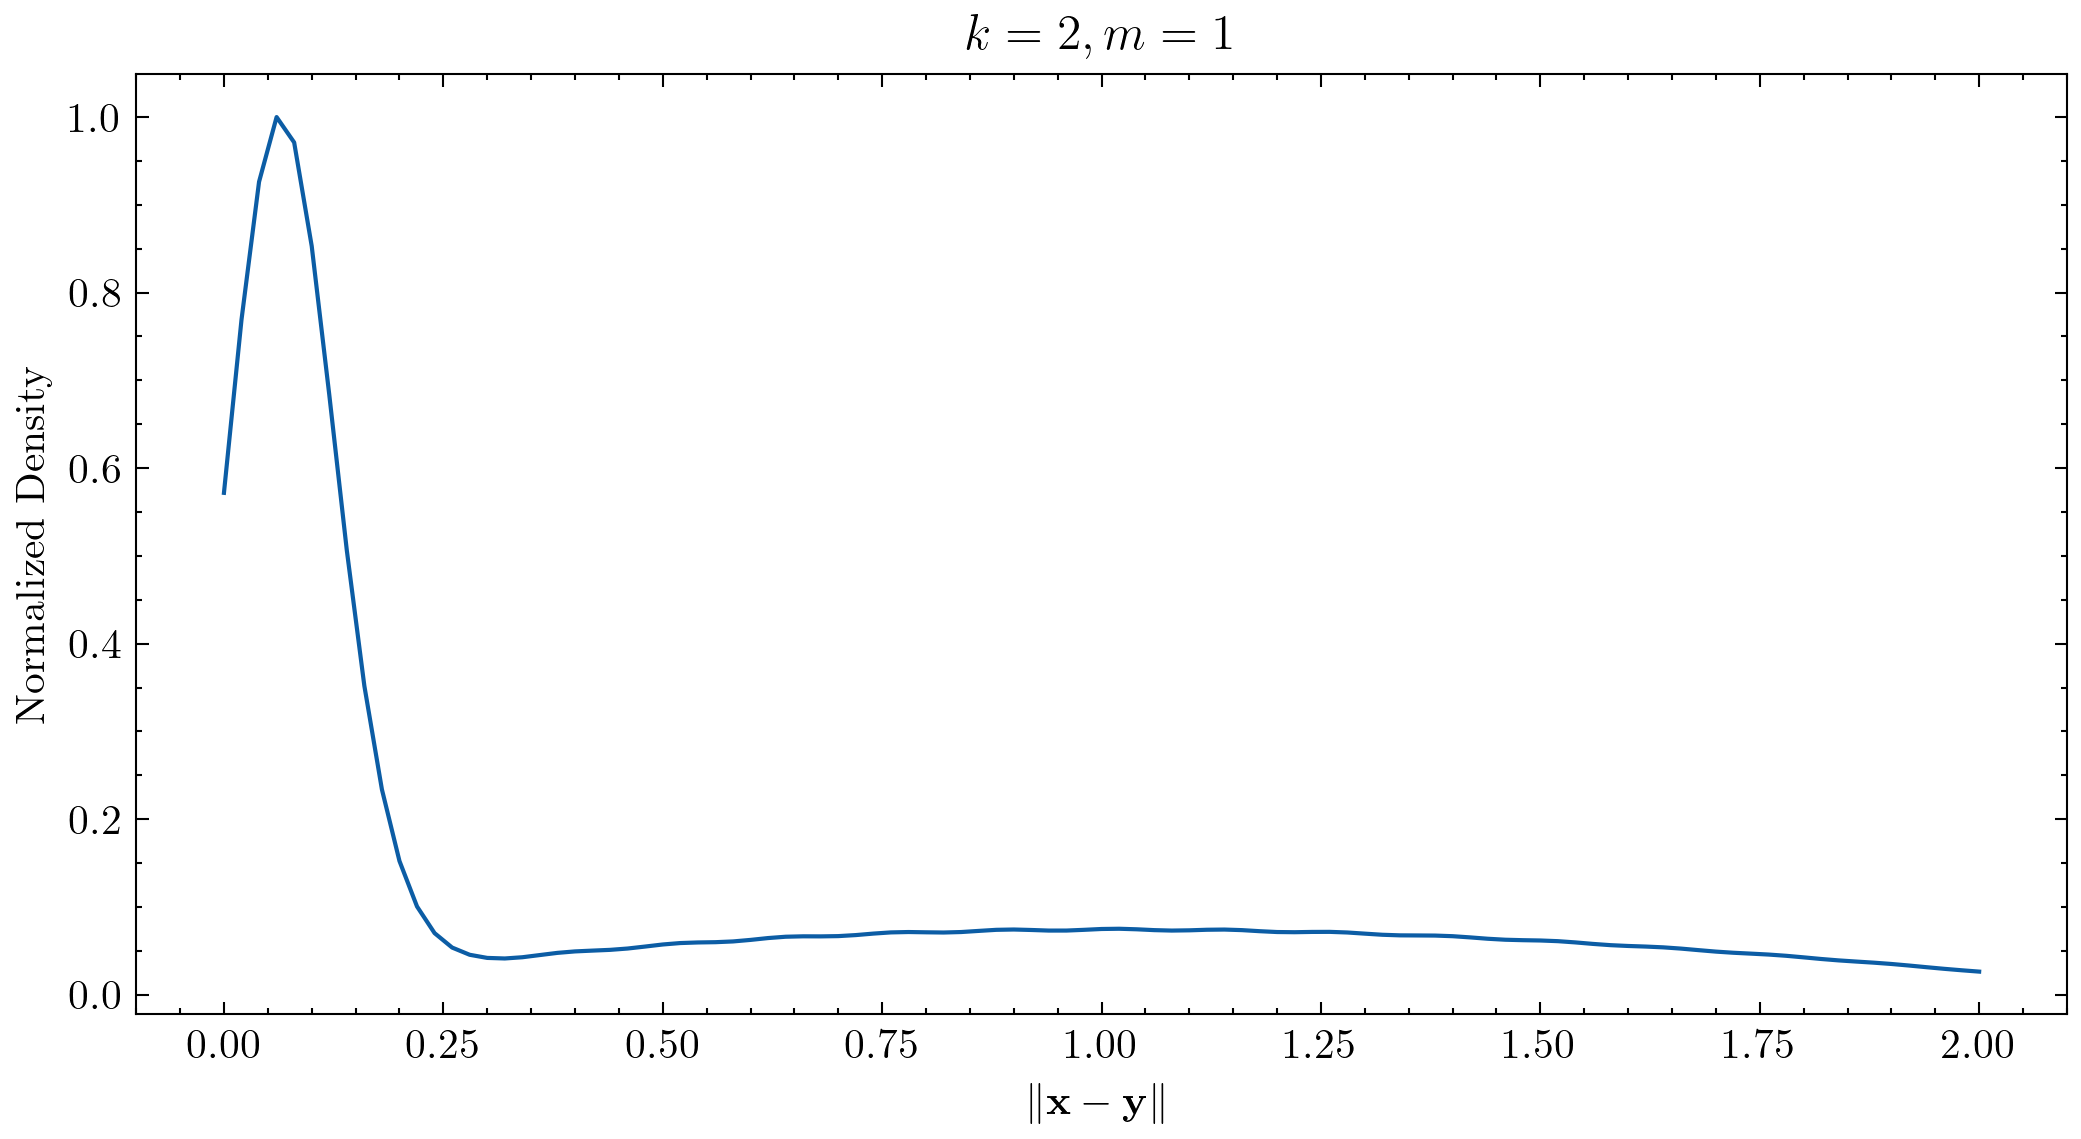

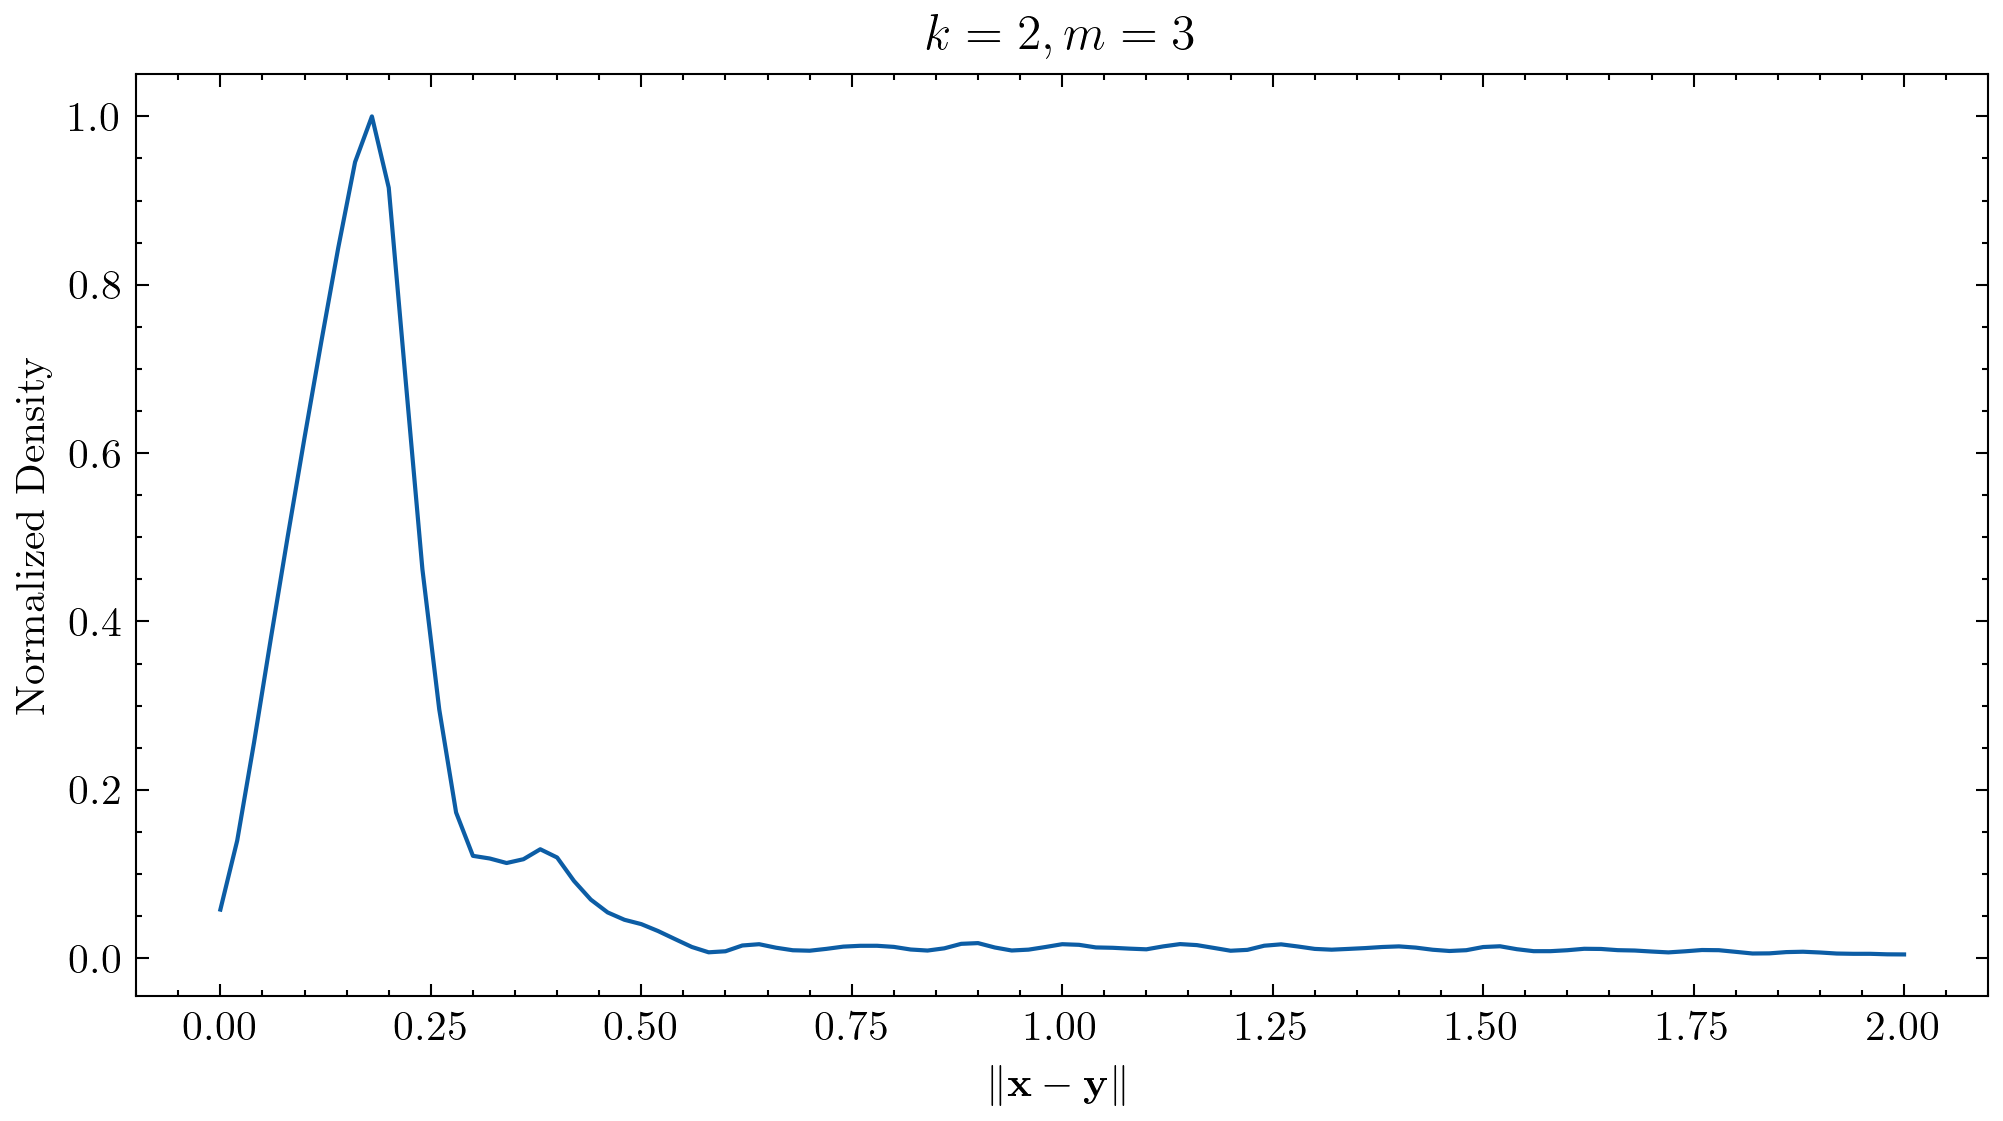

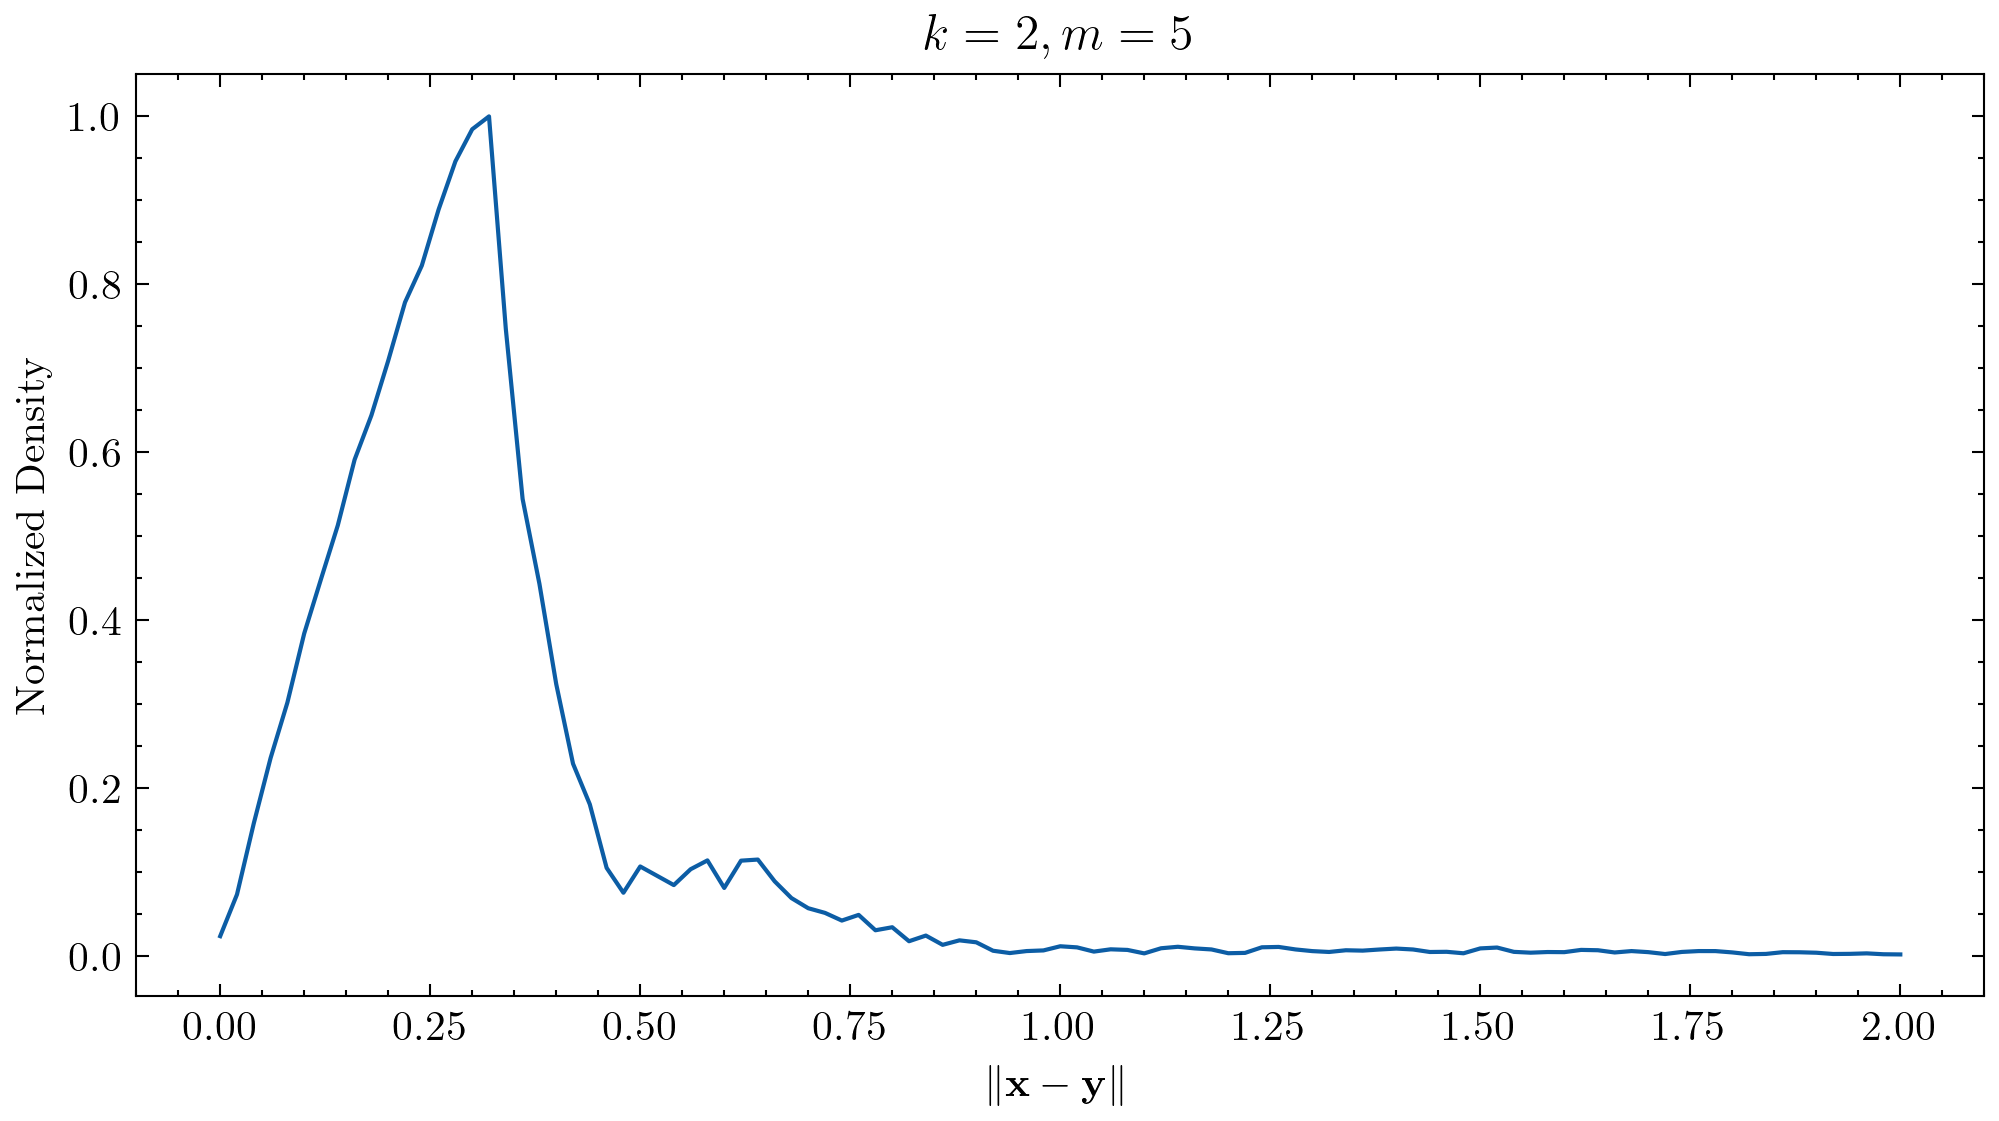

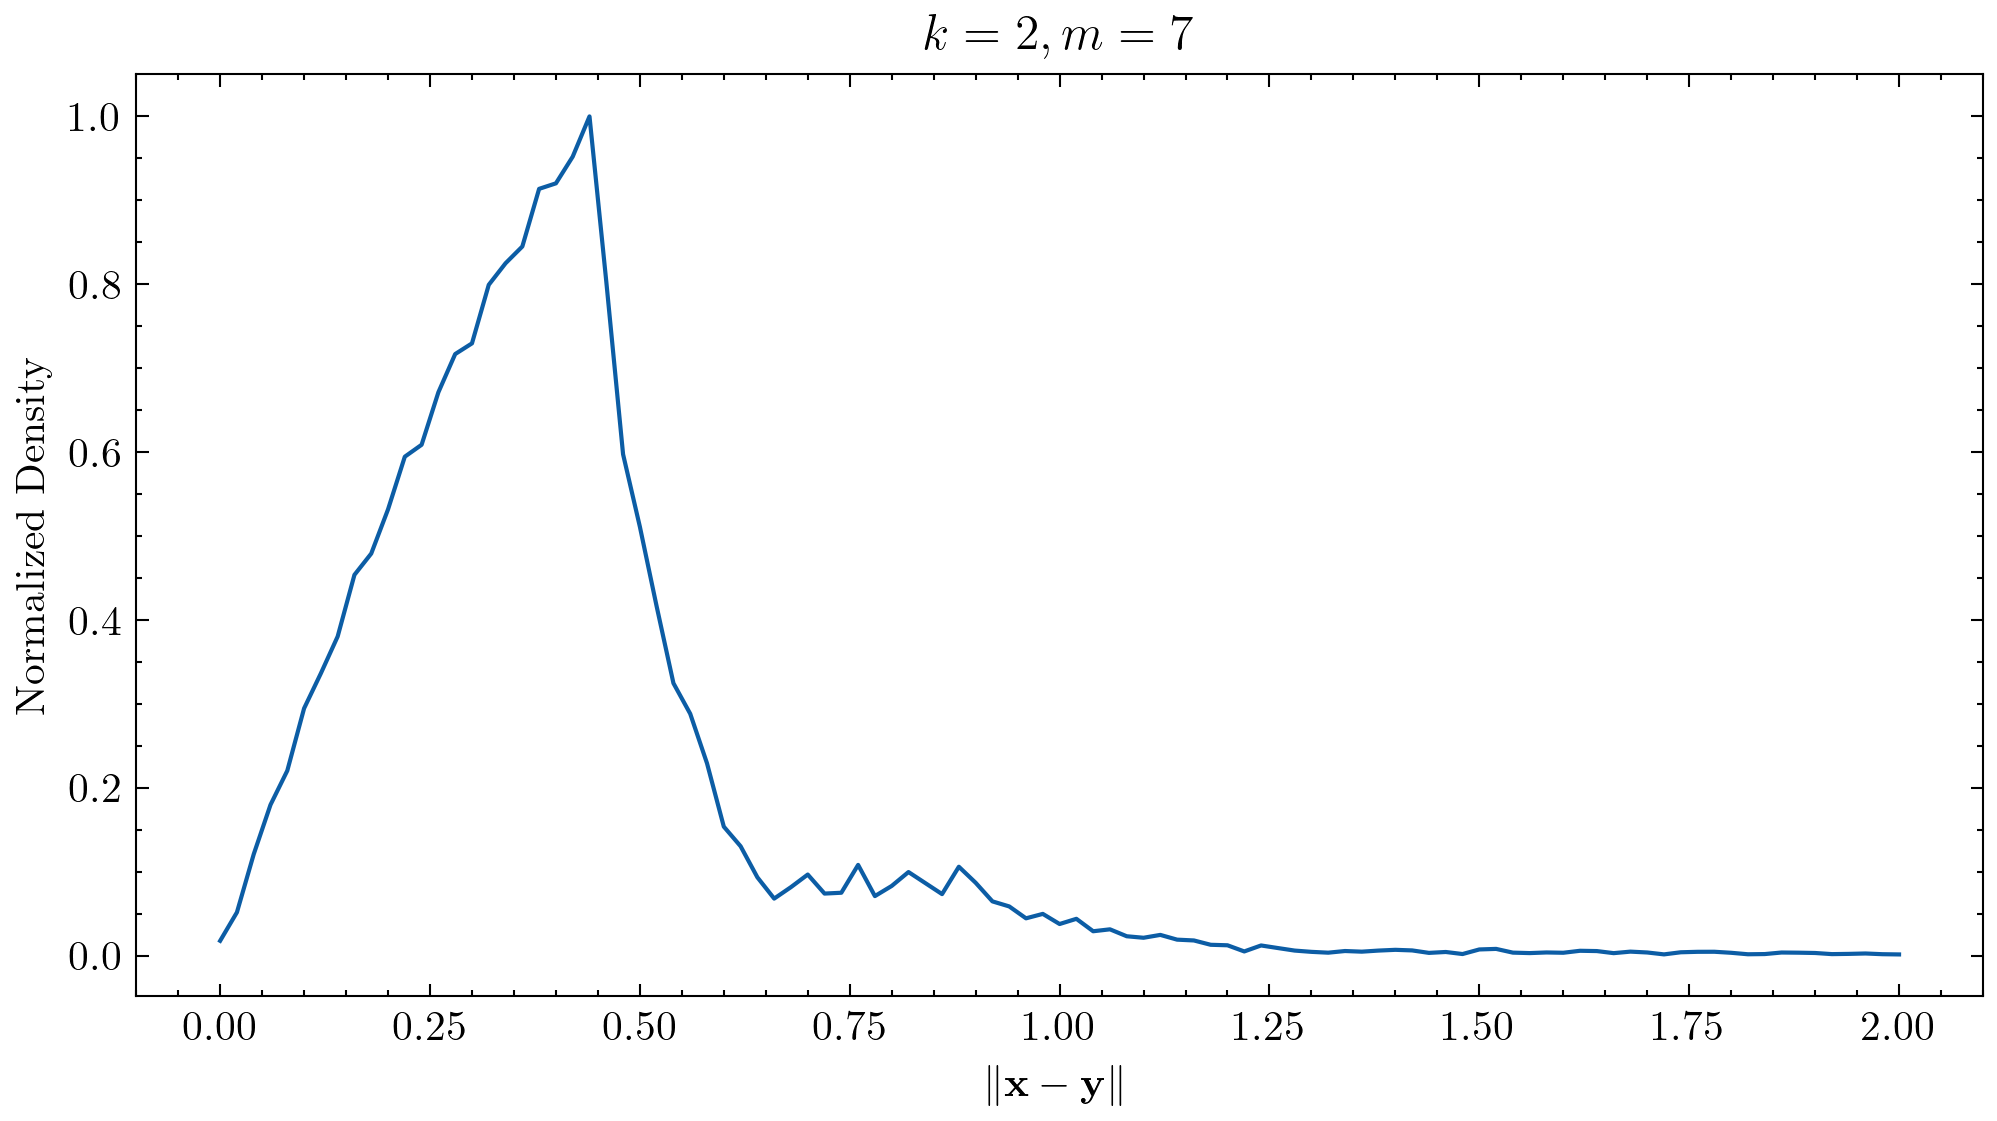

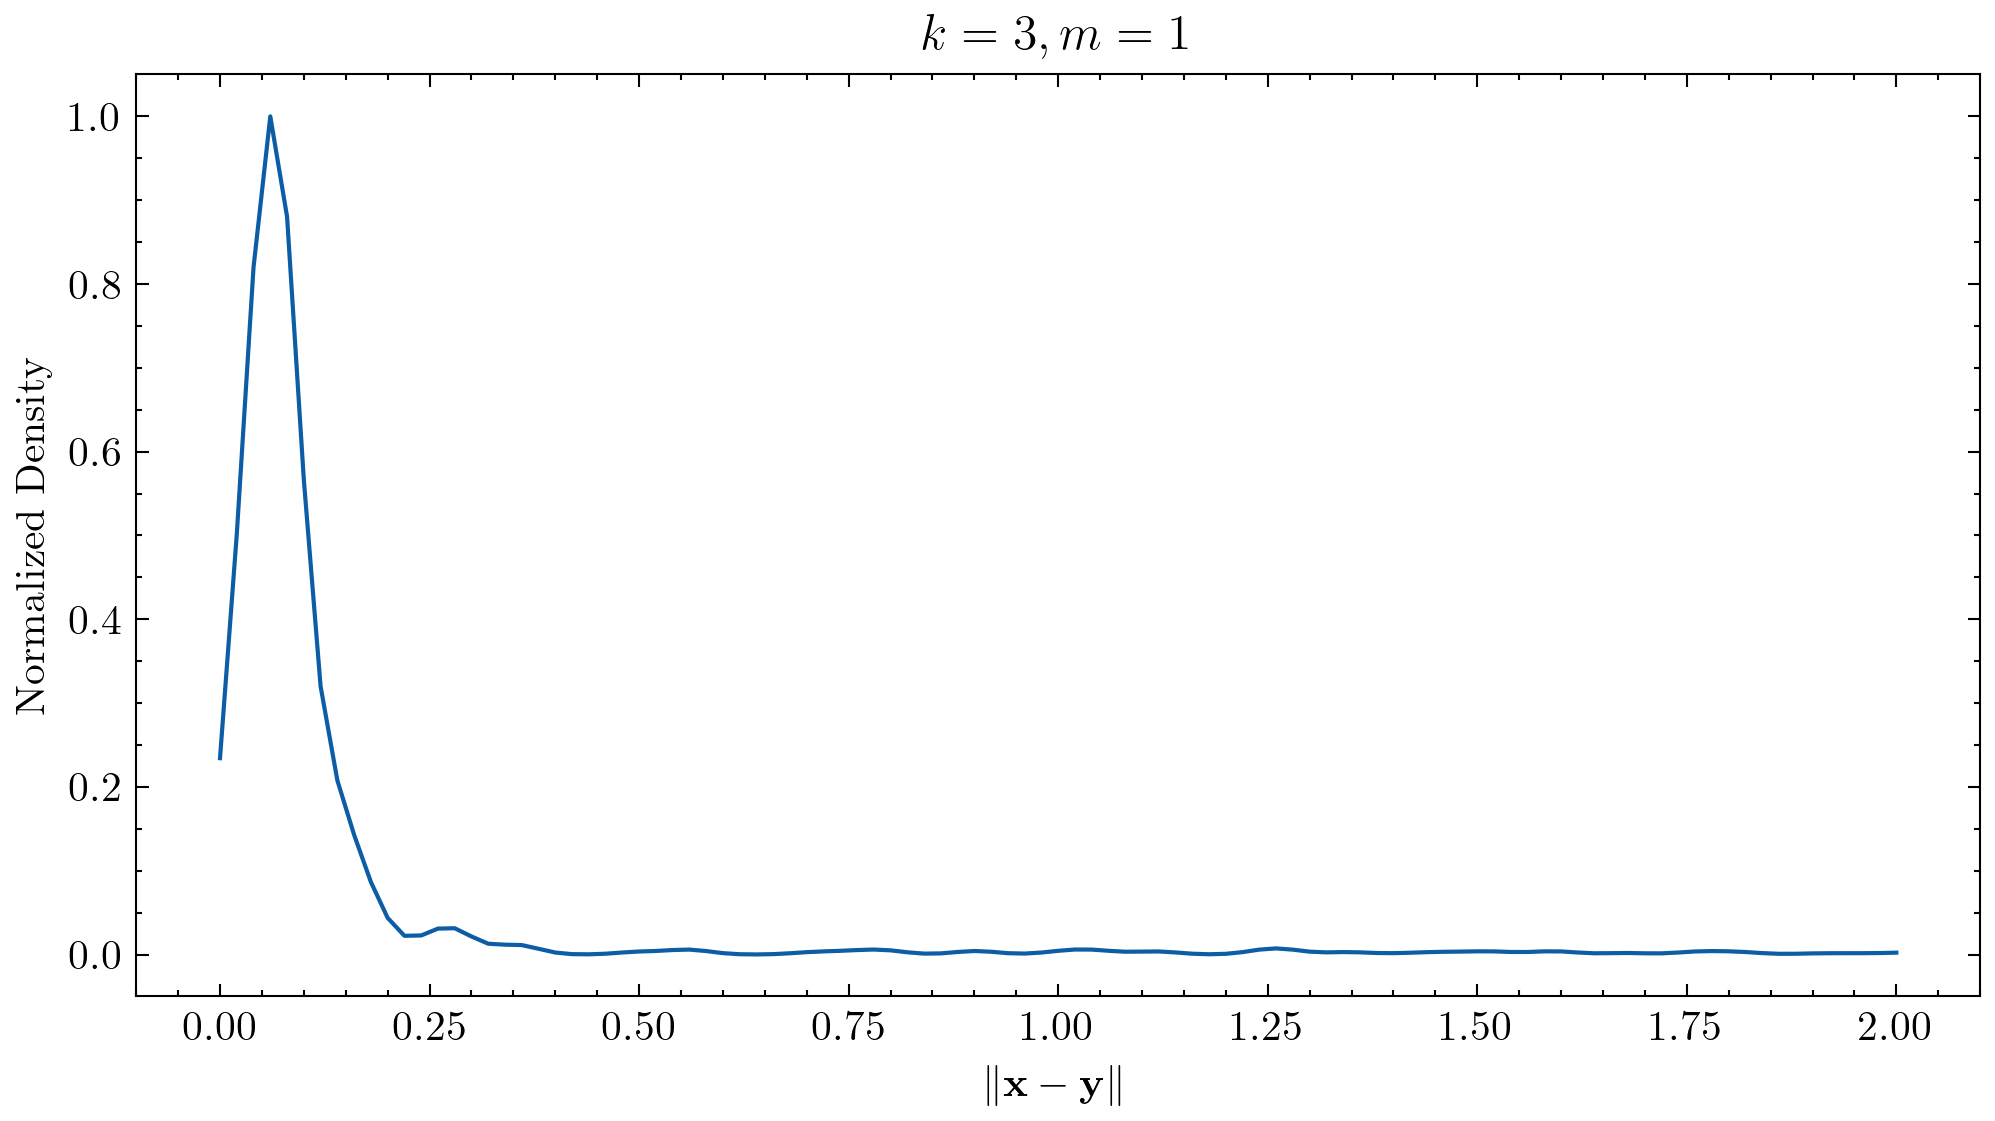

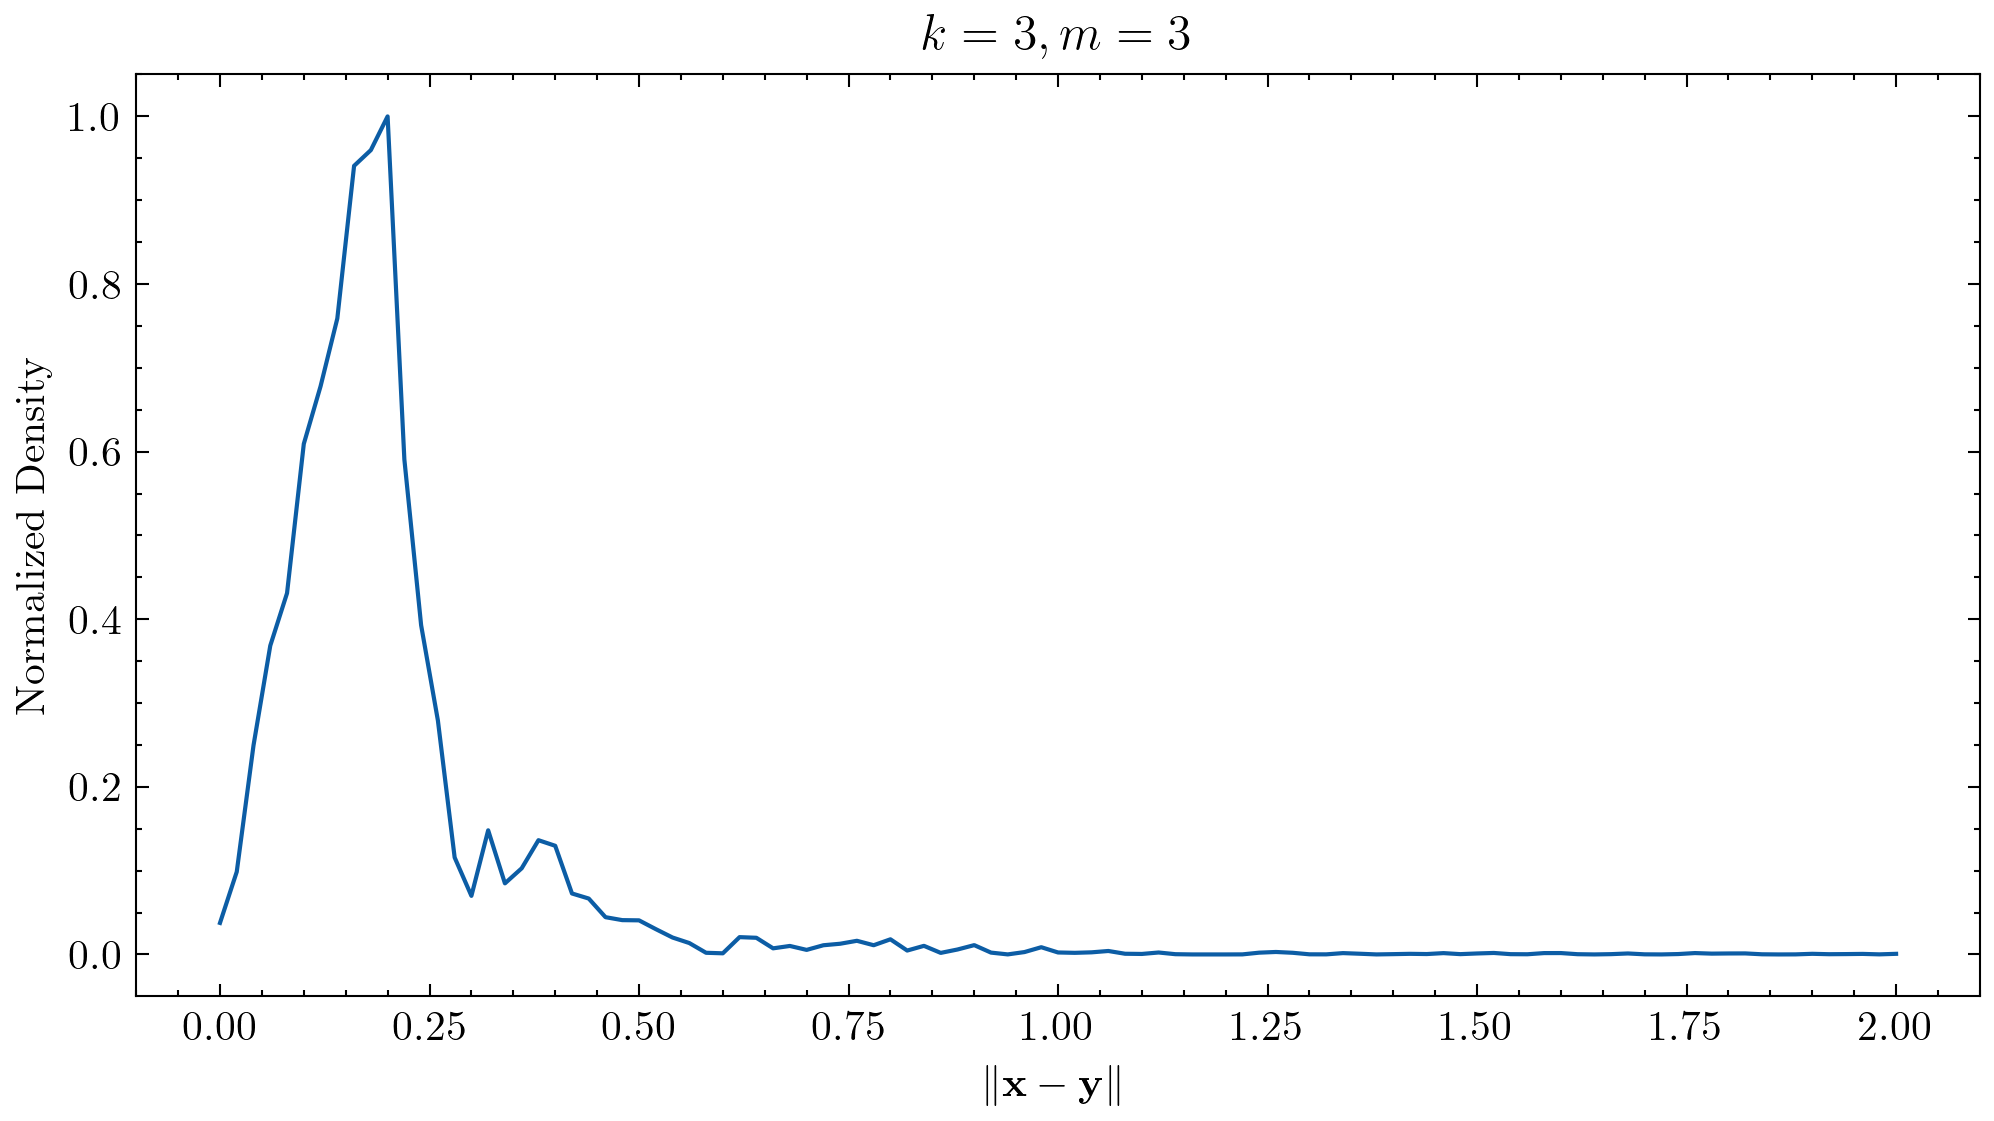

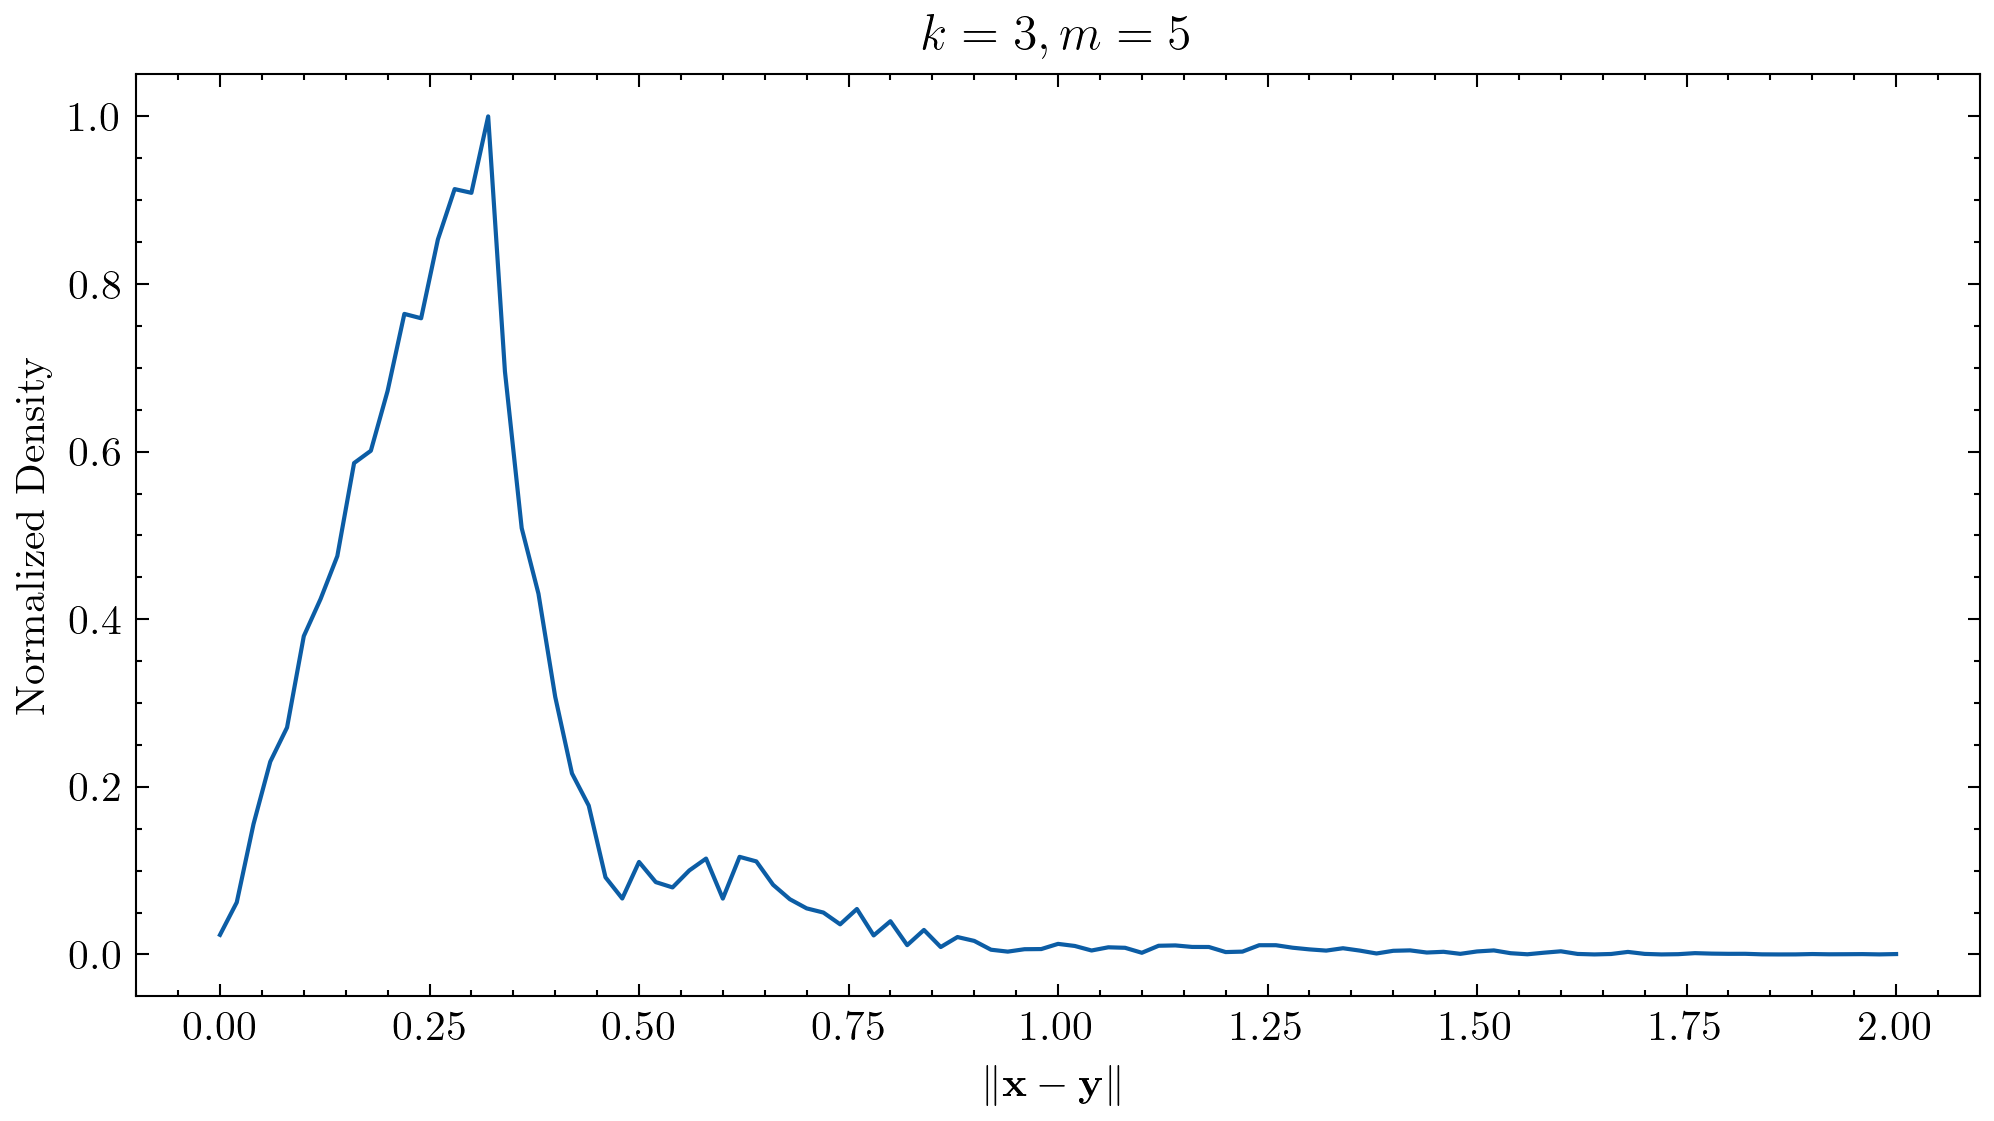

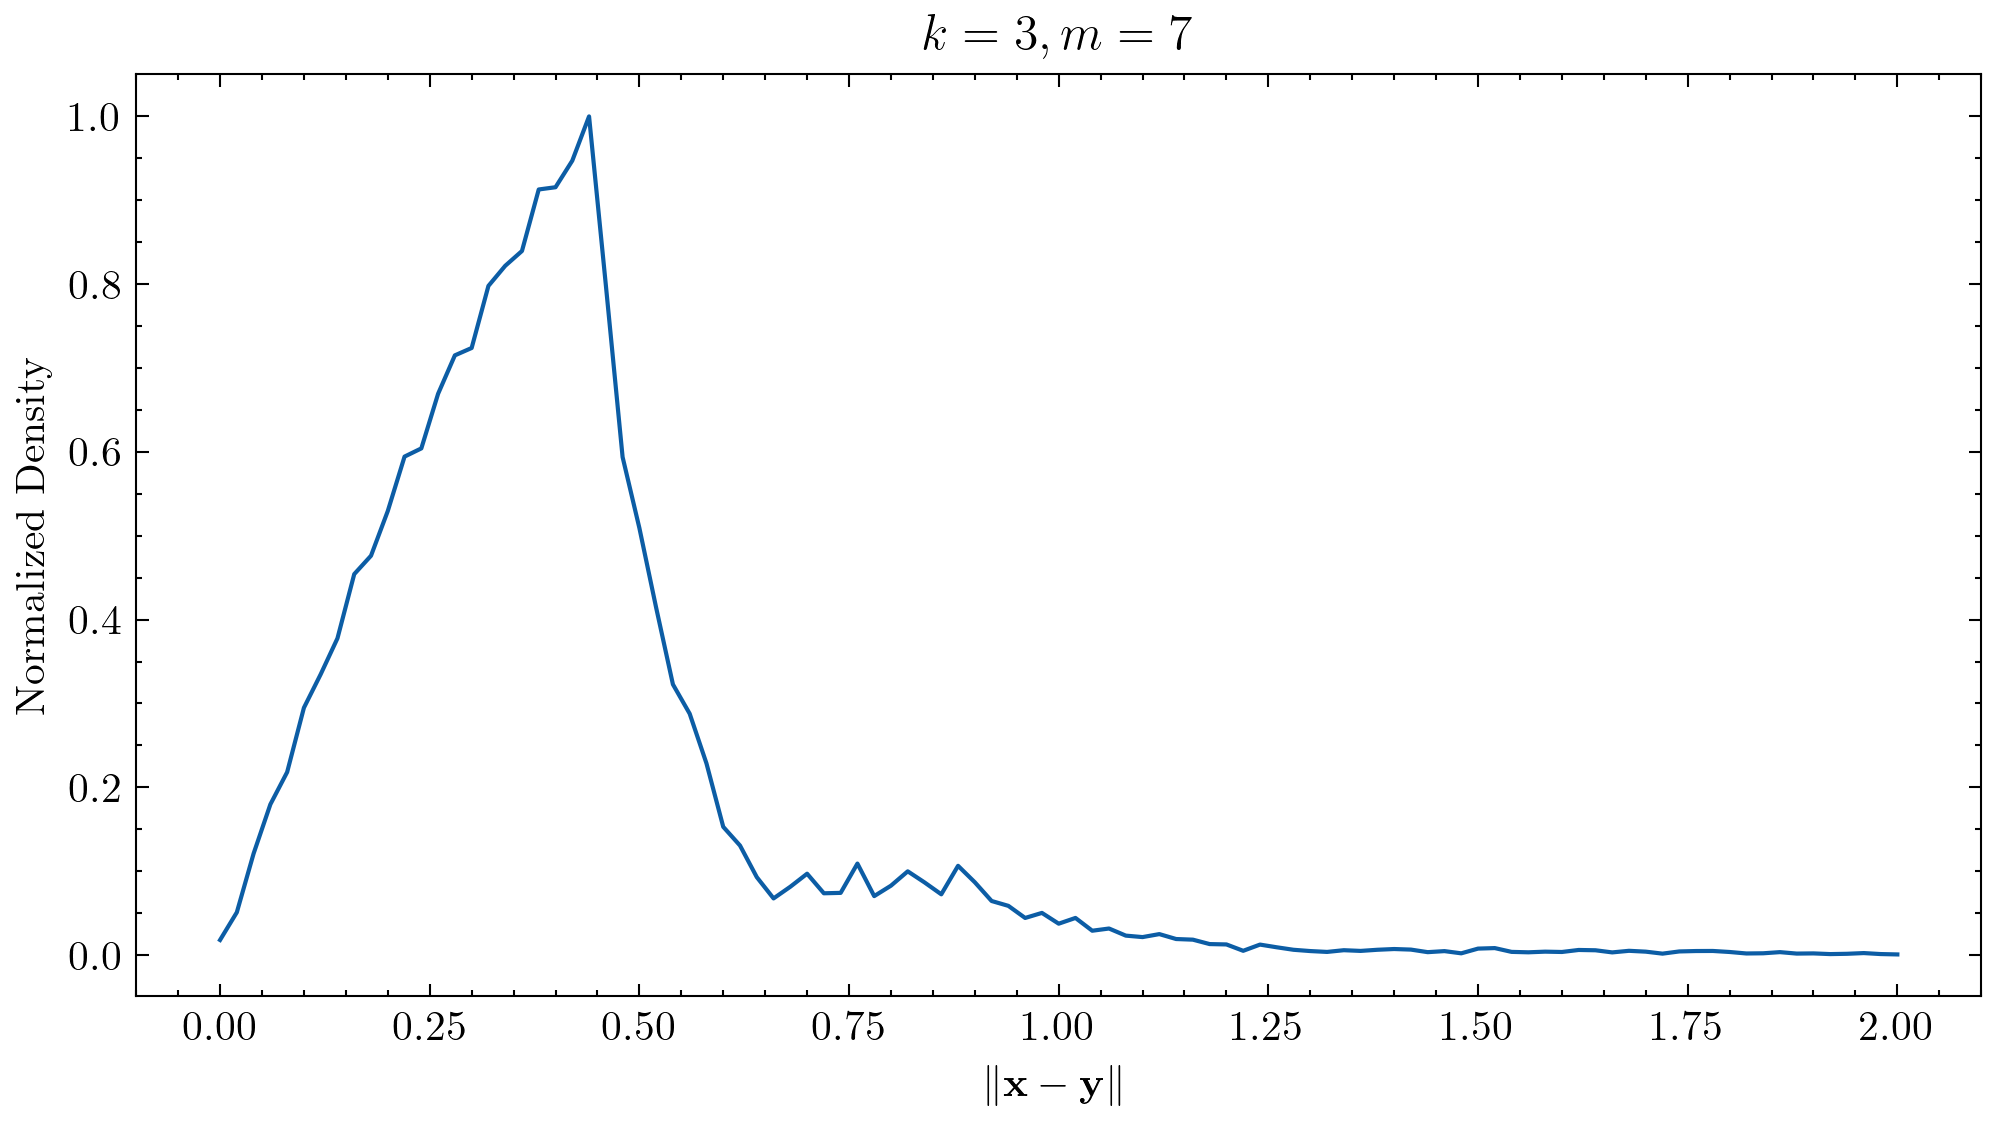

In [34]:
n = 6

density_dict = {}

for k in [1, 2, 3]:
    for m in [1, 3, 5, 7]:
        dd_gmg = DD_GMG2D(n,m,k,poisson_kernel,device)

        coarest_pts = dd_gmg.coarest_pts
        pts_locals = []
        for l in range(k):
            local_pts = dd_gmg.pts_local[l]

            x_2I_j_xeven_yodd, _, mask_2I_j_xeven_yodd = local_pts[0]
            x_2I_j_xodd_yfull, _, mask_2I_j_xodd_yfull = local_pts[1]
            x_i_xodd_yeven_j, _, mask_i_xodd_yeven_j = local_pts[2]
            x_i_xeven_yodd_j, _, mask_i_xeven_yodd_j = local_pts[3]
            x_i_xodd_yodd_j, _, mask_i_xodd_yodd_j = local_pts[4]

            pts_locals.append(x_2I_j_xeven_yodd[mask_2I_j_xeven_yodd])
            pts_locals.append(x_2I_j_xodd_yfull[mask_2I_j_xodd_yfull])
            pts_locals.append(x_i_xodd_yeven_j[mask_i_xodd_yeven_j])
            pts_locals.append(x_i_xeven_yodd_j[mask_i_xeven_yodd_j])
            pts_locals.append(x_i_xodd_yodd_j[mask_i_xodd_yodd_j])

        local_pts = torch.concat(pts_locals)

        full_pts = torch.vstack((coarest_pts, local_pts))
        
        pts_dist = np.linalg.norm(full_pts[:,:2] - full_pts[:,2:], axis=1)
        kernel = stats.gaussian_kde(pts_dist)
        x = np.linspace(0,2,101)
        d = kernel(x)
        d = d/d.max()

        density_dict[(k,m)] = d

        cm = 1/2.54
        # visualize kernel slice
        f = plt.figure(figsize=(20*cm,10*cm))
        ax = f.add_subplot(111)
        ax.plot(x, d)
        ax.set_aspect('equal')
        ax.set_title('$k={:}, m={:}$'.format(k,m))
        ax.set_xlabel('$\|\mathbf{x}-\mathbf{y}\|$')
        ax.set_ylabel('Normalized Density')

        plt.tight_layout()
        outnm = './gmg2d_dist_m{:}_k{:}.png'.format(m, k)
        plt.savefig(outnm)
        print("saved : ", outnm)

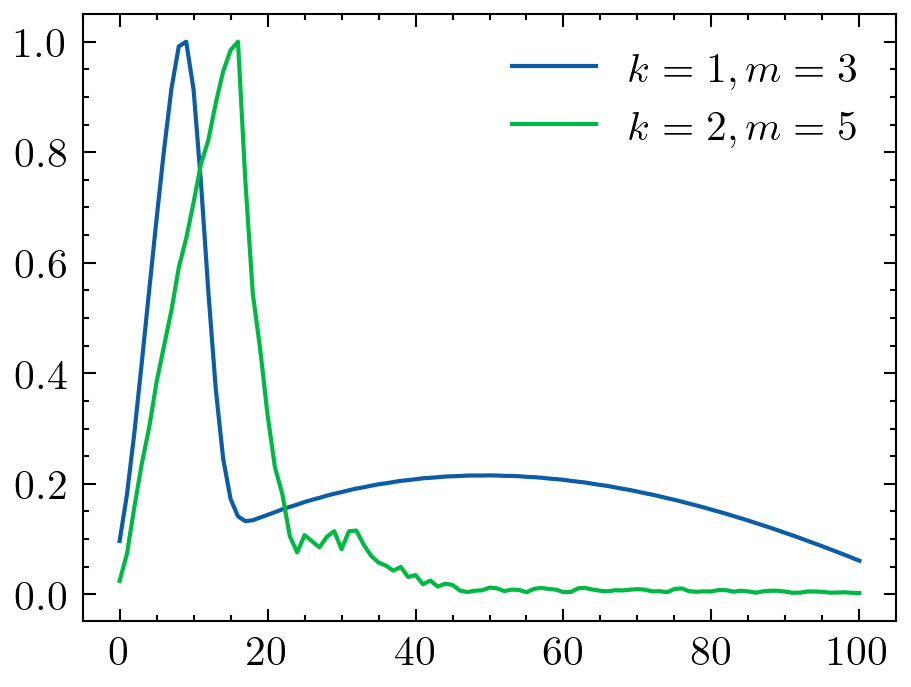

In [33]:
plt.plot(density_dict[(1,3)], label="$k=1,m=3$")
plt.plot(density_dict[(2,5)],label="$k=2,m=5$")
# plt.plot(density_dict[(3,5)],label="$k=3,m=5$")
plt.legend()